<a href="https://colab.research.google.com/github/kikiymini/7506R-1C2024-GRUPO02/blob/main/7506R_1C2024_GRUPO02_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>

#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Propiedades en venta</center>

### <center> Grupo 2</center>

## Integrantes:

*   Aramayo Carolina
*   Utrera Maximo Damian
*   Villalba Ana Daniela
*   Fiorilo Roy


# Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

from shapely import wkt
from shapely.geometry import MultiPolygon, Polygon, Point

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Lectura de archivo

### Desde google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/7506R-1C2024-GRUPO02/Dataset/properati_argentina_2021.csv'
barrios_file = '/content/drive/MyDrive/7506R-1C2024-GRUPO02/Dataset/barrios.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


### Desde maquina local

In [3]:
# Si se esta trabajando en local, descomentar esta celta y comentar la de arriba
# file_path = './dataset/properati_argentina_2021.csv'
# barrios_file = './dataset/barrios.csv'
# df = pd.read_csv(file_path)

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

# Análisis Exploratorio y Pre-procesamiento de Datos

En esta sección vamos a filtrar y seleccionar los datos a trabajar a lo largo del proyecto.




#### Filtrado

Se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

En la etapa de filtrado, vamos a utilizar la funcionalidad de `str.contains()` de pandas. Este código se basa en la documentación oficial de pandas que puedes encontrar en [este enlace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).


In [5]:
# filtro por tipo de propiedad
# str.contains() se utiliza para buscar patrones de texto dentro de las cadenas en una serie.
# USD: indica el patrón que busco
# case: no distingue entre mayúsculas y minúsculas
# na: no registro valores NaN
filtro = df.property_type.str.contains('Casa|PH|Departamento',case=False,na=False)
ds_propiedades_filtradas = df[filtro]
ds_propiedades_filtradas = ds_propiedades_filtradas[~ds_propiedades_filtradas['property_type'].str.contains('Casa de campo')]

In [6]:
# filtro propiedades en Capital Federal
filtro = ds_propiedades_filtradas.place_l2.str.contains('Capital Federal',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [7]:
# filtro propiedades en venta
filtro = ds_propiedades_filtradas.operation.str.contains('Venta',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [8]:
# filtro por moneda DÓLAR
filtro = ds_propiedades_filtradas.property_currency.str.contains('USD',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [9]:
# DataSet filtrado
ds_propiedades_filtradas.head()

id  start_date    end_date  created_on    latitud  \
25  CyZu6IaZgmQYGk8jmPajCg==  2021-09-09  2021-09-26  2021-09-09        NaN   
42  d3Z0MblSb2IMBoOBMGJEEQ==  2021-09-09  2021-09-26  2021-09-09 -34.637319   
43  rL7qPkQnomsMGu2ViS3sBw==  2021-09-09  2021-09-28  2021-09-09 -34.628647   
49  vuX/ccLAMVml4qWRFcOJUA==  2021-09-09  2022-01-05  2021-09-09 -34.610027   
51  ZTtSCeqZ3HUgf5jjwEzRcw==  2021-09-09  2022-03-09  2021-09-09 -34.631621   

     longitud         place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
25        NaN  Capital Federal      NaN      NaN      NaN       NaN     Venta   
42 -58.361124  Capital Federal     Boca      NaN      NaN       NaN     Venta   
43 -58.361871  Capital Federal     Boca      NaN      NaN       NaN     Venta   
49 -58.401934  Capital Federal     Once      NaN      NaN       NaN     Venta   
51 -58.416825  Capital Federal    Boedo      NaN      NaN       NaN     Venta   

   property_type  property_rooms  property_bedrooms  property_surface_total  \
25          Casa             4.0                3.0                   171.0   
42  Departamento             3.0                2.0                    58.0   
43  Departamento             4.0                3.0                    70.0   
49  Departamento             4.0                2.0                     NaN   
51            PH             4.0                2.0                     NaN   

    property_surface_covered  property_price property_currency  \
25                     133.0        210000.0               USD   
42                      55.0         82900.0               USD   
43                      70.0         99000.0               USD   
49                     104.0        146000.0               USD   
51                      73.0        250000.0               USD   

                                 property_title  
25  VENTA CASA LLAVE EN MANO - COSTA ESMERALDA   
42       VENTA TRES AMBIENTES LA BOCA PISO ALTO  
43   Departamento - 4 Ambientes - Catalinas Sur  
49          Venta departamento 4 ambientes Once  
51                                   PH - Boedo

#### Sets de entrenamiento y test

Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

En esta sección se utiliza el método `train_test_split()` de Scikit-learn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Este método es útil para evaluar el rendimiento de un modelo de aprendizaje automático.

El método `train_test_split()` se puede encontrar en la documentación oficial de Scikit-learn:

- [train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Documentación de train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


In [10]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
prop_train, prop_test = train_test_split(ds_propiedades_filtradas, train_size=0.8)
print("Propiedades para entrenar:", len(prop_train))
print("Propiedades para testear:", len(prop_test))

Propiedades para entrenar: 75399
Propiedades para testear: 18850


## Exploración Inicial

### Medidas de resumen de las variables cuantitativas del Dataset

In [11]:
# Creo resumen con describe
prop_train_resumen = prop_train.describe()
# Agrego moda a la tabla resumen
prop_train_resumen.loc['mode'] = prop_train.mode().iloc[0]
prop_train_resumen


latitud      longitud  place_l6  property_rooms  \
count  72437.000000  72437.000000       0.0    74556.000000   
mean     -34.591482    -58.449115       NaN        2.818727   
std        0.182308      0.281544       NaN        1.427303   
min      -53.788624    -71.471192       NaN        1.000000   
25%      -34.615879    -58.466403       NaN        2.000000   
50%      -34.595787    -58.438908       NaN        3.000000   
75%      -34.577448    -58.408862       NaN        4.000000   
max      -24.219827    -54.133330       NaN       40.000000   
mode     -34.541250    -58.472966       NaN        3.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count       66580.000000            71537.000000              72697.000000   
mean            2.010814              107.641710                 84.238648   
std             1.105133              813.499181                525.646683   
min            -1.000000               10.000000                  1.000000   
25%             1.000000               45.000000                 40.000000   
50%             2.000000               65.000000                 57.000000   
75%             3.000000              104.000000                 88.000000   
max            32.000000           100068.000000             100051.000000   
mode            1.000000               50.000000                 40.000000   

       property_price  
count    7.539900e+04  
mean     2.264222e+05  
std      3.230697e+05  
min      5.000000e+03  
25%      9.500000e+04  
50%      1.435000e+05  
75%      2.370000e+05  
max      2.140000e+07  
mode     1.100000e+05

En esta tabla resumen se pueden apreciar (en orden):

* El recuento de las entradas validas por atributo.
* El mean de cada atributo.
* La desviacion estandar.
* El valor minimo de cada atributo.
* El percentil 25.
* El percentil 50.
* El percentil 75.
* El valor maximo de cada atributo.
* La moda de cada atributo.

### Cantidad de valores posibles para cada variable cualitativo

In [12]:
# Mostrar la cantidad de valores posibles para cada variable cualitativa
variables_cualitativas = [
    'property_type',
    'operation',
    'property_currency',
    'start_date',
    'end_date',
    'created_on',
    'place_l2',
    'place_l3',
    'place_l4',
    'place_l5',
    'place_l6',
    ]
prop_train[variables_cualitativas].nunique()

property_type          3
operation              1
property_currency      1
start_date           365
end_date             606
created_on           365
place_l2               1
place_l3              57
place_l4               4
place_l5               0
place_l6               0
dtype: int64

### Frecuencia de los valores posibles de variables cualitativas

En un grafico de barras se veran las frecuencias de los valores posibles para los atributos cualitativos mas importantes y donde hay mas de 1 alternativa, es decir no se tomara por ejemplo *place_l2* porque se sabe que por el filtro el 100% de los valores sera 'Capital Federal', asi mismo para *operation* que sera 'Venta' y *property_currency* que sera 'USD'.

* place_l3 (los 15 mas frecuentes)
* place_l4
* property_type

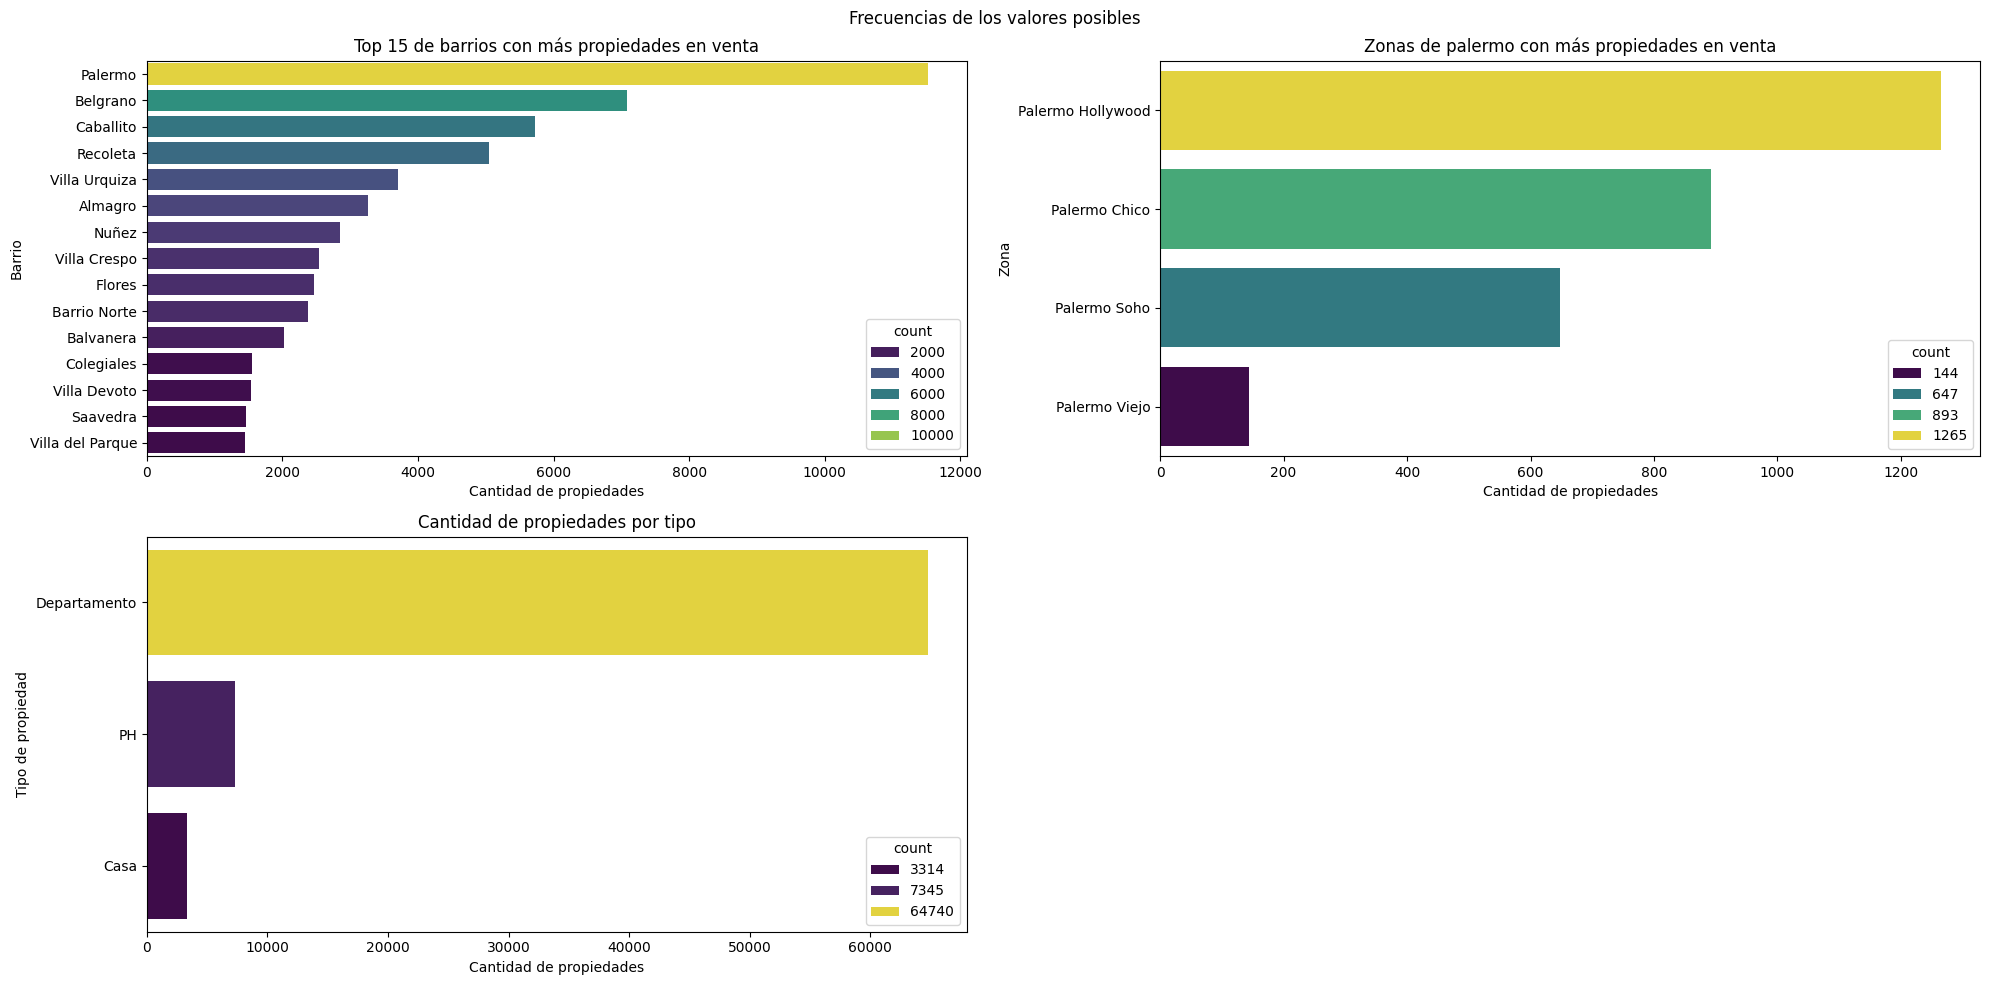

In [13]:
plt.figure(figsize=(20, 10)) # 10x10 inches
plt.suptitle('Frecuencias de los valores posibles')

# bar plot por place_l3
plt.subplot(2, 2, 1) # 2 filas, 2 columnas, 1 posicion
frecuencias_place_3 = prop_train["place_l3"].value_counts().head(15)
sns.barplot(x=frecuencias_place_3.values, y=frecuencias_place_3.index, hue=frecuencias_place_3, palette='viridis')
plt.title('Top 15 de barrios con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Barrio')

# bar plot por place_l4
plt.subplot(2, 2, 2) # 2 filas, 2 columnas, 2 posicion
frecuencias_place_4 = prop_train["place_l4"].value_counts()
sns.barplot(x=frecuencias_place_4.values, y=frecuencias_place_4.index, hue=frecuencias_place_4, palette='viridis')
# Ya que los 4 valores posibles pertenecen a Palermo
plt.title('Zonas de palermo con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Zona')

# bar plot por property_type
plt.subplot(2, 2, 3) # 2 filas, 2 columnas, 3 posicion
frecuencias_property_type = prop_train["property_type"].value_counts()
sns.barplot(x=frecuencias_property_type.values, y=frecuencias_property_type.index, hue=frecuencias_property_type, palette='viridis')
plt.title('Cantidad de propiedades por tipo')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Tipo de propiedad')

plt.tight_layout()
plt.show()

*Anotacion: todos los place_l4 que no son NaN son zonas de palermo.*

### Variables irrelevantes para el analisis

Las variables que se pueden considerar irrelevantes para el analisis que se les dara son:

* **ID**: no aporta informacion para analizar, sin embargo puede ser util para propositos de manejo de datos.
* **Place_l2**: siempre son capital federal debido al primer filtro
* **Place_l5/l6**: no tienen ningun valor en ningun registro lo que los hace innecesarios.
* **Operation**: debido a el pre-procesamiento de los datos todos los registros tendran una operacion de venta, es decir que este atributo pasa a ser redundante.
* **Property_currency**: similarmente como pasa con *operation* pasa con este otro atributo, es un atributo redundante ya que todos seran USD.
* **Property_title**: no aporta informacion relevante al analisis.
* **Latitud/Longitud**: como ya se tiene el barrio de la propiedad en place_l2 esta informacion puede o no ser relevante dependiendo si se quiere ver la ubicacion exacta o si se quiere validar el barrio.
* **Variables de fechas (start/end/created)**: estas variables podrian ser utiles si se hace un analisis por ejemplo para ver cuales son las fechas donde mas ventas empiezan/terminan/se crean, de lo contrario no es relevante.

#### En sintesis

En base a lo anterior dicho se toma la decision de dejar de contar con los atributos:

* place_l2
* place_l5/l6 (se abordara en la seccion de datos faltantes)
* operation
* property_currency
* property title

In [14]:
# Nuevo filtro para eliminar dichas columnas
columnas_a_eliminar = ['place_l2', 'operation', 'property_currency', 'property_title']
prop_train.drop(columns = columnas_a_eliminar,inplace=True)
prop_test.drop(columns = columnas_a_eliminar,inplace=True)

### Analisis grafico de distribucion de variables mas relevantes

* distribucion de precios
* distribucion de publicaciones por mes
* distribucion de habitaciones y dormitorios

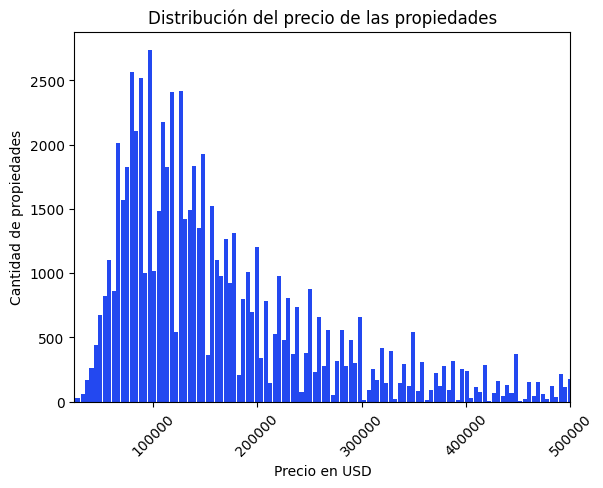

In [15]:
# plot de distribucion de property_price

plt.hist(data=prop_train,x="property_price",bins=5000, color="#2348F0",rwidth=0.9)
plt.xlim(25000,500000)
plt.xlabel("Precio en USD")
plt.ylabel("Cantidad de propiedades")
plt.title("Distribución del precio de las propiedades")
plt.xticks(rotation=45)

plt.show()

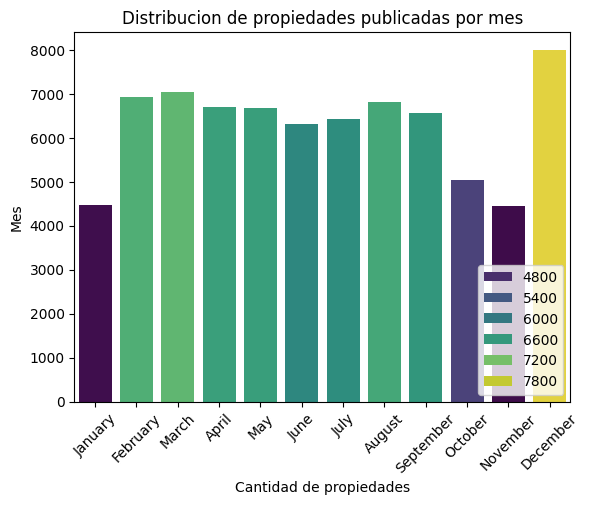

In [16]:
# bar plot distribucion de ventas por mes

prop_train["created_on"] = pd.to_datetime(prop_train["created_on"])
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
frecuencias_mes = prop_train["created_on"].dt.month_name().value_counts().reindex(meses)
sns.barplot(x=frecuencias_mes.index, y=frecuencias_mes.values, hue=frecuencias_mes, palette='viridis')
plt.legend(loc='lower right')
plt.title('Distribucion de propiedades publicadas por mes')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Mes')
plt.xticks(rotation=45)

plt.show()

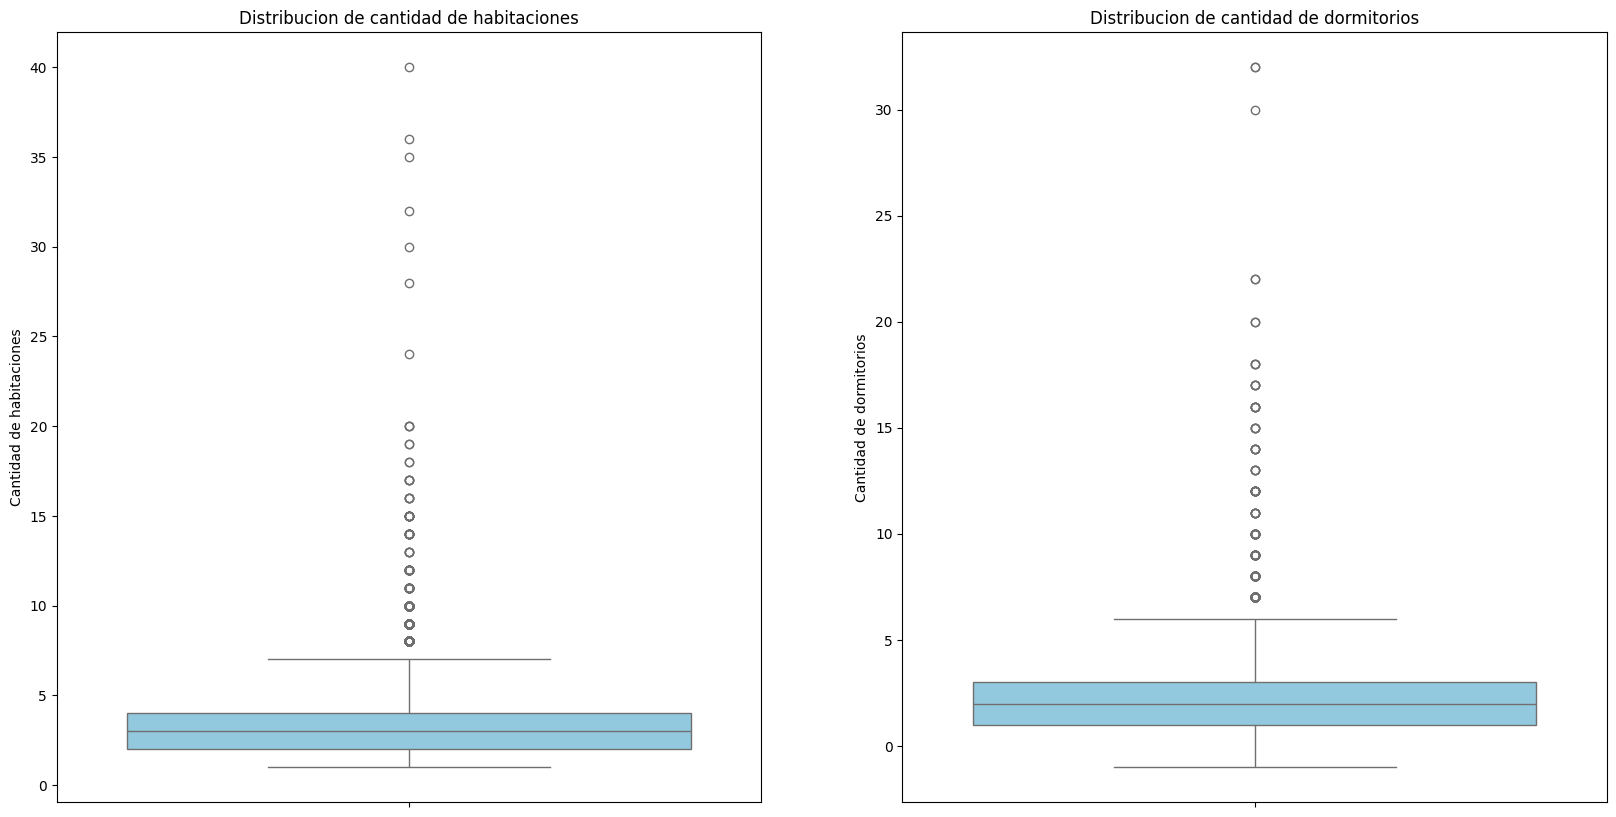

In [17]:
# Boxplot de property_rooms y property_bedrooms
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, 1 posicion
sns.boxplot(data=prop_train, y='property_rooms', color='skyblue')
plt.title('Distribucion de cantidad de habitaciones')
plt.ylabel('Cantidad de habitaciones')

plt.subplot(1, 2, 2) # 1 fila, 2 columnas, 2 posicion
sns.boxplot(data=prop_train, y='property_bedrooms', color='skyblue')
plt.title('Distribucion de cantidad de dormitorios')
plt.ylabel('Cantidad de dormitorios')

plt.show()

### Analisis de correlaciones existentes entre variables

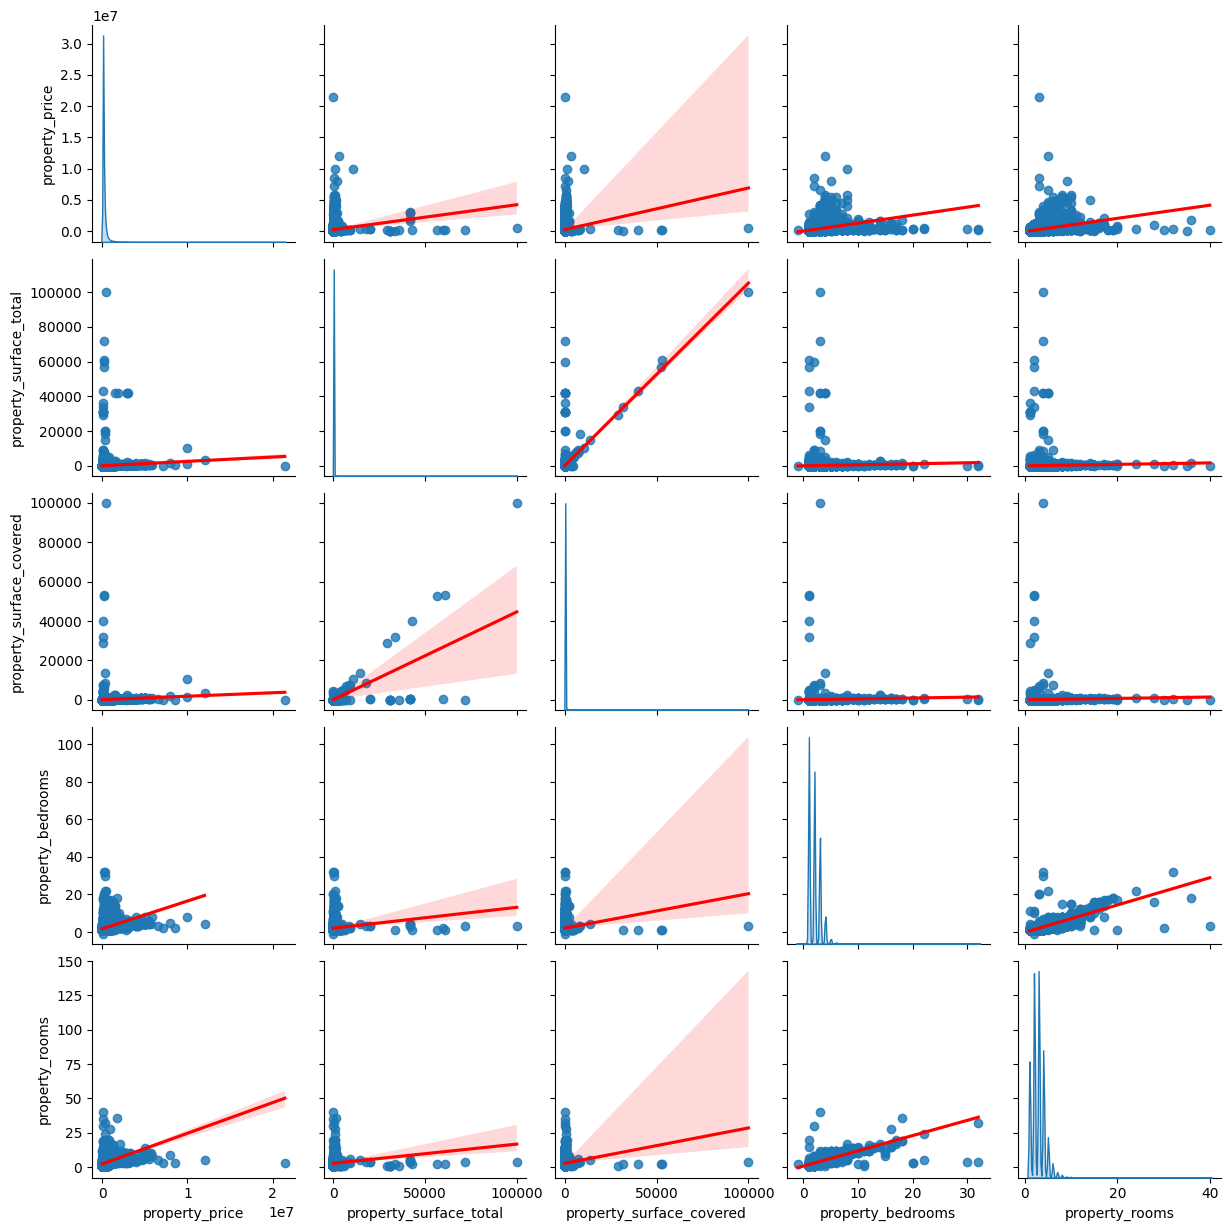

In [18]:
# pairplot con price, surface_total, surface_covered, bedrooms, rooms
sns.pairplot(prop_train[['property_price', 'property_surface_total', 'property_surface_covered', 'property_bedrooms', 'property_rooms']], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

Observando este grafico de relaciones se pueden ver que algunas de estas variables tienen claramente una relacion y otras no tanto.

* La relacion entre la **superficie total** y **superficie cubierta** es lineal y acendente, es decir da la impresion que una dependiera de la otra, y si se piensa logicamente esto tiene sentido (si hay mas espacio se cubre mas espacio) aunque no siempre es necesariamente el caso (puede haber una casa pequeña en un terreno grande)
* La relacion entre el **precio** y la cantidad de **habitaciones** y **dormitorios**, en esta se puede notar que a mas habitaciones y/o dormitorios mas aumenta el maximo precio pero no deja de haber precios mas bajos, sin embargo, pasada una cierta cantidad (aproximadamente ~15) el precio deja de aumentar y mas bien se queda constante (entre los valores hasta ~250,000 USD)
* La relacion entre **habitaciones** y **dormitorios** tambien es lineal y acendente, lo cual puede deberse a que cuando una casa tiene muchas habitaciones esta probablemente tenga tambien muchos dormitorios.

*Extra: hay ciertos valores outliers que pueden afectar a la correlacion entre variables por ejemplo una propiedad con mas de 60 habitaciones, estos seran analizados en la seccion de valores atipicos*

Para hacer un analisis mas profundo de estos datos se analiza la *covarianza* y *correlacion* entre las variables usadas en la figura anterior:

In [19]:
# covarianza y correlacion entre property_surface_total y property_surface_covered
covariance = prop_train['property_surface_total'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_surface_total'].corr(prop_train['property_surface_covered'])
print(f'Surface Total vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_rooms
covariance = prop_train['property_price'].cov(prop_train['property_rooms'])
correlation = prop_train['property_price'].corr(prop_train['property_rooms'])
print(f'Price vs Rooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_bedrooms
covariance = prop_train['property_price'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_price'].corr(prop_train['property_bedrooms'])
print(f'Price vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_total
covariance = prop_train['property_price'].cov(prop_train['property_surface_total'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_total'])
print(f'Price vs Surface Total\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_covered
covariance = prop_train['property_price'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_covered'])
print(f'Price vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre property_rooms y property_bedrooms
covariance = prop_train['property_rooms'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_rooms'].corr(prop_train['property_bedrooms'])
print(f'Rooms vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

Surface Total vs Surface Covered
Covariance: 306350.04 & Correlation: 0.68

Price vs Rooms
Covariance: 214098.58 & Correlation: 0.48

Price vs Bedrooms
Covariance: 156348.40 & Correlation: 0.44

Price vs Surface Total
Covariance: 26377905.70 & Correlation: 0.10

Price vs Surface Covered
Covariance: 18419811.15 & Correlation: 0.11

Rooms vs Bedrooms
Covariance: 1.32 & Correlation: 0.90



Esto nos dice que en efecto lo previamente observado era el caso. Tambien ahora gracias a este analisis se ve que las relaciones mas debiles son las dadas entre el precio y las superficies totales/cubiertas.

## Visualización de los datos

In [20]:
# Crear una copia del DataFrame original prop_train
visu_prop_train = prop_train.copy()

# Aplicar el filtro por la columna 'property_rooms' < 6 en la copia
visu_prop_train = visu_prop_train[visu_prop_train['property_rooms'] < 6]

# Filtrar propiedades con precios entre 20,000 y 500,000
visu_prop_train = visu_prop_train[(visu_prop_train['property_price'] > 20000) &
                             (visu_prop_train['property_price'] < 500000)]

# Crear una tabla pivote para calcular el precio promedio por barrio y cantidad de habitaciones
df_visu = visu_prop_train.pivot_table(values='property_price',
                                      index='place_l3',
                                      columns='property_rooms',
                                      aggfunc='mean')

df_visu

#Modificamos un rango para que se vea mejor la visualizacion

property_rooms                  1.0            2.0            3.0  \
place_l3                                                            
Abasto                 70445.555556   95827.101695  119716.255814   
Agronomía              69362.000000  107582.936170  168576.000000   
Almagro                76246.564356   97238.388303  139916.238141   
Balvanera              66575.146341   77978.262267  117199.361667   
Barracas               87802.884892  108936.493827  158701.035144   
Barrio Norte           94820.568475  116237.374593  196585.646766   
Belgrano              104276.312736  145517.889621  215485.054398   
Boca                   63533.309524   71507.976190   95906.127660   
Boedo                  69918.532258   90929.287037  135949.573964   
Caballito              85401.741525  109772.937167  165597.477222   
Catalinas              50500.000000            NaN  129500.000000   
Centro / Microcentro   61609.090909   82682.608696  116923.076923   
Chacarita              85966.200000  109778.314286  175202.006211   
Coghlan                86875.163522  125193.362140  200063.134328   
Colegiales             89478.992218  130472.187500  189163.980306   
Congreso               65921.282828   80650.056452  116934.692308   
Constitución           58866.376344   66335.305263   92755.156627   
Flores                 71305.886640   91180.114566  135258.162791   
Floresta               67704.705882   86687.567857  131874.305882   
Las Cañitas           110000.000000  222333.333333            NaN   
Liniers                63500.068182   87596.653179  138296.854167   
Mataderos              62908.409091   92160.465116  134758.195000   
Monserrat              76491.356643   85687.502347  118887.053097   
Monte Castro           78385.612245   95976.706897  152952.024390   
Nuñez                 103905.866667  142502.694561  210193.966507   
Once                   51890.697674   76781.690141  117339.823009   
Palermo               105278.031472  149233.385302  237802.107618   
Parque Avellaneda      67108.333333   83743.396226  111576.530612   
Parque Centenario      80876.923077  103750.033333  150278.947368   
Parque Chacabuco       77565.067227   95213.741228  144067.932384   
Parque Chas            77762.162162  109456.823529  178132.179487   
Parque Patricios       67139.115942   90327.433628  107733.406593   
Paternal               77687.810127   90990.953642  129479.146552   
Pompeya                44854.545455   60330.000000  103789.285714   
Puerto Madero         232212.121622  329402.461538  402422.640000   
Recoleta               97770.311707  126585.971920  229363.597623   
Retiro                 95388.750000  100850.896000  181061.696429   
Saavedra               93339.296178  118128.751756  185917.932468   
San Cristobal          62446.542373   78276.367857  112865.990683   
San Nicolás            59720.029412   78923.358255  115466.093596   
San Telmo              79359.427119  102573.149390  139497.765734   
Tribunales             62107.555556   85978.947368  111116.125000   
Velez Sarsfield        68703.571429   92969.464286  147580.392157   
Versalles              78150.000000  105812.857143  154998.529412   
Villa Crespo           82642.487476  106512.705656  153953.320833   
Villa Devoto           92089.606838  114741.720403  180068.068311   
Villa General Mitre    71266.243902   87401.020408  131380.000000   
Villa Lugano           64608.000000   81534.150943   87582.485981   
Villa Luro             72771.052632   92213.472050  135544.693252   
Villa Ortuzar          78406.050847  100629.214286  182571.692308   
Villa Pueyrredón       79845.991304  110490.139303  161927.912409   
Villa Real             78500.000000  106170.588235  138978.125000   
Villa Riachuelo                 NaN   96500.000000   77816.666667   
Villa Santa Rita       77425.718750   98134.659091  140796.330508   
Villa Soldati          53000.000000   67000.000000   90500.000000   
Villa Urquiza          91615.762128  124374.069977  190788.460714  

Text(80.31944444444443, 0.5, 'Zonas de Capital Federal')

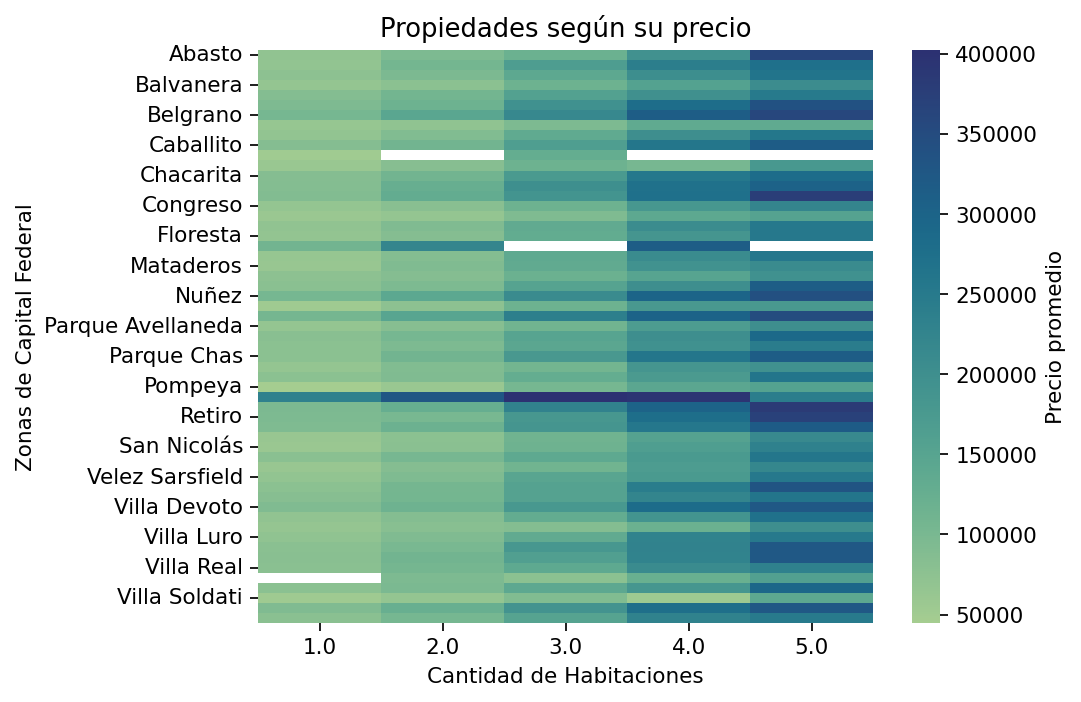

In [21]:
# Nueva figura con un dpi de 155 para mejorar la calidad de la visualización
plt.figure(dpi=155)

# Establecer el título de la visualización
plt.title("Propiedades según su precio")

# Crear un heatmap utilizando Seaborn con los datos de df_visu
sns.heatmap(df_visu, square=False, cmap='crest', fmt=".0f", cbar_kws={'label': 'Precio promedio'})

# Establecer etiquetas para los ejes x e y
plt.xlabel("Cantidad de Habitaciones")
plt.ylabel("Zonas de Capital Federal")

# Heatmap que muestra el precio promedio por propiedad tomando en cuenta la cantidad de habitaciones y su ubicación

La visualización presentada es un mapa de calor (heatmap) que muestra el precio promedio de las propiedades en función de la cantidad de habitaciones y su ubicación en diferentes zonas de la Ciudad Autónoma de Buenos Aires (CABA). Al observar el heatmap, es posible identificar patrones en los precios según la ubicación y el tamaño de la propiedad. Por ejemplo, puede haber áreas donde las propiedades con más habitaciones tienden a tener precios más altos, mientras que en otras zonas los precios son más uniformes independientemente del tamaño de la propiedad.La visualización proporciona una manera efectiva de entender cómo se relacionan el precio promedio de las propiedades, la cantidad de habitaciones y la ubicación en diferentes áreas de la Ciudad Autónoma de Buenos Aires. Ayuda a los interesados a tomar decisiones informadas sobre la compra o inversión en propiedades en la ciudad.

<ipython-input-22-ee8e753002fe>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],


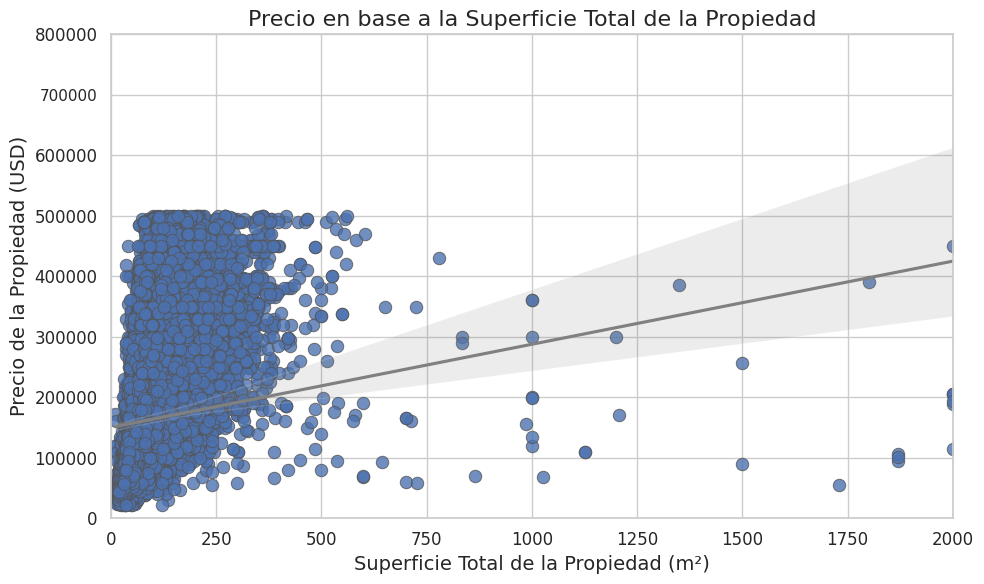

In [22]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el scatter plot utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
                x='property_surface_total', y='property_price', palette='pastel', s=80, alpha=0.8)

# Agregar una línea de regresión
sns.regplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
            x='property_surface_total', y='property_price', scatter=False, color='gray')

# Ajustar título y etiquetas
plt.title('Precio en base a la Superficie Total de la Propiedad', fontsize=16)
plt.xlabel('Superficie Total de la Propiedad (m²)', fontsize=14)
plt.ylabel('Precio de la Propiedad (USD)', fontsize=14)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el rango de los ejes
plt.xlim(0, 2000)  # Establecer el rango x hasta 20,000
plt.ylim(0, 800000)
# Añadir sombreado alrededor de las burbujas
plt.gca().collections[0].set_edgecolor("#555555")

plt.tight_layout()
plt.show()

Esta visualización muestra un diagrama de dispersión (scatter plot) que relaciona el precio de la propiedad con su superficie total, con el agregado de una línea de regresión para visualizar la tendencia general de los datos.La línea de regresión trazada en el gráfico muestra la tendencia general de los datos. Permite ver si hay una relación lineal entre el precio y la superficie total de la propiedad. En este caso, la pendiente de la línea de regresión indica la tasa de cambio en el precio para cada unidad adicional de superficie.Cada punto en el diagrama de dispersión representa una propiedad individual, y su posición relativa en el gráfico indica su precio y superficie total. Esto facilita la identificación de propiedades que pueden estar por encima o por debajo de la tendencia general.

In [23]:
# Calcular el precio promedio por barrio
precio_promedio_por_barrio = visu_prop_train.groupby('place_l3')['property_price'].mean().reset_index()

# Crear el gráfico de burbujas agrupadas
fig = px.scatter(precio_promedio_por_barrio,
                 x='place_l3', y='property_price',
                 size='property_price',
                 color='place_l3',
                 hover_name='place_l3',
                 size_max=50,
                 title='Precio promedio por barrio',
                 labels={'place_l3': 'Barrio', 'property_price': 'Precio promedio'})
fig.show()

Esta visualización muestra un gráfico de burbujas agrupadas que representa el precio promedio de las propiedades en cada barrio.El gráfico de burbujas agrupadas proporciona una representación visual del precio promedio de las propiedades en cada barrio de interés. Cada burbuja representa un barrio, y el tamaño de la burbuja indica el precio promedio de las propiedades en ese barrio. Los colores de las burbujas pueden indicar diferentes barrios para facilitar la identificación visual, las burbujas más grandes representan barrios con precios promedio más altos, mientras que las burbujas más pequeñas representan barrios con precios promedio más bajos.El gráfico de burbujas agrupadas es interactivo, lo que permite a los usuarios explorar los datos con mayor detalle al pasar el cursor sobre las burbujas para ver información adicional, como el nombre del barrio y el precio promedio.

In [24]:
# Filtramos los Nan de latitud ya que es impresindible contar con este dato para asignarlo al mapa
visu_prop_train = visu_prop_train.dropna(subset=['latitud'])

def generar_mapa_con_registros_por_barrio(df):
    """
    Función para generar un mapa con los registros por barrio.

    Parámetros:
    - visu_prop_train: DataFrame que contiene los datos de las propiedades filtradas.

    Devuelve:
    - mapa: Objeto del mapa de Folium.
    """
    # Coordenadas del centro de la Ciudad Autónoma de Buenos Aires
    latitud_caba = -34.6037
    longitud_caba = -58.3816

    # Crear el mapa centrado en CABA
    mapa = folium.Map(location=[latitud_caba, longitud_caba], zoom_start=12)

    # Agregar un grupo de marcadores
    marker_cluster = MarkerCluster().add_to(mapa)

    # Contar la cantidad de registros por barrio
    registros_por_barrio = visu_prop_train['place_l3'].value_counts()

    # Agregar marcadores en el mapa para cada barrio
    for barrio, cantidad in registros_por_barrio.items():
        latitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['latitud'].iloc[0]
        longitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['longitud'].iloc[0]

        folium.Marker(location=[latitud, longitud],
                      tooltip=f"{barrio}: {cantidad} Propiedad en Venta").add_to(marker_cluster)

    return mapa

# Generar el mapa con los registros por barrio
mapa = generar_mapa_con_registros_por_barrio(visu_prop_train)

# Mostrar el mapa
mapa

La visualización proporciona un mapa interactivo que muestra la ubicación de las propiedades en venta en la Ciudad Autónoma de Buenos Aires (CABA), agrupadas por barrio.Cada marcador en el mapa representa una propiedad, y su ubicación específica está determinada por las coordenadas de latitud y longitud proporcionadas en los datos.Los grupos de marcadores en el mapa indican la concentración de propiedades en cada barrio, lo que puede proporcionar información sobre la popularidad y la demanda de viviendas en diferentes áreas de CABA.

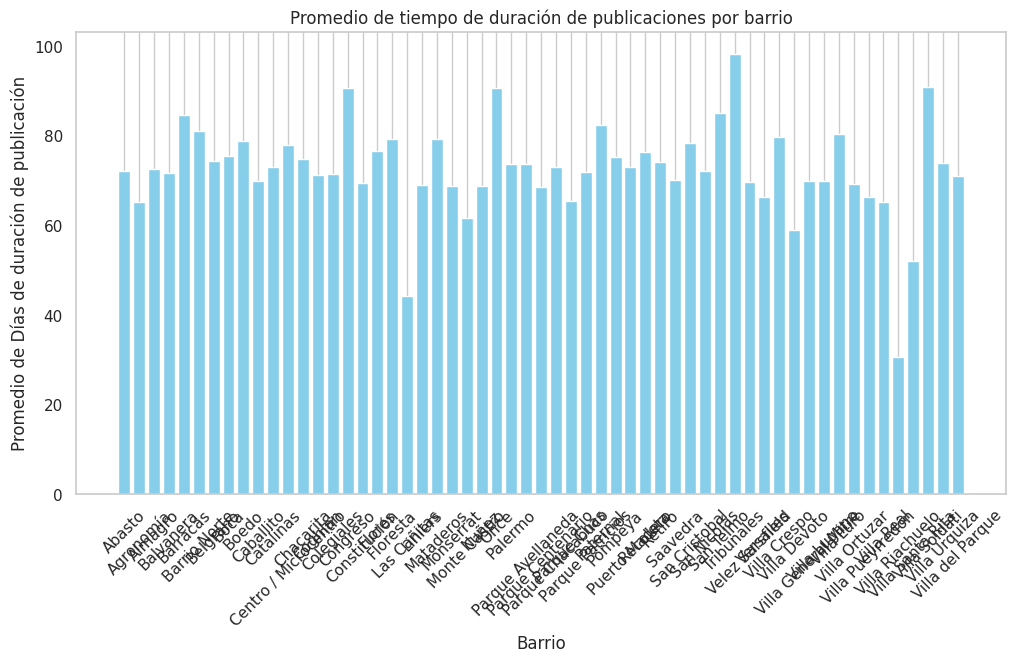

In [25]:
# Convertir las fechas a tipo datetime si no están en ese formato
visu_prop_train['start_date'] = pd.to_datetime(visu_prop_train['start_date'], errors='coerce')
visu_prop_train['end_date'] = pd.to_datetime(visu_prop_train['end_date'], errors='coerce')

# Calcular la duración de cada publicación
visu_prop_train['duracion_publicacion'] = (visu_prop_train['end_date'] - visu_prop_train['start_date']).dt.days

# Agrupar por barrio y calcular el promedio de duración de las publicaciones
promedio_duracion_por_barrio = visu_prop_train.groupby('place_l3')['duracion_publicacion'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(promedio_duracion_por_barrio['place_l3'], promedio_duracion_por_barrio['duracion_publicacion'], color='skyblue')
plt.title('Promedio de tiempo de duración de publicaciones por barrio')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Días de duración de publicación')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()

Esta visualización presenta un gráfico de barras que muestra el promedio de tiempo de duración de las publicaciones por barrio en la Ciudad Autónoma de Buenos Aires (CABA). Cada barra en el gráfico representa un barrio específico, y su altura indica el promedio de días que las publicaciones permanecen activas en ese barrio.La visualización permite comparar fácilmente la duración promedio de las publicaciones entre diferentes barrios de la ciudad. Las barras más altas indican que las publicaciones en ese barrio tienden a permanecer activas por más tiempo, mientras que las barras más cortas indican una duración promedio más corta de las publicaciones.Los barrios con barras más altas pueden indicar áreas de la ciudad donde la demanda de propiedades es más alta o donde las propiedades tienden a permanecer en el mercado por períodos más prolongados. Esto puede ser útil para comprender las dinámicas del mercado inmobiliario en diferentes áreas de la ciudad.

## Datos Faltantes
En esta sección se va a realizar el análsis de la presencia de datos faltantes

### Análisis de datos faltantes a nivel columna

#### Análisis previo

In [26]:
ds_train = prop_train
ds_test = prop_test

In [27]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l3', 'place_l4', 'place_l5', 'place_l6', 'property_type',
       'property_rooms', 'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price'],
      dtype='object')

Para iniciar, vamos a analizar la cantidad de datos faltantes por columna y su porcentaje

In [28]:
def obtener_filas(ds):
  return ds.shape[0]

def obtener_columnas(ds):
  return ds.shape[1]

In [29]:
filas = obtener_filas(ds_train)
columnas = obtener_columnas(ds_train)
print("El dataset de entrenamiento tiene {} filas y {} columnas".format(filas,columnas))

El dataset de entrenamiento tiene 75399 filas y 16 columnas


Obtengo el porcentaje de cada columna que contiene datos nulos

In [30]:
def obtener_promedio_nulos(ds):
  return ds.isna().sum() / obtener_filas(ds) * 100

promedio_datos_nulos = obtener_promedio_nulos(ds_train)
promedio_datos_nulos

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.928434
longitud                      3.928434
place_l3                      0.454913
place_l4                     96.088808
place_l5                    100.000000
place_l6                    100.000000
property_type                 0.000000
property_rooms                1.118052
property_bedrooms            11.696442
property_surface_total        5.122084
property_surface_covered      3.583602
property_price                0.000000
dtype: float64

Muestro la cantidad de datos nulos por columna

In [31]:
def obtener_cantidad_nulos_ds(ds):
  return ds.isna().sum()

cant_datos_nulos = obtener_cantidad_nulos_ds(ds_train)
cant_datos_nulos

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                      2962
longitud                     2962
place_l3                      343
place_l4                    72450
place_l5                    75399
place_l6                    75399
property_type                   0
property_rooms                843
property_bedrooms            8819
property_surface_total       3862
property_surface_covered     2702
property_price                  0
dtype: int64

Grafico esta relación

<ipython-input-32-f848825aef01>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



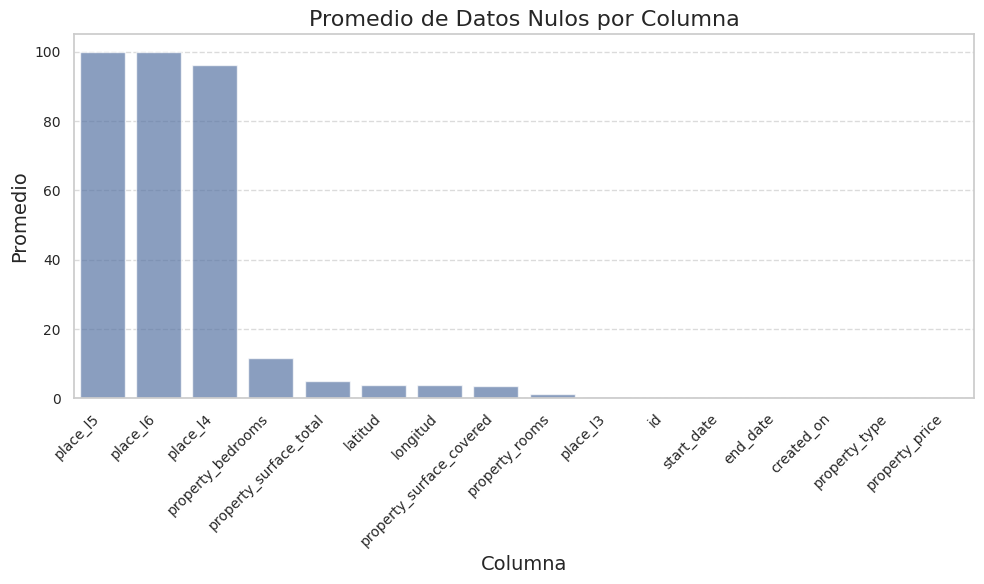

In [32]:
ds_porcentaje = promedio_datos_nulos

# Ordenar los valores en orden descendente
ds_porcentaje = ds_porcentaje.sort_values(ascending = False)

# Establecer el estilo del gráfico
sns.set_style("whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el gráfico de barras
bar_plot = sns.barplot(x=ds_porcentaje.index, y=ds_porcentaje.values, alpha=0.7)

# Agregar título y etiquetas
bar_plot.set_title("Promedio de Datos Nulos por Columna", fontsize=16)
bar_plot.set_xlabel("Columna", fontsize=14)
bar_plot.set_ylabel("Promedio", fontsize=14)

# Rotar etiquetas del eje x para una mejor legibilidad
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Agregar líneas de la cuadrícula y ajustar el tamaño de la fuente
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Entonces los datos que debo analizar son:

In [33]:
def obtener_cantidad_nulos(ds):
  promedio_datos_nulos = obtener_promedio_nulos(ds)
  promedio_datos_nulos.sort_values(ascending = False,inplace=True)
  filtro = promedio_datos_nulos!=0
  return promedio_datos_nulos[filtro] if not promedio_datos_nulos[filtro].empty else 'No existen valores NaN'

obtener_cantidad_nulos(ds_train)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.088808
property_bedrooms            11.696442
property_surface_total        5.122084
latitud                       3.928434
longitud                      3.928434
property_surface_covered      3.583602
property_rooms                1.118052
place_l3                      0.454913
dtype: float64

In [34]:
obtener_cantidad_nulos(ds_test)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.318302
property_bedrooms            11.501326
property_surface_total        5.209549
latitud                       4.074271
longitud                      4.074271
property_surface_covered      3.458886
property_rooms                1.066313
place_l3                      0.392573
dtype: float64

#### Elimino places (place_l6, place_l5, place_l4)

Al ver el gráfico y el análisis previo de nulos. Puedo eliminar las columnas ```place_l6```, ```place_l5``` y ```place_l4```, pues tienen en su totalidad de datos nulos. El ```place_l4``` tiene casi su totalidad de nulos.

Consideramos que las columnas ```place_l6```, ```place_l5``` son datos faltantes de tipo MCAR

In [35]:
columnas = ['place_l6','place_l5','place_l4']
ds_train.drop(columns=columnas, inplace=True)
ds_test.drop(columns=columnas, inplace=True)

In [36]:
ds_train.head()

id  start_date    end_date created_on  \
452830  AUtJifYEQ/s3dG0NpXBbIQ==  2021-12-16  2022-02-09 2021-12-16   
444054  NfZ/vOwlYFo4UeI89bzZGA==  2021-11-09  2022-01-27 2021-11-09   
116180  +EArPaiD7rrNoBtoaMpzVA==  2021-11-12  2022-01-27 2021-11-12   
129763  +XDrDNeV38RPqAhEPCYJMw==  2021-09-11  2021-09-14 2021-09-11   
169860  1Ua0cL5f8tXkQrkeyxxfsw==  2021-07-28  2021-12-15 2021-07-28   

          latitud   longitud   place_l3 property_type  property_rooms  \
452830 -34.608810 -58.431124  Caballito            PH             4.0   
444054 -34.617845 -58.435811  Caballito  Departamento             3.0   
116180 -34.585271 -58.412706    Palermo  Departamento             2.0   
129763 -34.571179 -58.431863    Palermo  Departamento             7.0   
169860 -34.603915 -58.416817    Almagro  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
452830                4.0                    96.0                      84.0   
444054                2.0                   109.0                       NaN   
116180                1.0                    31.0                      30.0   
129763                4.0                   425.0                     400.0   
169860                3.0                    86.0                      72.0   

        property_price  
452830        169900.0  
444054        229000.0  
116180         77000.0  
129763       2100000.0  
169860        140000.0

In [37]:
ds_test.head()

id  start_date    end_date  created_on  \
240378  aDAXcZI3PZyopuMVL4li7Q==  2021-05-21  2021-05-21  2021-05-21   
375305  RgK4nS+svPcVTp8Ibw1C8A==  2021-10-13  9999-12-31  2021-10-13   
86103   OiAabNdlyJWNCgxYFxBJmA==  2021-03-26  2021-06-05  2021-03-26   
336607  nNS+LTrIG7kGSxCvKW3/RA==  2021-07-21  2021-07-23  2021-07-21   
176708  pVTqz4tfA5qMp42Nf13pZg==  2021-08-31  2021-11-06  2021-08-31   

          latitud   longitud             place_l3 property_type  \
240378 -34.619859 -58.356199           Colegiales  Departamento   
375305 -34.549291 -58.455949                Nuñez  Departamento   
86103  -34.626379 -58.448861            Caballito  Departamento   
336607 -34.598756 -58.496795     Villa del Parque  Departamento   
176708 -34.608546 -58.464504  Villa General Mitre  Departamento   

        property_rooms  property_bedrooms  property_surface_total  \
240378             2.0                1.0                    41.0   
375305             2.0                1.0                    62.0   
86103              2.0                1.0                    50.0   
336607             2.0                1.0                    39.0   
176708             2.0                1.0                    43.0   

        property_surface_covered  property_price  
240378                      41.0        134000.0  
375305                      47.0        167000.0  
86103                       47.0        165000.0  
336607                      39.0         74750.0  
176708                      40.0         79000.0

In [38]:
nulos_preimputacion = obtener_cantidad_nulos(ds_train)

In [39]:
obtener_cantidad_nulos(ds_test)

property_bedrooms           11.501326
property_surface_total       5.209549
latitud                      4.074271
longitud                     4.074271
property_surface_covered     3.458886
property_rooms               1.066313
place_l3                     0.392573
dtype: float64

#### Generar funciones para análisis

In [40]:
# establezco si son o no nulos
def generar_ds_nulo(columnas):
  return ds_train[columnas].isna()

def filtrar_nulo(columna,ds):
  return ds[columna]==True

def filtrar_no_nulo(columna,ds):
  return ds[columna]==False

def aplicar_filtro(ds,filtro,columna,nulidad):
  ds.loc[filtro,columna] = nulidad
  return ds

In [41]:
def contar_ds(ds,columna):
  return ds[columna].value_counts()

def imprimir_cantidades(nulos,no_nulos,columna):
  print("Cantidad de datos NULOS en {}: {}".format(columna,nulos))
  print("Cantidad de datos NO NULOS en {}: {}".format(columna,no_nulos))

In [42]:
def generar_grafico(ds, columna):
  # Ajustar el tamaño de la figura
  plt.figure(figsize=(10, 6))

  # Agrupar por 'longitud' y obtener el tamaño de cada grupo, luego trazar el gráfico de barras horizontales
  ds.groupby(columna).size().plot(kind='barh', color=sns.color_palette('Dark2'))

  # Ocultar los ejes superior y derecho
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  titulo = 'Tamaño de Grupo por ' + columna
  # Configurar el tamaño de la letra del título y las etiquetas
  plt.title(titulo, fontsize=16)
  plt.xlabel('Cantidad', fontsize=14)
  plt.ylabel(columna, fontsize=14)

  # Mostrar el gráfico
  plt.show()
    #titulo = "Gráfico de barras: Cantidad de nulos en la variable " + columna
    #ds[columna].value_counts().plot.bar(alpha=0.5, title=titulo, xlabel="tipo de dato", ylabel="cantidad de filas", fontsize=10)

#### Latitud y longitud
Vamos a anlizar los nulos de estas dos variables

In [43]:
latatitud_longitud = generar_ds_nulo(['latitud','longitud'])
# filtros latitud
v_filtro_latitud = filtrar_nulo('latitud',latatitud_longitud)
f_filtro_latitud = filtrar_no_nulo('latitud',latatitud_longitud)
# filtros longitud
v_filtro_longitud = filtrar_nulo('longitud',latatitud_longitud)
f_filtro_longitud = filtrar_no_nulo('longitud',latatitud_longitud)
# aplico los filtros
latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_latitud,'latitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_latitud,'latitud','no nulo')

latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_longitud,'longitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_longitud,'longitud','no nulo')

latatitud_longitud.head()



latitud longitud
452830  no nulo  no nulo
444054  no nulo  no nulo
116180  no nulo  no nulo
129763  no nulo  no nulo
169860  no nulo  no nulo

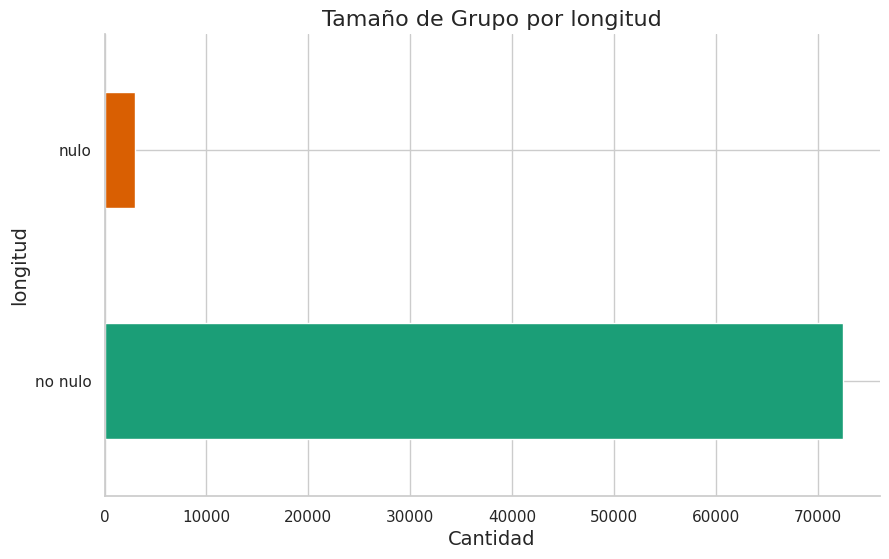

In [44]:
generar_grafico(latatitud_longitud, 'longitud')

In [45]:
cant_nulos_longitud,cant_no_nulos_longitud = contar_ds(latatitud_longitud,'longitud')
imprimir_cantidades(cant_nulos_longitud,cant_no_nulos_longitud,'longitud')

Cantidad de datos NULOS en longitud: 72437
Cantidad de datos NO NULOS en longitud: 2962


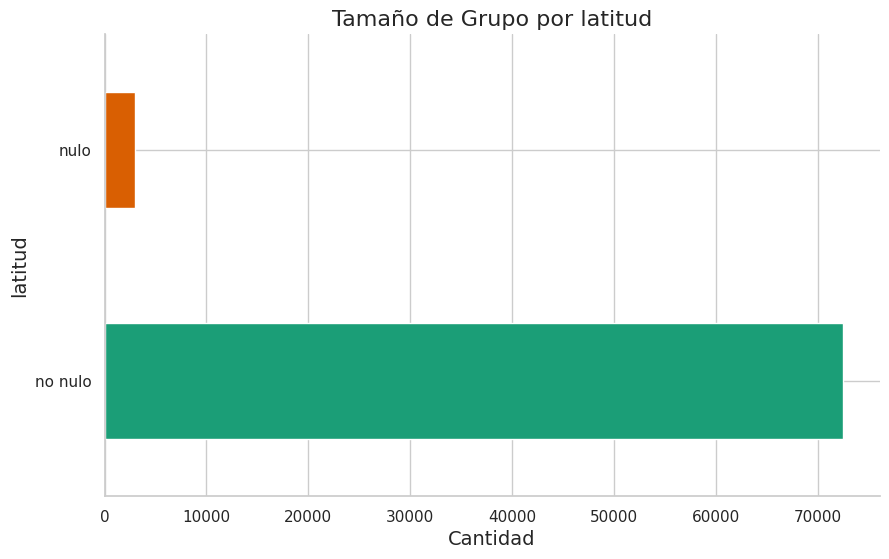

In [46]:
generar_grafico(latatitud_longitud,'latitud')

In [47]:
cant_nulos_longitud,cant_no_nulos_longitud = contar_ds(latatitud_longitud,'latitud')
imprimir_cantidades(cant_nulos_longitud,cant_no_nulos_longitud,'latitud')

Cantidad de datos NULOS en latitud: 72437
Cantidad de datos NO NULOS en latitud: 2962


#### Superficie total y Superficie cubierta (property_surface_total, property_surface_covered)

In [48]:
# establezco si son o no nulos
sup_total_cubierta = generar_ds_nulo(['property_surface_total','property_surface_covered'])
# creo filtro si son o no nulos
v_filtro_total =  filtrar_nulo('property_surface_total',sup_total_cubierta)
f_filtro_total =  filtrar_no_nulo('property_surface_total',sup_total_cubierta)

v_filtro_cubierto =  filtrar_nulo('property_surface_covered',sup_total_cubierta)
f_filtro_cubierto =  filtrar_no_nulo('property_surface_covered',sup_total_cubierta)
# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_total,'property_surface_total','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_total,'property_surface_total','no nulo')

# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_cubierto,'property_surface_covered','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_cubierto,'property_surface_covered','no nulo')

sup_total_cubierta.head()

property_surface_total property_surface_covered
452830                no nulo                  no nulo
444054                no nulo                     nulo
116180                no nulo                  no nulo
129763                no nulo                  no nulo
169860                no nulo                  no nulo

In [49]:
cant_nulos_total, cant_no_nulos_total = contar_ds(sup_total_cubierta,'property_surface_total')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_surface_total')

Cantidad de datos NULOS en property_surface_total: 71537
Cantidad de datos NO NULOS en property_surface_total: 3862


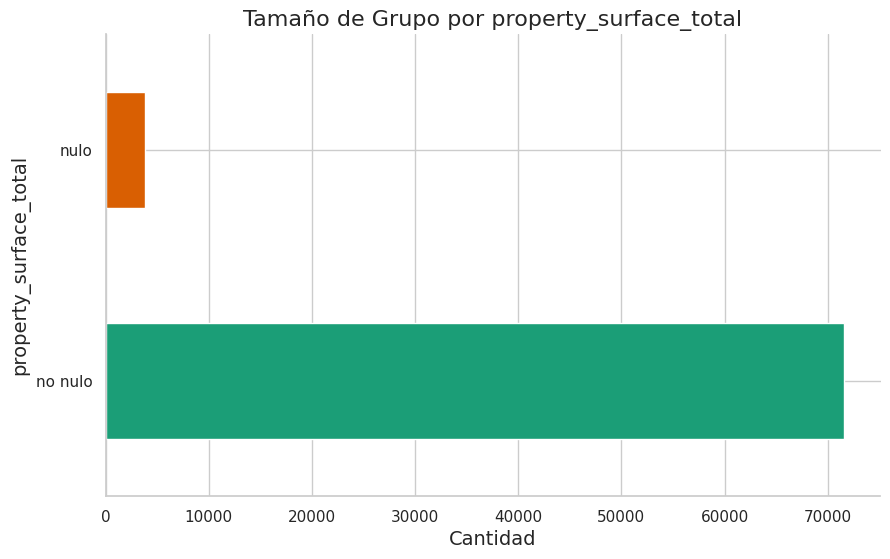

In [50]:
generar_grafico(sup_total_cubierta,'property_surface_total')

In [51]:
cant_nulos_total, cant_no_nulos_total = contar_ds(sup_total_cubierta,'property_surface_covered')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_surface_covered')

Cantidad de datos NULOS en property_surface_covered: 72697
Cantidad de datos NO NULOS en property_surface_covered: 2702


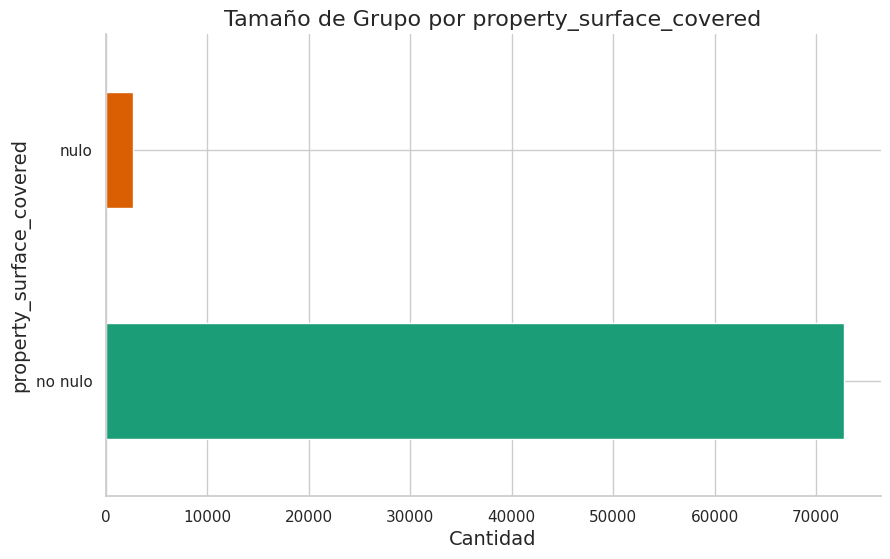

In [52]:
generar_grafico(sup_total_cubierta,'property_surface_covered')

#### Habitaciones y dormitorios (property_rooms, property_bedrooms)

In [53]:
# establezco si son o no nulos
habitaciones_dormis = generar_ds_nulo(['property_rooms','property_bedrooms'])
# creo filtro si son o no nulos
v_filtro_hab = filtrar_nulo('property_rooms',habitaciones_dormis)
f_filtro_hab =  filtrar_no_nulo('property_rooms',habitaciones_dormis)

v_filtro_dormis =  filtrar_nulo('property_bedrooms',habitaciones_dormis)
f_filtro_dormis =  filtrar_no_nulo('property_bedrooms',habitaciones_dormis)

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_hab,'property_rooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_hab,'property_rooms','no nulo')

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_dormis,'property_bedrooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_dormis,'property_bedrooms','no nulo')

habitaciones_dormis.head()

property_rooms property_bedrooms
452830        no nulo           no nulo
444054        no nulo           no nulo
116180        no nulo           no nulo
129763        no nulo           no nulo
169860        no nulo           no nulo

In [54]:
cant_nulos_total, cant_no_nulos_total = contar_ds(habitaciones_dormis,'property_rooms')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_rooms')

Cantidad de datos NULOS en property_rooms: 74556
Cantidad de datos NO NULOS en property_rooms: 843


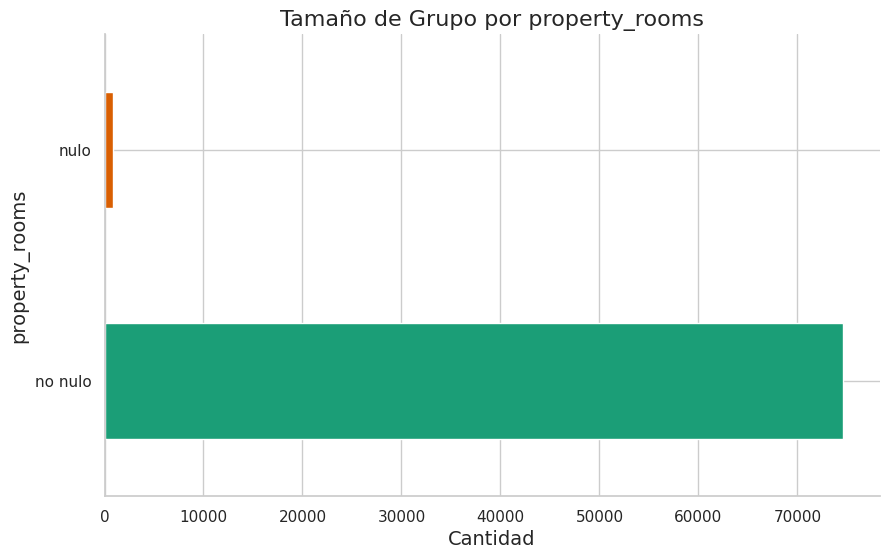

In [55]:
generar_grafico(habitaciones_dormis,'property_rooms')

In [56]:
cant_nulos_total, cant_no_nulos_total = contar_ds(habitaciones_dormis,'property_bedrooms')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_bedrooms')

Cantidad de datos NULOS en property_bedrooms: 66580
Cantidad de datos NO NULOS en property_bedrooms: 8819


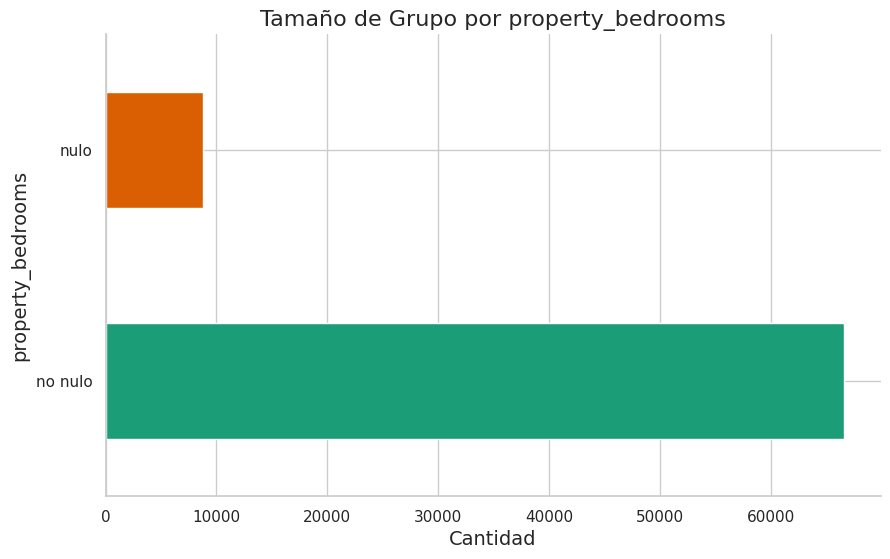

In [57]:
generar_grafico(habitaciones_dormis,'property_bedrooms')

#### Barrio (place_l3)

In [58]:
# establezco si son o no nulos
barrio = generar_ds_nulo('place_l3')
# creo filtro si son o no nulos
v_filtro_barrio =  barrio == True
f_filtro_barrio =  barrio == False
# establezco los nulos y no nulos
barrio.loc[v_filtro_barrio] = 'nulo'
barrio.loc[f_filtro_barrio] = 'no nulo'

barrio.head()

452830    no nulo
444054    no nulo
116180    no nulo
129763    no nulo
169860    no nulo
Name: place_l3, dtype: object

In [59]:
imprimir_cantidades(barrio.value_counts()[0],barrio.value_counts()[1],'place_l3')

Cantidad de datos NULOS en place_l3: 75056
Cantidad de datos NO NULOS en place_l3: 343


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable place_l3'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

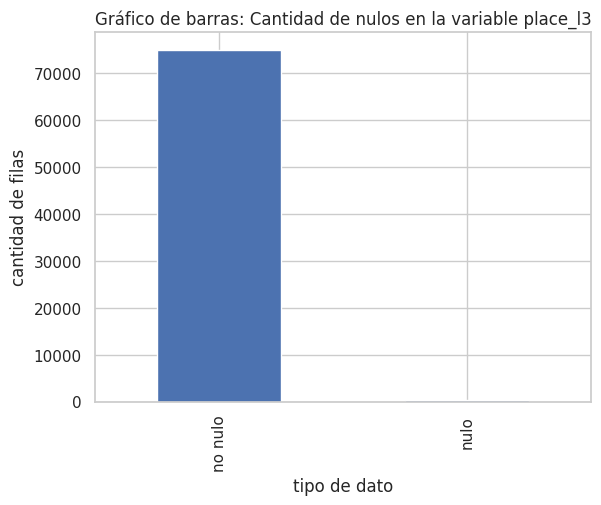

In [60]:
barrio.value_counts().plot.bar(alpha=1,title="Gráfico de barras: Cantidad de nulos en la variable place_l3", xlabel="tipo de dato" , ylabel="cantidad de filas")

#### Precio

In [61]:
precio = generar_ds_nulo('property_price')
# creo filtro si son o no nulos
v_filtro_precio =  precio == True
f_filtro_precio =  precio == False
# establezco los nulos y no nulos
precio.loc[v_filtro_precio] = 'nulo'
precio.loc[f_filtro_precio] = 'no nulo'

precio.head()

452830    no nulo
444054    no nulo
116180    no nulo
129763    no nulo
169860    no nulo
Name: property_price, dtype: object

In [62]:
print("Cantidad de datos NO NULOS en property_price: {}".format(precio.value_counts()))
precio.value_counts()

Cantidad de datos NO NULOS en property_price: property_price
no nulo    75399
Name: count, dtype: int64


property_price
no nulo    75399
Name: count, dtype: int64

<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_price'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

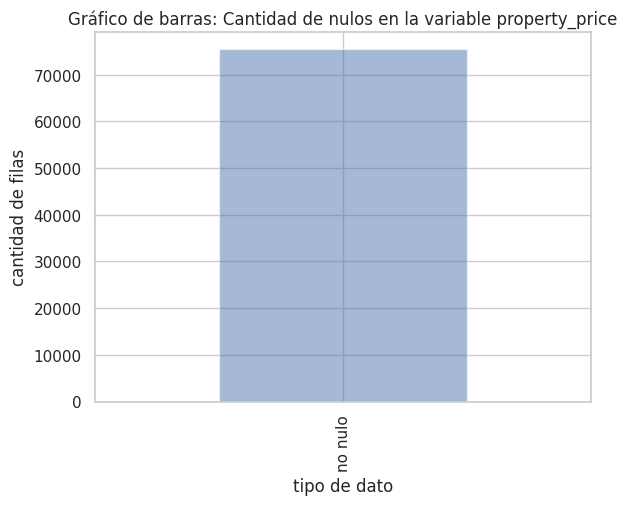

In [63]:
precio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_price", xlabel="tipo de dato" , ylabel="cantidad de filas")

### Análisis de datos faltantes a nivel fila

Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos
faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de
faltantes por fila en el dataset.


In [64]:
# Calcular la cantidad de filas nulas
cantidad_filas_nulas = ds_train.isna().sum(axis=1)
filtro = cantidad_filas_nulas > 0
cantidad_filas_nulas = cantidad_filas_nulas[filtro]
print("La cantidad de filas que tienen al menos un dato nulo es: ",len(cantidad_filas_nulas))

La cantidad de filas que tienen al menos un dato nulo es:  17138


<Axes: title={'center': 'Gráfico de barras: Cantidad de filas nulas en ds_train'}, xlabel='cantidad de nulos', ylabel='cantidad de filas'>

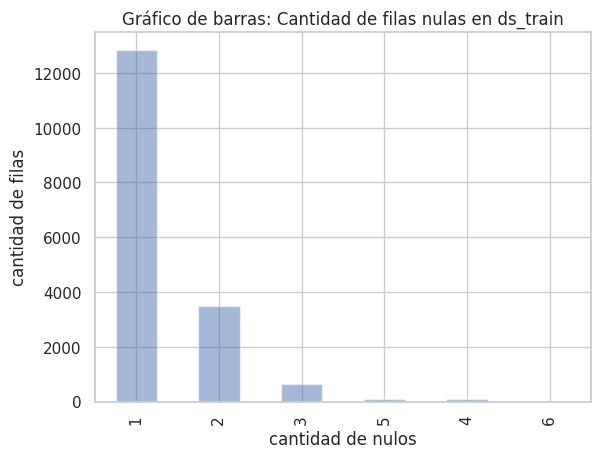

In [65]:
cantidad_filas_nulas.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de filas nulas en ds_train", xlabel="cantidad de nulos" , ylabel="cantidad de filas")

### Revisión de datos faltantes o mal ingresados

Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de
valores, eliminación de registros incompletos, etc.

Recordemos los datos nulos que tenemos en ds_train

In [66]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.696442
property_surface_total       5.122084
latitud                      3.928434
longitud                     3.928434
property_surface_covered     3.583602
property_rooms               1.118052
place_l3                     0.454913
dtype: float64

Veremos unas de las estrategias para para trabajar con datos faltantes. Procederemos a imputar datos

#### Imputación Cold Deck
Vamos a trabajar con los datos ```latitud``` y ```longitud``` para completar la variable ```place_l3```.
Para ello vamos a utilizar el csv ```barrios.csv``` provisto por [GCBA](https://data.buenosaires.gob.ar/dataset/barrios/resource/juqdkmgo-191-resource) que nos da la localización y límites geográficos de los barrios de la Ciudad.

Antes de imputar vamos a hacer una copia para analizar la imputación en el siguiente punto.

In [67]:
ds_pre_imputacion = ds_train.copy()

Para ello vamos a usar Geopandas correspondiente a la documentación wkt

In [68]:
ds_barrios = pd.read_csv(barrios_file, header=0,sep=';')
def completar_barrios(ds):
  for index, propiedad in ds.iterrows():
    if isinstance(propiedad["place_l3"], str):
      continue

    for index,barrio in ds_barrios.iterrows():
      barrio_aux = barrio['BARRIO']
      if barrio_aux == '' or barrio_aux is None:
        continue
      coordenada = Point(propiedad['longitud'],propiedad['latitud'])
      # uso wkt Para deserializar una cadena y obtener un nuevo objeto geométrico del tipo apropiado
      # uso covers para ver si está cubierta la coordenada de ds_barrios por lo que tiene mi ds
      if wkt.loads(barrio['WKT']).covers(coordenada):
        ds.loc[index,'place_l3'] = barrio_aux

  return

completar_barrios(ds_train)
completar_barrios(ds_test)

Visualizamos el dataset para ver si podemos ver algún nulo rápido.

In [69]:
# Ordenar el DataFrame por 'place_l3'
ds_train_sorted = ds_train.sort_values(by='place_l3')

# Extraer la columna 'place_l3'
place_l3_column = ds_train_sorted['place_l3']

# Elimino la columna 'place_l3' del DataFrame
ds_train_sorted.drop(columns=['place_l3'], inplace=True)

# Inserto la columna 'place_l3' en la primera posición
ds_train_sorted.insert(0, 'place_l3', place_l3_column)

# Ahora ds_train_sorted tiene 'place_l3' como la primera columna
# para visualizarlo mejor
ds_train_sorted

place_l3                        id  start_date    end_date  \
27      AGRONOMIA                       NaN         NaN         NaN   
4         ALMAGRO                       NaN         NaN         NaN   
265546     Abasto  +NV0BUUTuBvepHg7l59Ahg==  2021-11-19  2021-11-27   
255583     Abasto  acxcktDWEsrtaKrTWS543A==  2021-11-03  9999-12-31   
67881      Abasto  rzzbskL4MCGZ1bMcCdhUSQ==  2021-03-27  2021-04-19   
...           ...                       ...         ...         ...   
24188         NaN  nOm9jX5vGYYxy7yaK+g2xg==  2021-05-03  2021-06-30   
45953         NaN  TZSxJRPqNGJ8Rkp+5Ilaew==  2021-04-21  9999-12-31   
411058        NaN  pUcVtnFyfRaD8YhgT/GMEQ==  2021-03-02  2021-06-05   
276992        NaN  QxvzXNpf9ZwGmDC7PeLCMA==  2021-12-23  2021-12-23   
156363        NaN  XuCl2HHN6+08zHJR69m9Vw==  2021-09-26  9999-12-31   

       created_on    latitud   longitud property_type  property_rooms  \
27            NaT        NaN        NaN           NaN             NaN   
4             NaT        NaN        NaN           NaN             NaN   
265546 2021-11-19 -34.604245 -58.413048  Departamento             4.0   
255583 2021-11-03        NaN        NaN  Departamento             4.0   
67881  2021-03-27 -34.606409 -58.411475  Departamento             3.0   
...           ...        ...        ...           ...             ...   
24188  2021-05-03 -34.620966 -58.473831  Departamento             2.0   
45953  2021-04-21 -34.609755 -58.419591  Departamento             4.0   
411058 2021-03-02 -32.964094 -60.629053  Departamento             1.0   
276992 2021-12-23 -34.623151 -58.513376  Departamento             1.0   
156363 2021-09-26 -34.584680 -58.421772  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
27                    NaN                     NaN                       NaN   
4                     NaN                     NaN                       NaN   
265546                3.0                   110.0                     100.0   
255583                3.0                    82.0                      78.0   
67881                 2.0                    54.0                      52.0   
...                   ...                     ...                       ...   
24188                 NaN                    33.0                      33.0   
45953                 NaN                    70.0                      66.0   
411058                NaN                    34.0                      34.0   
276992                NaN                    38.0                       NaN   
156363                NaN                    71.0                      64.0   

        property_price  
27                 NaN  
4                  NaN  
265546        335000.0  
255583        135000.0  
67881         105000.0  
...                ...  
24188          62000.0  
45953         128500.0  
411058         52000.0  
276992         68000.0  
156363        170000.0  

[75418 rows x 13 columns]

Vemos que hay datos NaN en el barrio

In [70]:
ds_train['place_l3'].isna().value_counts()

place_l3
False    75075
True       343
Name: count, dtype: int64

Estos datos en NaN pueden ser datos mal ingresados. Se ingresó mal la coordenada de la propiedad y se la clasificó como Capital Federal. Lo mismo puede suceder de que no tengan latitud ni longitud. Procedo a eliminar dichos datos

In [71]:
columnas_a_eliminar = ['latitud','longitud','place_l3']
ds_train = ds_train.dropna(subset=columnas_a_eliminar)
ds_test =  ds_test.dropna(subset=columnas_a_eliminar)

Verifico mis datos_nulos en mi dataset

In [72]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.595487
property_surface_total       5.026649
property_surface_covered     3.564754
property_rooms               0.970444
dtype: float64

#### Análisis de property's
Ahora vamos a seguir con el análisis de las siguientes variables:
*     property_bedrooms
*     property_rooms
*     property_surface_total
*     property_surface_covered

Podemos identificar que estas variables son tipos de datos faltantes MAR.

##### Análisis de ceros

Para empezar verifico si alguno de estos datos es negativo. Pues valores negativos para alguno de estos atributos no tiene sentido.

In [73]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                          True
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Vemos que existen valores menores o iguales que 0 en el atributo ```property_bedrooms```. Procedo a ver cuantos registros cumplen con esta condición.

In [74]:
filtro = ds_propiedades_filtradas['property_bedrooms'] < 1
ds_propiedades_filtradas[filtro]

id  start_date    end_date  created_on  \
406880  3WI+zCCMeb9TR5kOBm7rhg==  2021-01-07  2021-03-18  2021-01-07   

          latitud   longitud         place_l2       place_l3 place_l4  \
406880 -34.577595 -58.495185  Capital Federal  Villa Urquiza      NaN   

       place_l5  place_l6 operation property_type  property_rooms  \
406880      NaN       NaN     Venta  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
406880               -1.0                    61.0                      43.0   

        property_price property_currency  \
406880        125000.0               USD   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...

Como hay un registro, procederemos a asignarlo nulo.

In [75]:
ds_train.loc[ds_train['property_bedrooms'] < 1,'property_bedrooms'] = np.nan

In [76]:
filtro = ds_train['property_bedrooms'] < 1
ds_train[filtro]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

Se verifica si hay valores menores o iguales que cero.

In [77]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Se realiza el mismo análisis con ds_test

In [78]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_test[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

##### Análisis de duplicados

Verificamos si hay datos duplicados en estas columnas

In [79]:
ds_train[ds_train.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [80]:
ds_test[ds_test.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

Procederemos a eliminar filas duplicadas

In [81]:
size_antes = len(ds_train)
ds_train_filtrado = ds_train.drop_duplicates()
size_despues = len(ds_train_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_train")

Se eliminaron: 0 filas duplicadas de ds_train


In [82]:
ds_train_filtrado.reset_index(drop=True, inplace=True)

In [83]:
size_antes = len(ds_test)
ds_test_filtrado = ds_test.drop_duplicates()
size_despues = len(ds_test_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_test")

Se eliminaron: 0 filas duplicadas de ds_test


In [84]:
ds_test_filtrado.reset_index(drop=True, inplace=True)

##### Completacion de las columnas de forma multivariada

Como las variables faltantes son datos de tipo MAR (Missing At Random), elijiremos el proceso de imputación de datos MICE (Multivariate Imputation by Chained Equations)

In [283]:
# la variable columnas_con_numeros tiene las columnas a analizar
lr = LinearRegression()
imp = IterativeImputer(
    estimator=lr,
    missing_values = np.nan,
    max_iter = 20,
    verbose = 0,
    random_state = 0,
    min_value = 1
)


def rellenar_variables(ds,columnas):
  df_eliminar_nans_op3_completo = ds[columnas].copy()
  ds[columnas] = imp.fit_transform(df_eliminar_nans_op3_completo)

rellenar_variables(ds_train,columnas_con_numeros)
rellenar_variables(ds_test,columnas_con_numeros)

ds_train[columnas_con_numeros] = ds_train[columnas_con_numeros].round()
ds_test[columnas_con_numeros] = ds_test[columnas_con_numeros].round()


<ipython-input-283-2db52bbdb419>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-283-2db52bbdb419>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-283-2db52bbdb419>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-283-

In [224]:
obtener_promedio_nulos(ds_train)

id                                   0.0
start_date                           0.0
end_date                             0.0
created_on                           0.0
latitud                              0.0
longitud                             0.0
place_l3                             0.0
property_type                        0.0
property_rooms                       0.0
property_bedrooms                    0.0
property_surface_total               0.0
property_surface_covered             0.0
property_price                       0.0
z_property_bedrooms                  0.0
zm_property_bedrooms                 0.0
place_encoded                        0.0
type_encoded                         0.0
score_property_surface               0.0
score_price_surface_total            0.0
score_location_price                 0.0
property_location_surface_covered    0.0
dtype: float64

In [225]:
obtener_cantidad_nulos(ds_train)

'No existen valores NaN'

### Comparación de distribuciones
En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con
la distribución anterior a la imputación de los datos faltantes.

Para ello veamos nuestro ```ds_pre_imputacion```

In [527]:
ds_pre_imputacion.head()

id  start_date    end_date created_on  \
452830  AUtJifYEQ/s3dG0NpXBbIQ==  2021-12-16  2022-02-09 2021-12-16   
444054  NfZ/vOwlYFo4UeI89bzZGA==  2021-11-09  2022-01-27 2021-11-09   
116180  +EArPaiD7rrNoBtoaMpzVA==  2021-11-12  2022-01-27 2021-11-12   
129763  +XDrDNeV38RPqAhEPCYJMw==  2021-09-11  2021-09-14 2021-09-11   
169860  1Ua0cL5f8tXkQrkeyxxfsw==  2021-07-28  2021-12-15 2021-07-28   

          latitud   longitud   place_l3 property_type  property_rooms  \
452830 -34.608810 -58.431124  Caballito            PH             4.0   
444054 -34.617845 -58.435811  Caballito  Departamento             3.0   
116180 -34.585271 -58.412706    Palermo  Departamento             2.0   
129763 -34.571179 -58.431863    Palermo  Departamento             7.0   
169860 -34.603915 -58.416817    Almagro  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
452830                4.0                    96.0                      84.0   
444054                2.0                   109.0                       NaN   
116180                1.0                    31.0                      30.0   
129763                4.0                   425.0                     400.0   
169860                3.0                    86.0                      72.0   

        property_price  
452830        169900.0  
444054        229000.0  
116180         77000.0  
129763       2100000.0  
169860        140000.0

Recordemos que datos imputamos

In [528]:
nulos_preimputacion

property_bedrooms           11.696442
property_surface_total       5.122084
latitud                      3.928434
longitud                     3.928434
property_surface_covered     3.583602
property_rooms               1.118052
place_l3                     0.454913
dtype: float64

In [529]:
nulos_preimputacion.index.tolist()

['property_bedrooms',
 'property_surface_total',
 'latitud',
 'longitud',
 'property_surface_covered',
 'property_rooms',
 'place_l3']

Para ver la distribuciones de las variables imputadas vamos a utilizar un gráfico de distribución continua BoxPlot. El cual nos va a ayudar a visualizar la distribución de los datos y la asimetría de los mismos mediante la visualización de cuartiles y promedios de los datos.

#### Funciones de distribución

In [530]:
def generar_distribucion(variable):
  # Configuración de estilo y colores
  sns.set(style="whitegrid")
  sns.set_palette("pastel")

  # Creo la cuadrícula de subgráficos con una fila y dos columnas
  fig, axes = plt.subplots(1, 2, figsize=(12, 12))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0], width=0.5)
  axes[0].set_title("Boxplot {} pre-imputación".format(variable), fontsize=14)
  axes[0].set_ylabel("Valor", fontsize=12)
  axes[0].set_xlabel("", fontsize=12)

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1], width=0.5)
  axes[1].set_title("Boxplot {} post-imputación".format(variable), fontsize=14)
  axes[1].set_ylabel("Valor", fontsize=12)
  axes[1].set_xlabel("", fontsize=12)

  # Ajusto el diseño
  plt.tight_layout()

  plt.show()

  return

In [531]:
def generar_distribucion_zoom(variable):
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0])
  axes[0].set_title("Boxplot {} pre-imputacion".format(variable))
  axes[0].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1])
  axes[1].set_title("Boxplot {} post-imputacion".format(variable))
  axes[1].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Ajustar el diseño
  plt.tight_layout()

  plt.show()
  return

In [532]:
def obtener_cantidad_variables(ds,columna):
  analisis = ds[columna].value_counts().reset_index()
  analisis.columns = [columna, 'cantidad']
  return analisis

In [533]:
def comparar_imputacion(pre, post, columna):
    longitud_post = len(post)
    longitud_pre = len(pre)

    for i in range(longitud_post):
        # Verificar si i es mayor que la longitud de pre
        if i >= longitud_pre:
            print("i es mayor que la longitud de pre. Se corta el bucle.")
            break

        registros_imputados = post['cantidad'][i] - pre['cantidad'][i]
        registros_imputados = abs(registros_imputados)  # Tomar el valor absoluto
        print("{} registros se imputaron con el valor de {} {}".format(registros_imputados, post[columna][i], columna))

    return

#### Comparación property_bedrooms

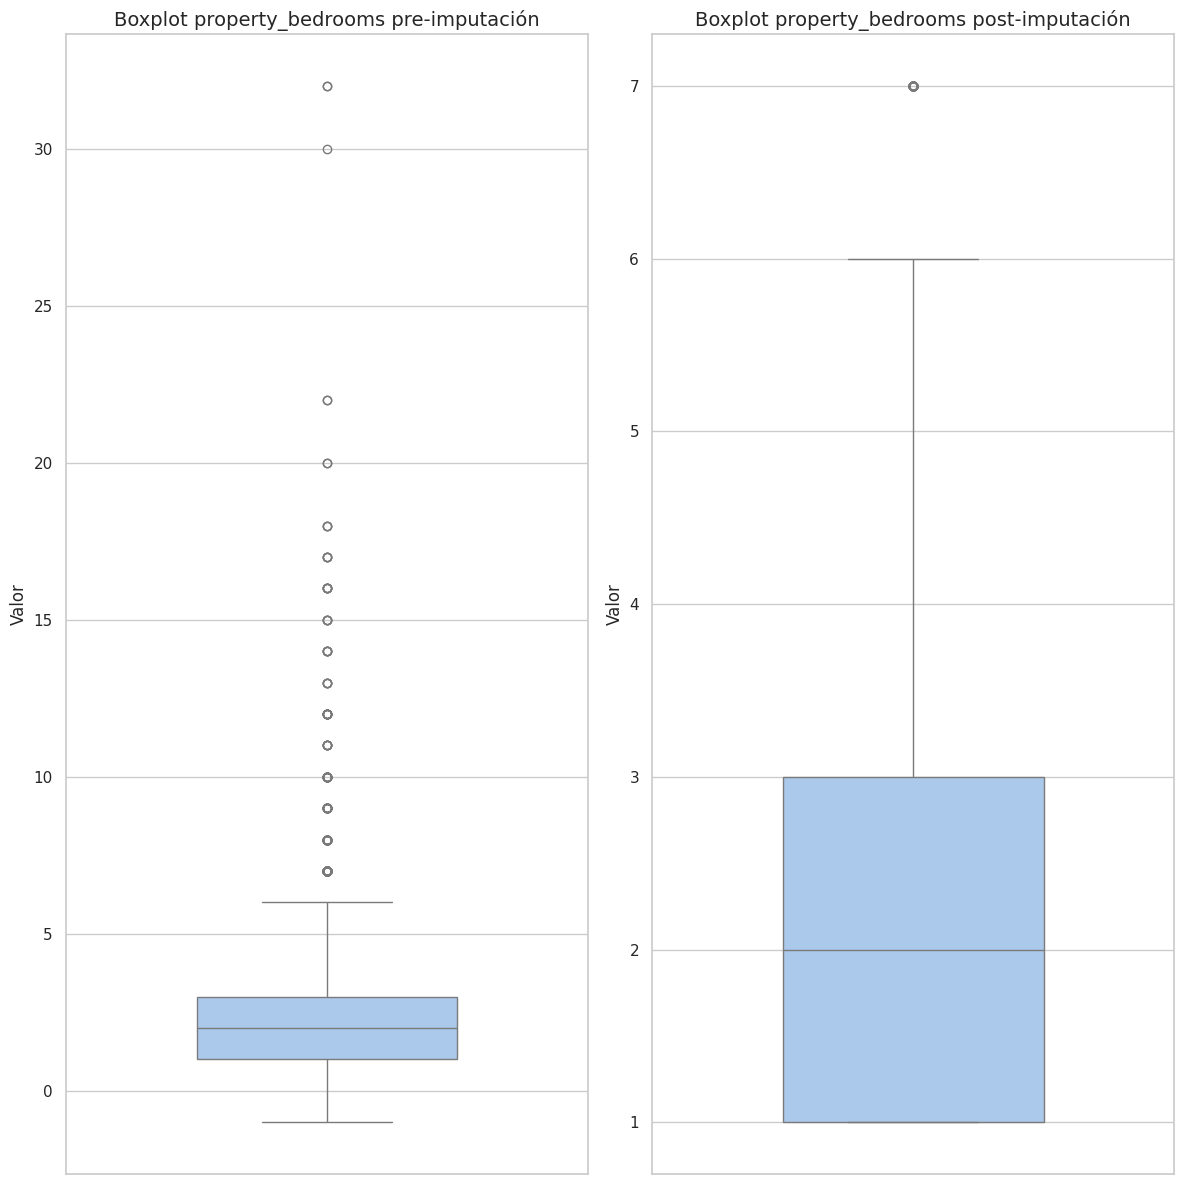

In [534]:
generar_distribucion("property_bedrooms")

Un poco de zoom

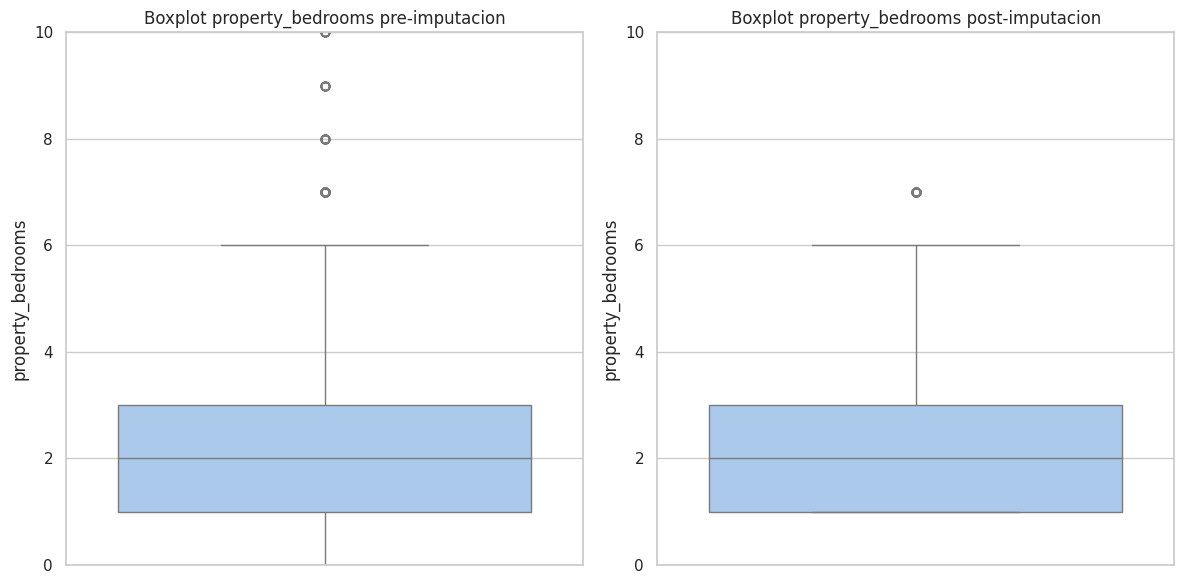

In [535]:
generar_distribucion_zoom("property_bedrooms")

La comparación de los boxplots revela una gran coherencia en la distribución de la variable entre los conjuntos de datos antes y después de la imputación. Aunque se observa una discrepancia leve entre los valores de aproximadamente 20 y 30, esta diferencia es mínima en comparación con la totalidad de los datos. Esto sugiere que las imputaciones se realizaron de manera consistente y dentro de los límites razonables de la variable, sin introducir valores atípicos o extremos.

Vamos a analizar cada property_bedrooms

In [536]:
pre_bedrooms = obtener_cantidad_variables(ds_pre_imputacion,'property_bedrooms')
pre_bedrooms.head()

property_bedrooms  cantidad
0                1.0     25646
1                2.0     21889
2                3.0     14075
3                4.0      3847
4                5.0       708

In [537]:
post_bedrooms = obtener_cantidad_variables(ds_train,'property_bedrooms')
post_bedrooms.head()

property_bedrooms  cantidad
0                1.0     32338
1                2.0     21714
2                3.0     13652
3                4.0      3633
4                5.0       661

Con esto podemos ver la cantidad de imputaciones que se hicieron gracias al método MICE.

In [538]:
comparar_imputacion(pre_bedrooms,post_bedrooms,'property_bedrooms')


6692 registros se imputaron con el valor de 1.0 property_bedrooms
175 registros se imputaron con el valor de 2.0 property_bedrooms
423 registros se imputaron con el valor de 3.0 property_bedrooms
214 registros se imputaron con el valor de 4.0 property_bedrooms
47 registros se imputaron con el valor de 5.0 property_bedrooms
24 registros se imputaron con el valor de 6.0 property_bedrooms
12 registros se imputaron con el valor de 7.0 property_bedrooms


Podemos concluir que la mayoría de los datos nulos en la variable property_bedrooms fueron llenados con la cantidad de un dormitorio

#### Comparación property_rooms

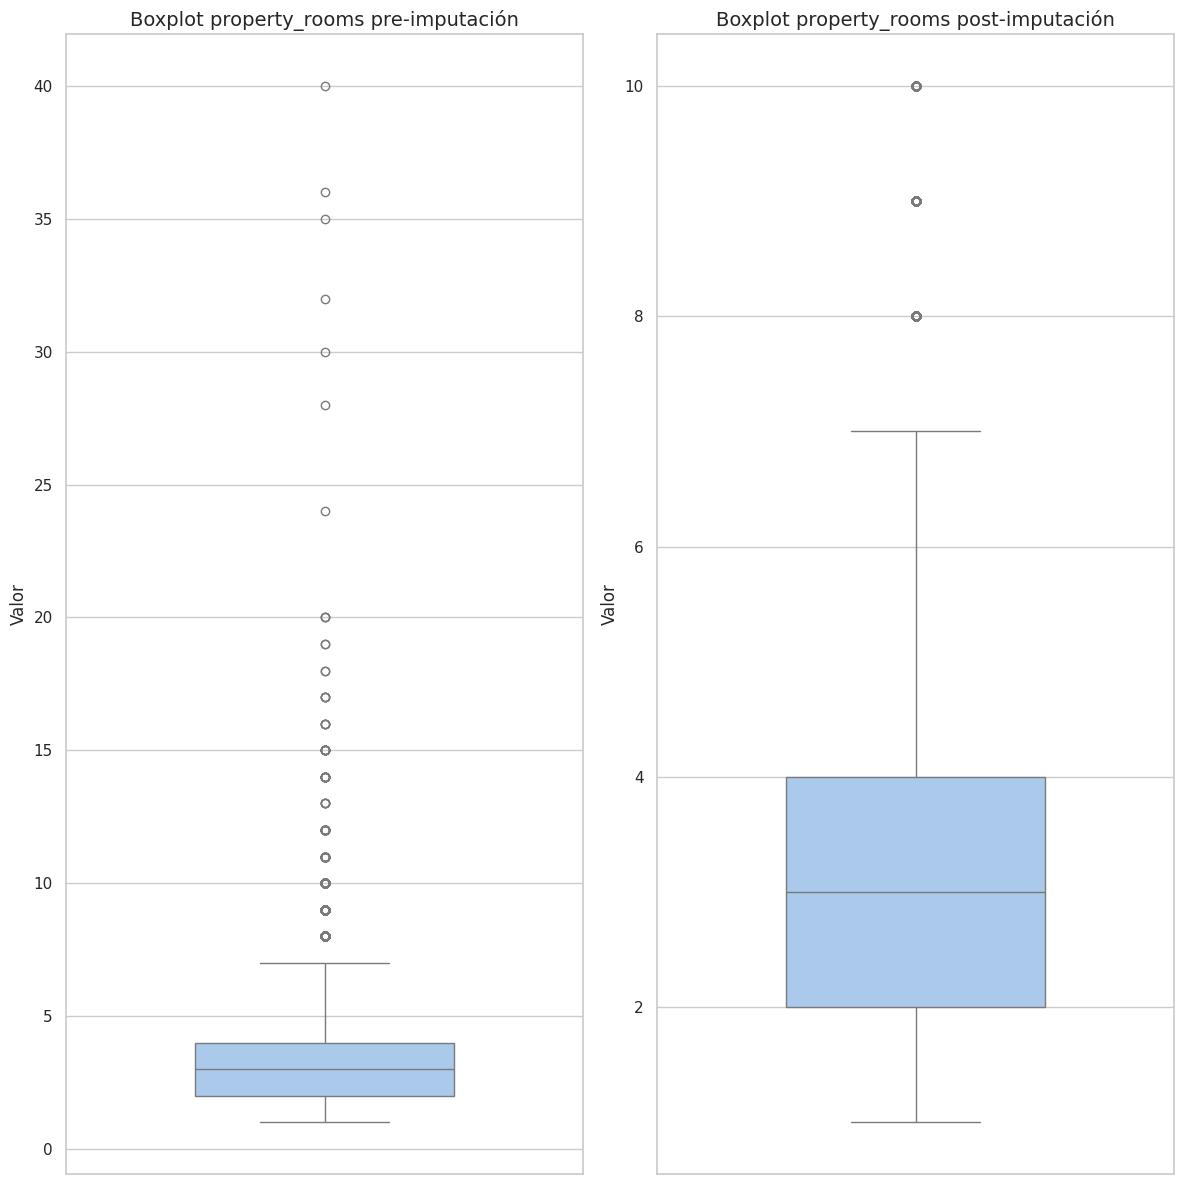

In [539]:
generar_distribucion("property_rooms")

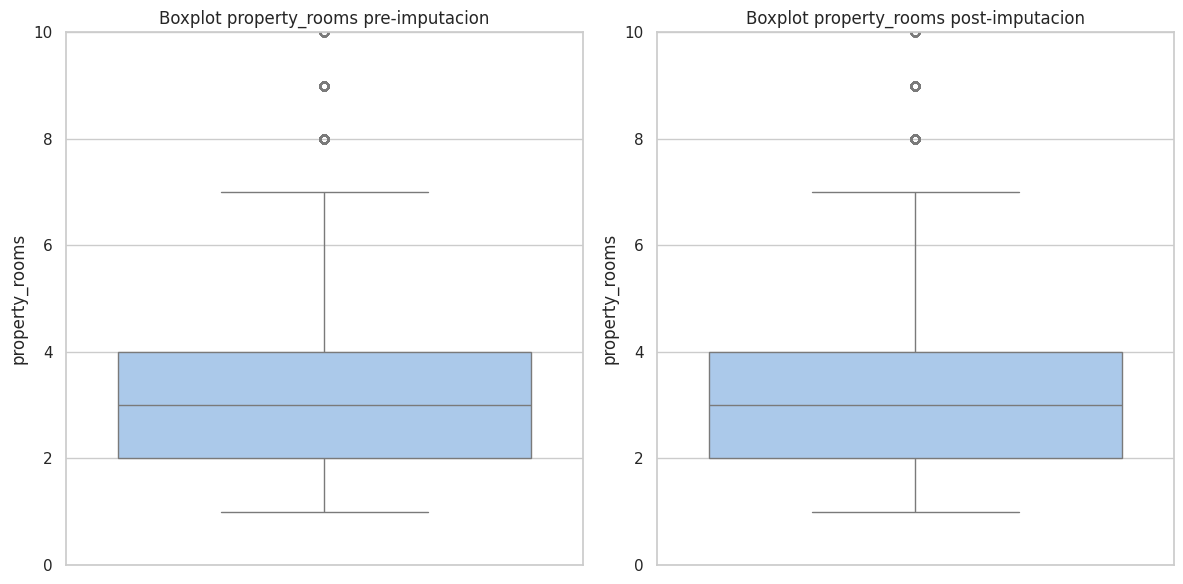

In [540]:
generar_distribucion_zoom("property_rooms")

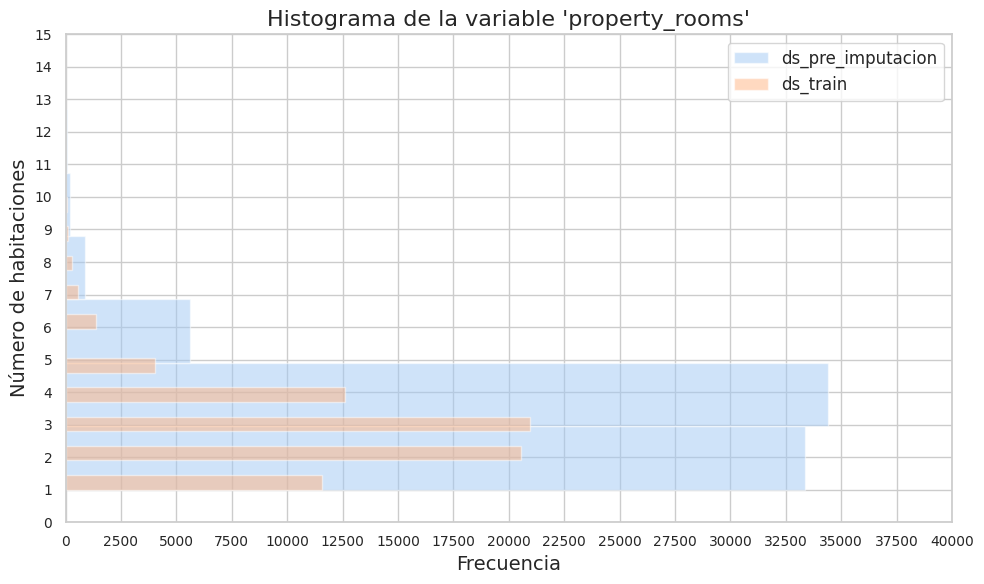

In [541]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Histograma para ds_pre_imputacion en el eje y (invertido)
plt.hist(ds_pre_imputacion['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_pre_imputacion')

# Histograma para ds_train en el eje y (invertido)
plt.hist(ds_train['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_train')

# Ajustes de título y etiquetas
plt.title("Histograma de la variable 'property_rooms'", fontsize=16)
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Número de habitaciones", fontsize=14)

# Ajustes de límites de los ejes (zoom)
plt.ylim(0, 15)
plt.xlim(0, 40000)

# Establecer intervalos del eje x
plt.xticks(np.arange(0, 40001, 2500), fontsize=10)

# Añadir leyenda
plt.legend(fontsize=12)

# Establecer intervalos del eje y
plt.yticks(np.arange(16), fontsize=10)

plt.tight_layout()
plt.show()

<Axes: xlabel='property_rooms'>

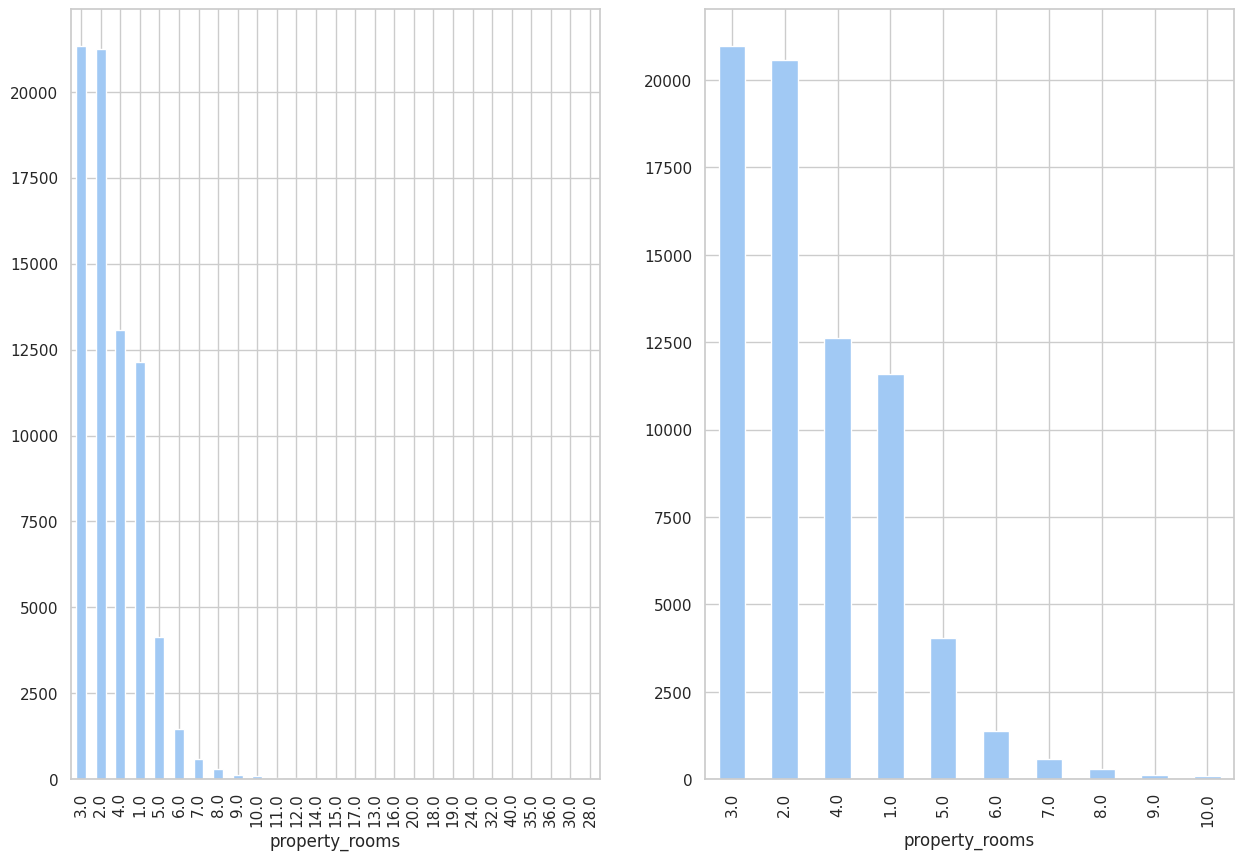

In [542]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
ds_pre_imputacion["property_rooms"].value_counts().plot.bar(ax=axes[0])
ds_train["property_rooms"].round().value_counts().plot.bar(ax=axes[1])

A través de estos gráficos, se observan sutiles discrepancias al asignar la cantidad de habitaciones a la hora de realizar la imputación.

In [543]:
pre_rooms = obtener_cantidad_variables(ds_pre_imputacion,'property_rooms')
pre_rooms.head()

property_rooms  cantidad
0             3.0     21334
1             2.0     21240
2             4.0     13076
3             1.0     12135
4             5.0      4131

In [544]:
post_rooms = obtener_cantidad_variables(ds_train,'property_rooms')
post_rooms.head()

property_rooms  cantidad
0             3.0     20973
1             2.0     20570
2             4.0     12613
3             1.0     11591
4             5.0      4026

In [545]:
comparar_imputacion(pre_rooms,post_rooms,'property_rooms')

361 registros se imputaron con el valor de 3.0 property_rooms
670 registros se imputaron con el valor de 2.0 property_rooms
463 registros se imputaron con el valor de 4.0 property_rooms
544 registros se imputaron con el valor de 1.0 property_rooms
105 registros se imputaron con el valor de 5.0 property_rooms
71 registros se imputaron con el valor de 6.0 property_rooms
4 registros se imputaron con el valor de 7.0 property_rooms
2 registros se imputaron con el valor de 8.0 property_rooms
4 registros se imputaron con el valor de 9.0 property_rooms
4 registros se imputaron con el valor de 10.0 property_rooms


Podemos inferir que la mayoría de los valores faltantes en la variable "property_rooms" fueron sustituidos por la cantidad de dos habitaciones.

#### Comparación property_surface_total

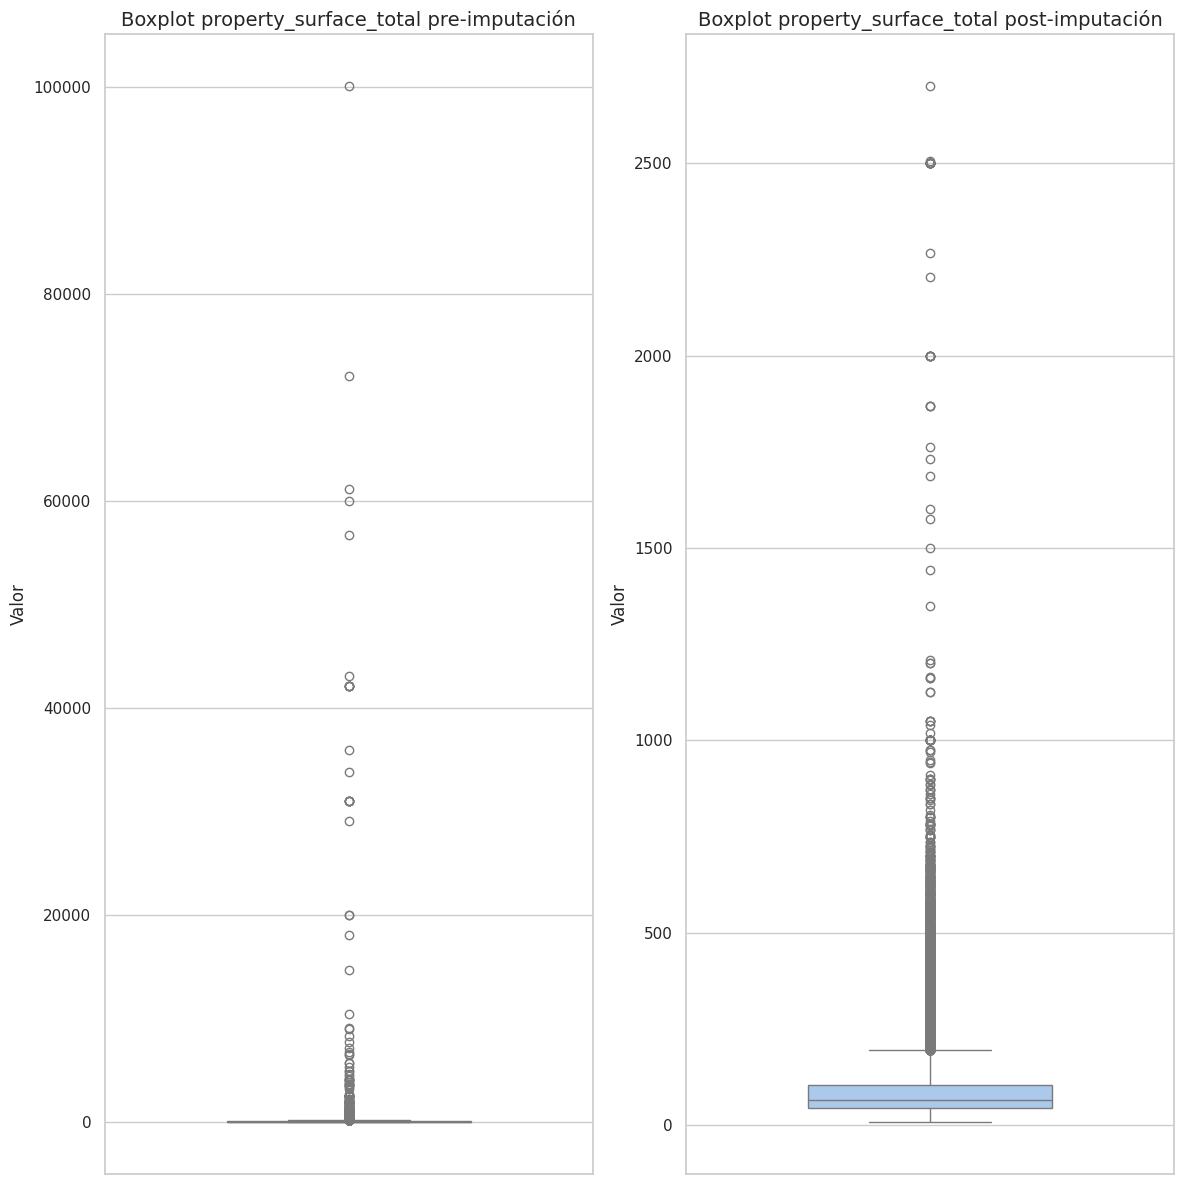

In [546]:
generar_distribucion("property_surface_total")

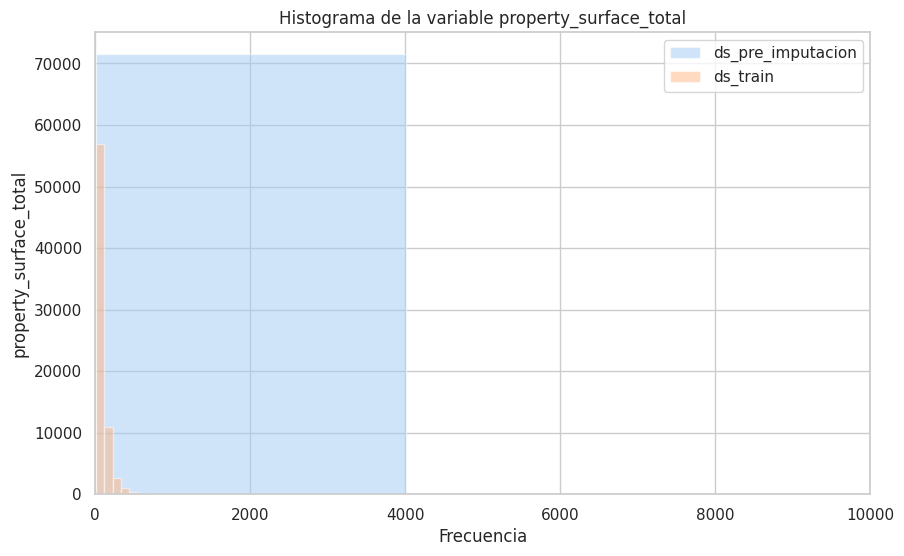

In [547]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_total'], bins=25, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_total'], bins=25, alpha=0.5, label='ds_train')

plt.title("Histograma de la variable property_surface_total")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_total")

plt.xlim(0, 10000)

plt.legend()

plt.show()

Observamos una notable disparidad en la cantidad de datos faltantes antes de la imputación de la variable "superficie total".

In [548]:
pre_total = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_total')
pre_total.head()

property_surface_total  cantidad
0                    50.0      1456
1                    40.0      1392
2                    45.0      1262
3                    42.0      1262
4                    35.0      1216

In [549]:
post_total = obtener_cantidad_variables(ds_train,'property_surface_total')
post_total.head()

property_surface_total  cantidad
0                    50.0      1442
1                    40.0      1404
2                    45.0      1290
3                    42.0      1273
4                    60.0      1197

In [550]:
comparar_imputacion(pre_total,post_total,'property_surface_total')

14 registros se imputaron con el valor de 50.0 property_surface_total
12 registros se imputaron con el valor de 40.0 property_surface_total
28 registros se imputaron con el valor de 45.0 property_surface_total
11 registros se imputaron con el valor de 42.0 property_surface_total
19 registros se imputaron con el valor de 60.0 property_surface_total
33 registros se imputaron con el valor de 35.0 property_surface_total
41 registros se imputaron con el valor de 38.0 property_surface_total
7 registros se imputaron con el valor de 44.0 property_surface_total
5 registros se imputaron con el valor de 43.0 property_surface_total
6 registros se imputaron con el valor de 55.0 property_surface_total
10 registros se imputaron con el valor de 37.0 property_surface_total
27 registros se imputaron con el valor de 47.0 property_surface_total
16 registros se imputaron con el valor de 48.0 property_surface_total
8 registros se imputaron con el valor de 36.0 property_surface_total
14 registros se imputaro

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_total" fueron reemplazados con una superficie total de 49 m²


#### Comparación property_surface_covered

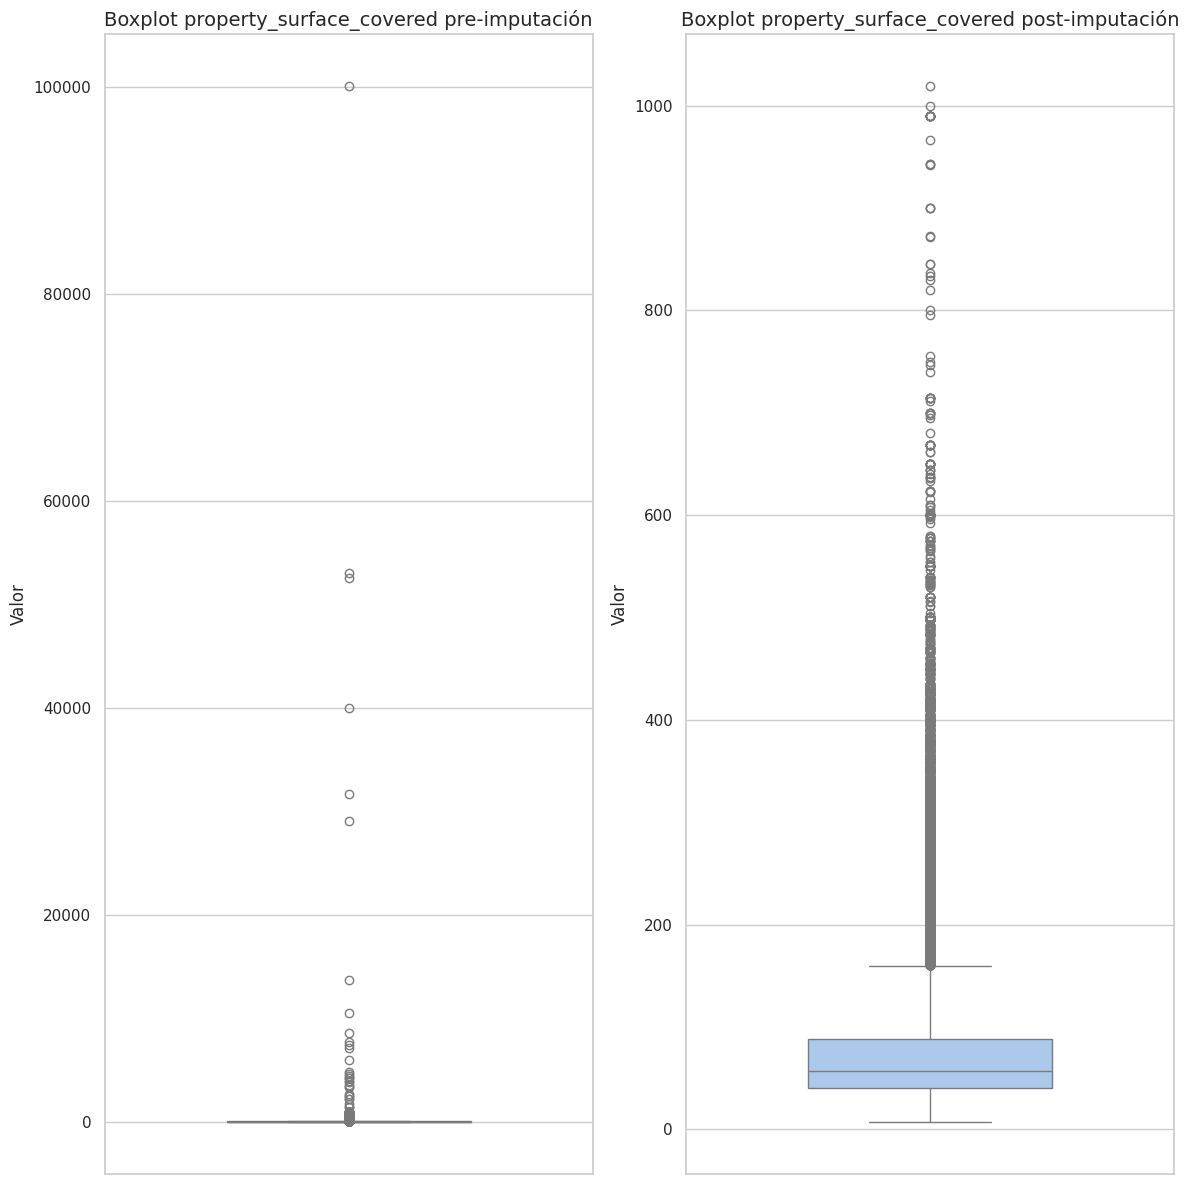

In [551]:
generar_distribucion("property_surface_covered")

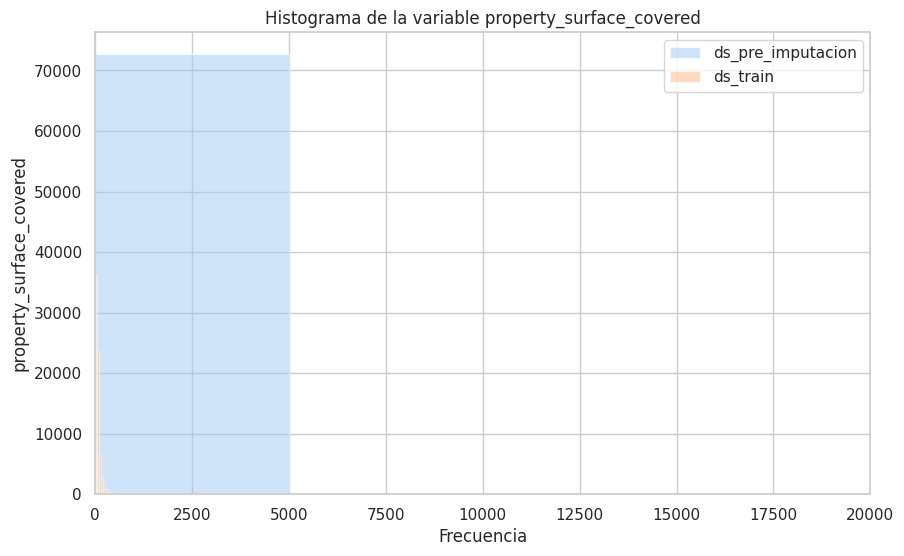

In [552]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_covered'], bins=20, alpha=0.5,  label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_covered'], bins=20, alpha=0.5,  label='ds_train')


plt.title("Histograma de la variable property_surface_covered")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_covered")


plt.xlim(0,20000)

plt.legend()

plt.show()

Se observa una ligera disparidad en los datos faltantes. Se puede inferir que se imputaron pocos datos para la variable "property_surface_covered", ya que esta variable tenía entre los menos valores nulos.

In [553]:
pre_cubierto = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_covered')
pre_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1932
1                      50.0      1606
2                      38.0      1589
3                      45.0      1552
4                      35.0      1479

In [554]:
post_cubierto = obtener_cantidad_variables(ds_train,'property_surface_covered')
post_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1936
1                      50.0      1578
2                      38.0      1542
3                      45.0      1539
4                      42.0      1512

In [555]:
comparar_imputacion(pre_cubierto,post_cubierto,'property_surface_covered')

4 registros se imputaron con el valor de 40.0 property_surface_covered
28 registros se imputaron con el valor de 50.0 property_surface_covered
47 registros se imputaron con el valor de 38.0 property_surface_covered
13 registros se imputaron con el valor de 45.0 property_surface_covered
33 registros se imputaron con el valor de 42.0 property_surface_covered
34 registros se imputaron con el valor de 35.0 property_surface_covered
25 registros se imputaron con el valor de 60.0 property_surface_covered
27 registros se imputaron con el valor de 37.0 property_surface_covered
36 registros se imputaron con el valor de 36.0 property_surface_covered
53 registros se imputaron con el valor de 32.0 property_surface_covered
53 registros se imputaron con el valor de 30.0 property_surface_covered
43 registros se imputaron con el valor de 34.0 property_surface_covered
46 registros se imputaron con el valor de 43.0 property_surface_covered
3 registros se imputaron con el valor de 33.0 property_surface_co

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_covered" fueron completados con una superficie cubierta de 32 m²

#### Comparación latitud

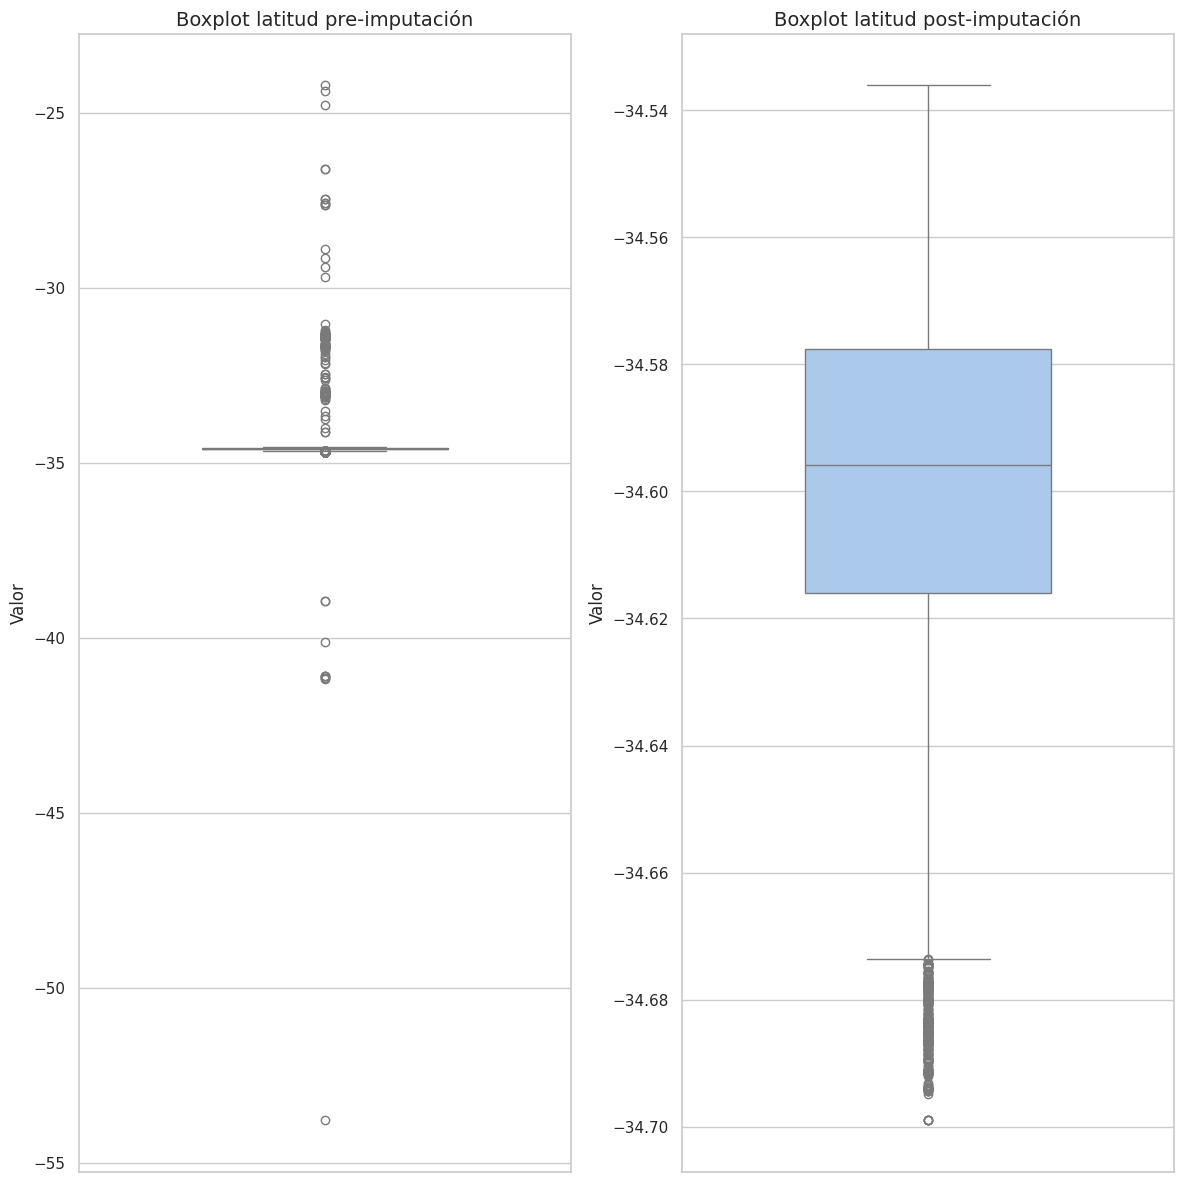

In [556]:
generar_distribucion("latitud")

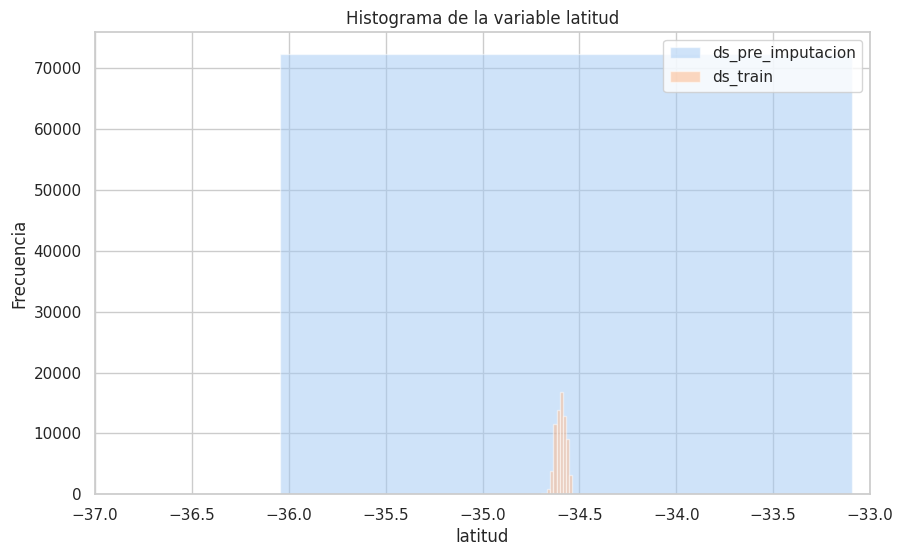

In [557]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['latitud'], bins=10, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['latitud'], bins=10, alpha=0.5, label='ds_train')

plt.xlim(-37, -33)

plt.title("Histograma de la variable latitud")
plt.xlabel("latitud")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

Se puede observar que antes de la imputación, la latitud tenía una frecuencia constante para todos sus valores. Sin embargo, al imputar los datos, la frecuencia varía más, generando una distribución en forma de campana de Gauss. Se destaca que la latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -34.58.

In [558]:
pre_latitud = obtener_cantidad_variables(ds_pre_imputacion,'latitud')
pre_latitud

latitud  cantidad
0     -34.541250       121
1     -34.619406       104
2     -34.604538        87
3     -34.541616        81
4     -34.581910        75
...          ...       ...
39272 -34.545127         1
39273 -34.597353         1
39274 -34.595550         1
39275 -34.628663         1
39276 -34.585732         1

[39277 rows x 2 columns]

In [559]:
post_latitud = obtener_cantidad_variables(ds_train,'latitud')
post_latitud

latitud  cantidad
0     -34.541250       121
1     -34.619406       104
2     -34.604538        87
3     -34.541616        81
4     -34.581910        75
...          ...       ...
39129 -34.595550         1
39130 -34.628663         1
39131 -34.634783         1
39132 -34.599293         1
39133 -34.585732         1

[39134 rows x 2 columns]

Parecieran ser iguales... pero lo hemos imputado

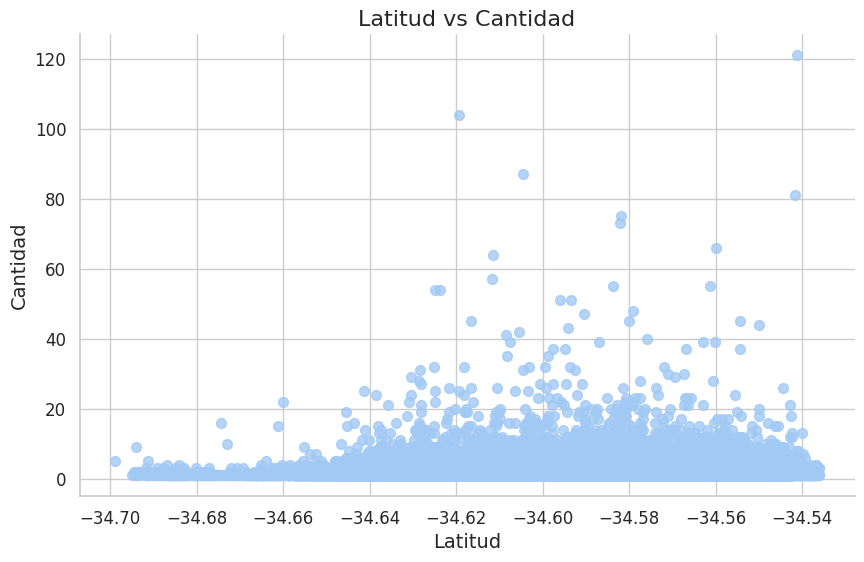

In [560]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_latitud['latitud'], post_latitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Latitud vs Cantidad", fontsize=16)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [561]:
pre_latitud.equals(post_latitud)

False

In [562]:
print(len(pre_latitud))
print(len(post_latitud))
print('diferencia: {}'.format(len(pre_latitud)-len(post_latitud)))

39277
39134
diferencia: 143


#### Comparación longitud

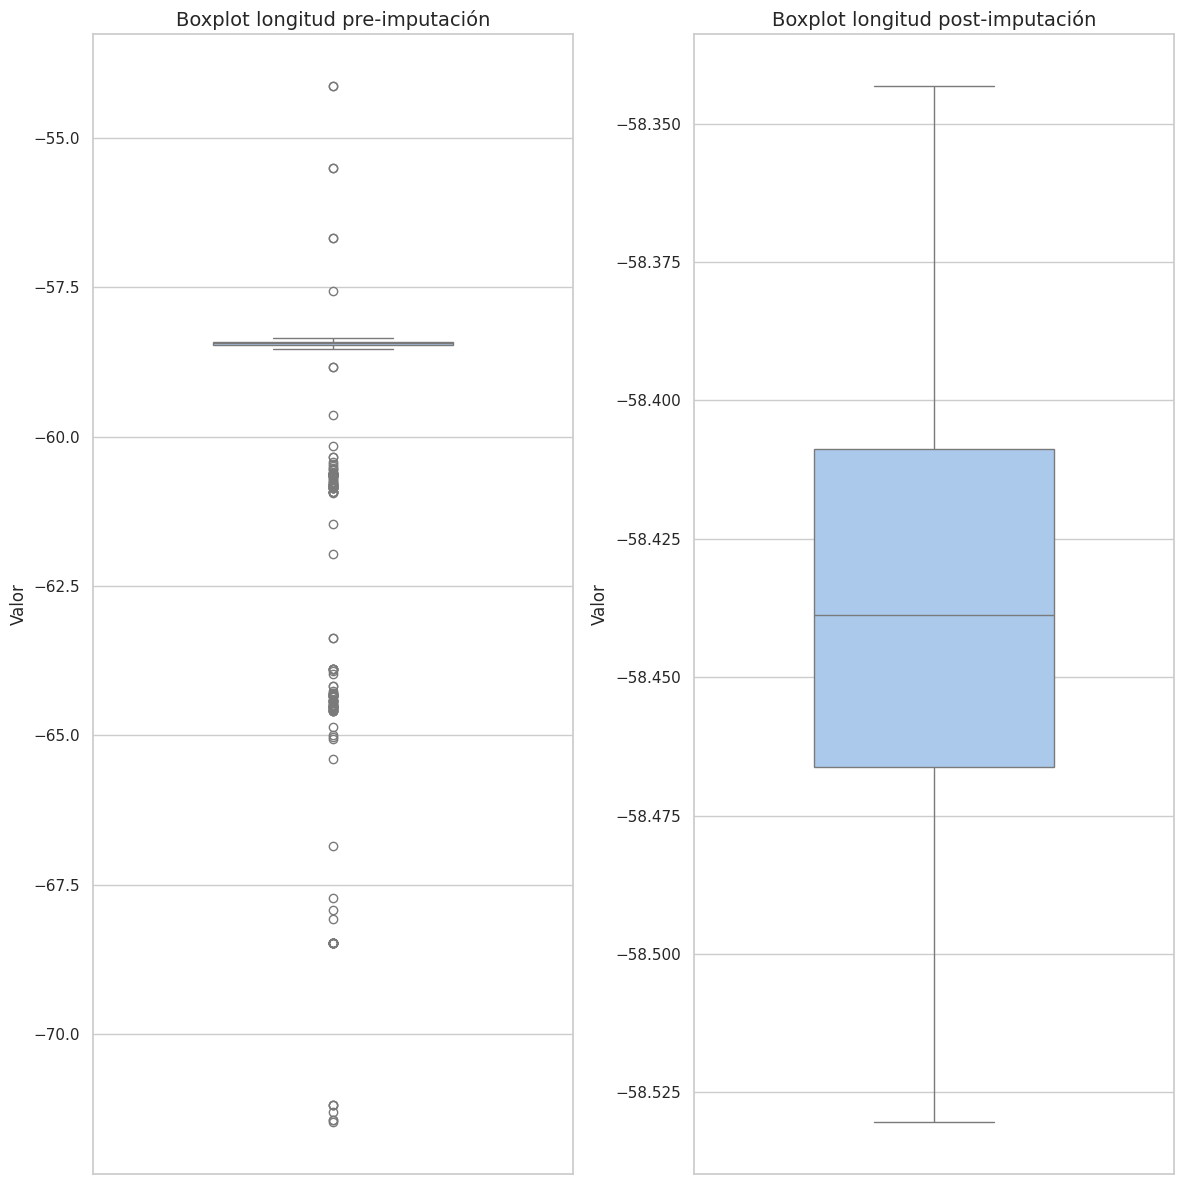

In [563]:
generar_distribucion("longitud")

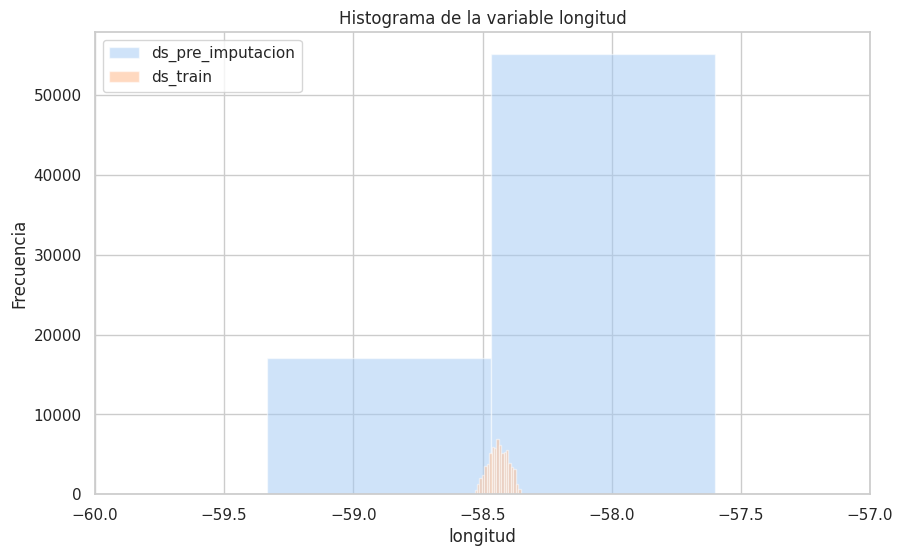

In [564]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['longitud'], bins=20, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['longitud'], bins=20, alpha=0.5, label='ds_train')


plt.title("Histograma de la variable longitud")
plt.xlabel("longitud")
plt.ylabel("Frecuencia")

plt.xlim(-60, -57)

plt.legend()

plt.show()

Todos los valores que se mencionarán en el siguiente párrafo se consideran aproximados.

Antes de la imputación, se observa que la latitud tenía una frecuencia medianamente constante. Desde la latitud -59.5 hasta -58.5, la frecuencia es de aproximadamente 18000, luego aumenta en más de 50000 hasta llegar a la latitud -57.5.

Tras la imputación de los datos, se observa una variación en la frecuencia que genera una distribución en forma de campana de Gauss. La latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -58.400.

In [565]:
pre_longitud = obtener_cantidad_variables(ds_pre_imputacion,'longitud')
pre_longitud.head()

longitud  cantidad
0 -58.472966       121
1 -58.451999       104
2 -58.424956        87
3 -58.473377        81
4 -58.449381        75

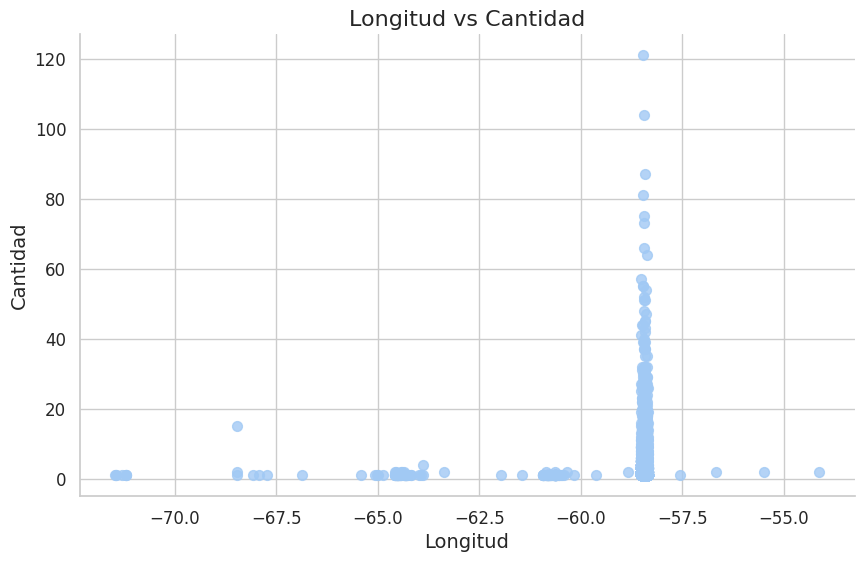

In [566]:
# @title longitud vs cantidad

# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(pre_longitud['longitud'], pre_longitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Longitud vs Cantidad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [567]:
post_longitud = obtener_cantidad_variables(ds_train,'longitud')
post_longitud.head()

longitud  cantidad
0 -58.472966       121
1 -58.451999       104
2 -58.424956        87
3 -58.473377        81
4 -58.449381        75

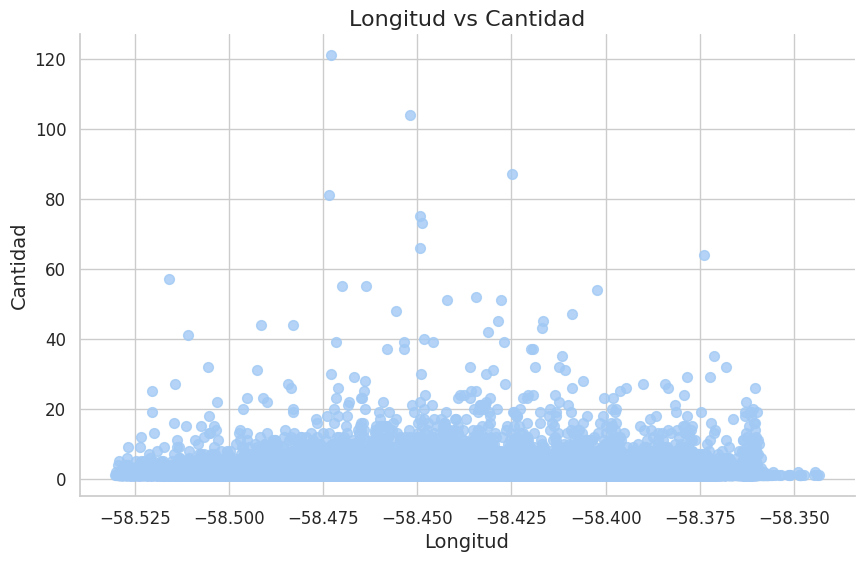

In [568]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_longitud['longitud'], post_longitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Longitud vs Cantidad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [569]:
pre_longitud.equals(post_longitud)

False

In [570]:
print(len(pre_longitud))
print(len(post_longitud))
print('diferencia: {}'.format(len(pre_longitud)-len(post_longitud)))

39099
38956
diferencia: 143


#### Comparación place_l3

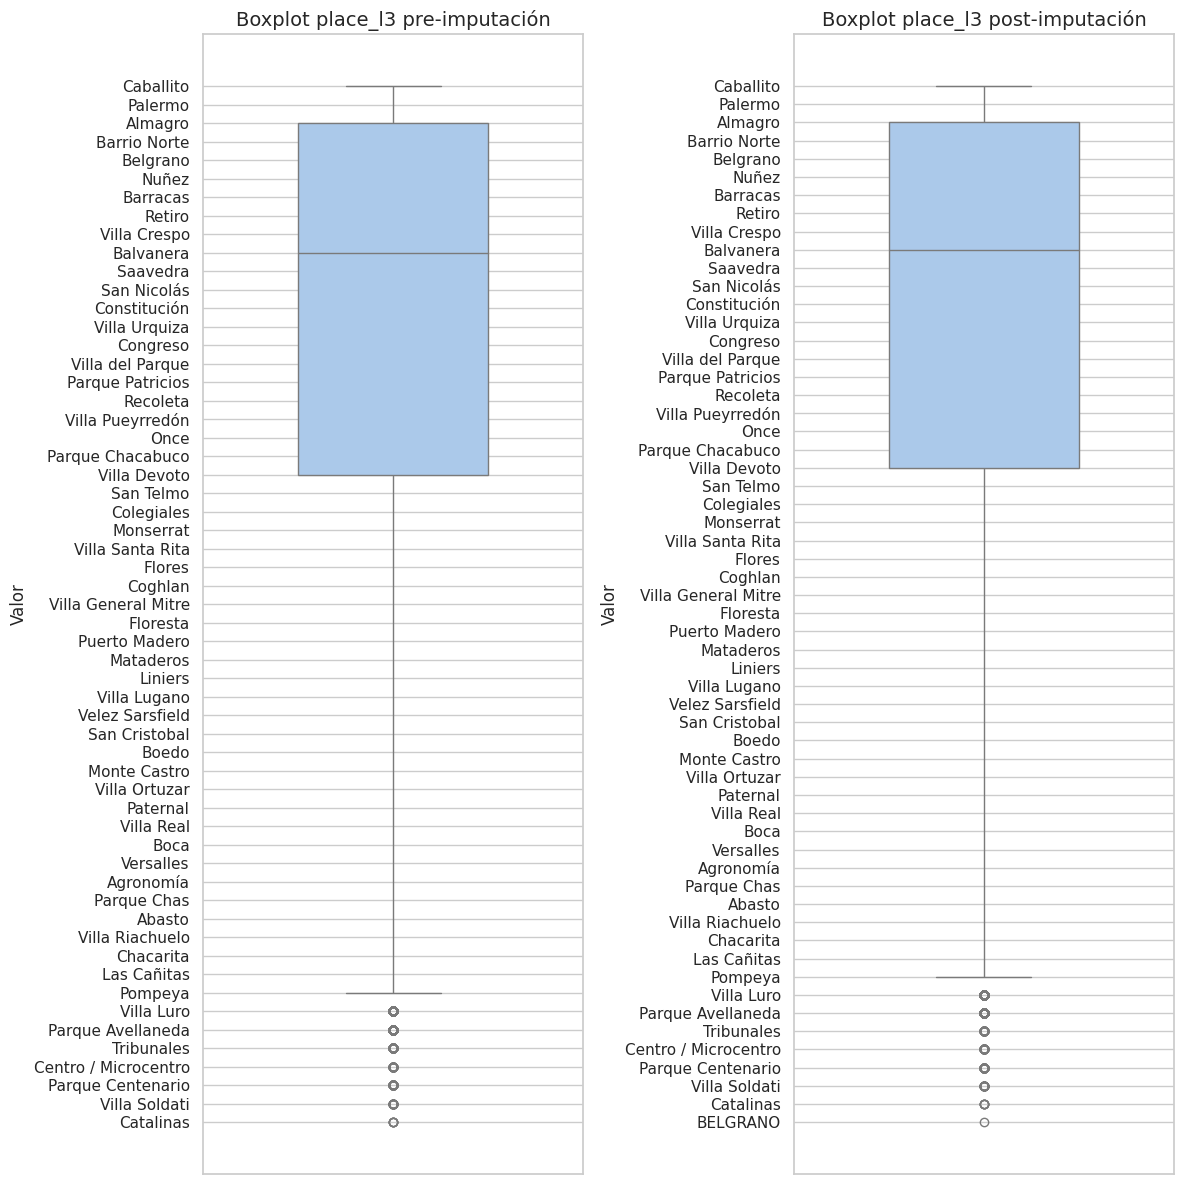

In [571]:
generar_distribucion("place_l3")

Como los datos nulos en la variable place_l3 era de 0.454913. No se observan grandes cambios en el gráfico.
Podemos notar que la media de Balbanera se mantiene, lo mismo con Villa Devoto y Almagro.

In [572]:
pre_barrio = obtener_cantidad_variables(ds_pre_imputacion,'place_l3')
pre_barrio.head()

place_l3  cantidad
0        Palermo     11517
1       Belgrano      7085
2      Caballito      5722
3       Recoleta      5046
4  Villa Urquiza      3709

In [573]:
post_barrio = obtener_cantidad_variables(ds_train,'place_l3')
post_barrio.head()

place_l3  cantidad
0        Palermo     10786
1       Belgrano      6570
2      Caballito      5587
3       Recoleta      4879
4  Villa Urquiza      3585

In [574]:
comparar_imputacion(pre_barrio,post_barrio,'place_l3')

731 registros se imputaron con el valor de Palermo place_l3
515 registros se imputaron con el valor de Belgrano place_l3
135 registros se imputaron con el valor de Caballito place_l3
167 registros se imputaron con el valor de Recoleta place_l3
124 registros se imputaron con el valor de Villa Urquiza place_l3
120 registros se imputaron con el valor de Almagro place_l3
180 registros se imputaron con el valor de Nuñez place_l3
86 registros se imputaron con el valor de Villa Crespo place_l3
86 registros se imputaron con el valor de Flores place_l3
161 registros se imputaron con el valor de Barrio Norte place_l3
62 registros se imputaron con el valor de Balvanera place_l3
9 registros se imputaron con el valor de Colegiales place_l3
6 registros se imputaron con el valor de Villa Devoto place_l3
5 registros se imputaron con el valor de Saavedra place_l3
8 registros se imputaron con el valor de Villa del Parque place_l3
51 registros se imputaron con el valor de Puerto Madero place_l3
65 regist

Podemos concluir que la mayoría de los valores faltantes en la variable "place_l3" fueron completados con el nombre del barrio "Palermo".

## Valores atípicos

### *Prefacio*

Recordando lo visto en la sección de variables cualitativas en Exploración inicial.

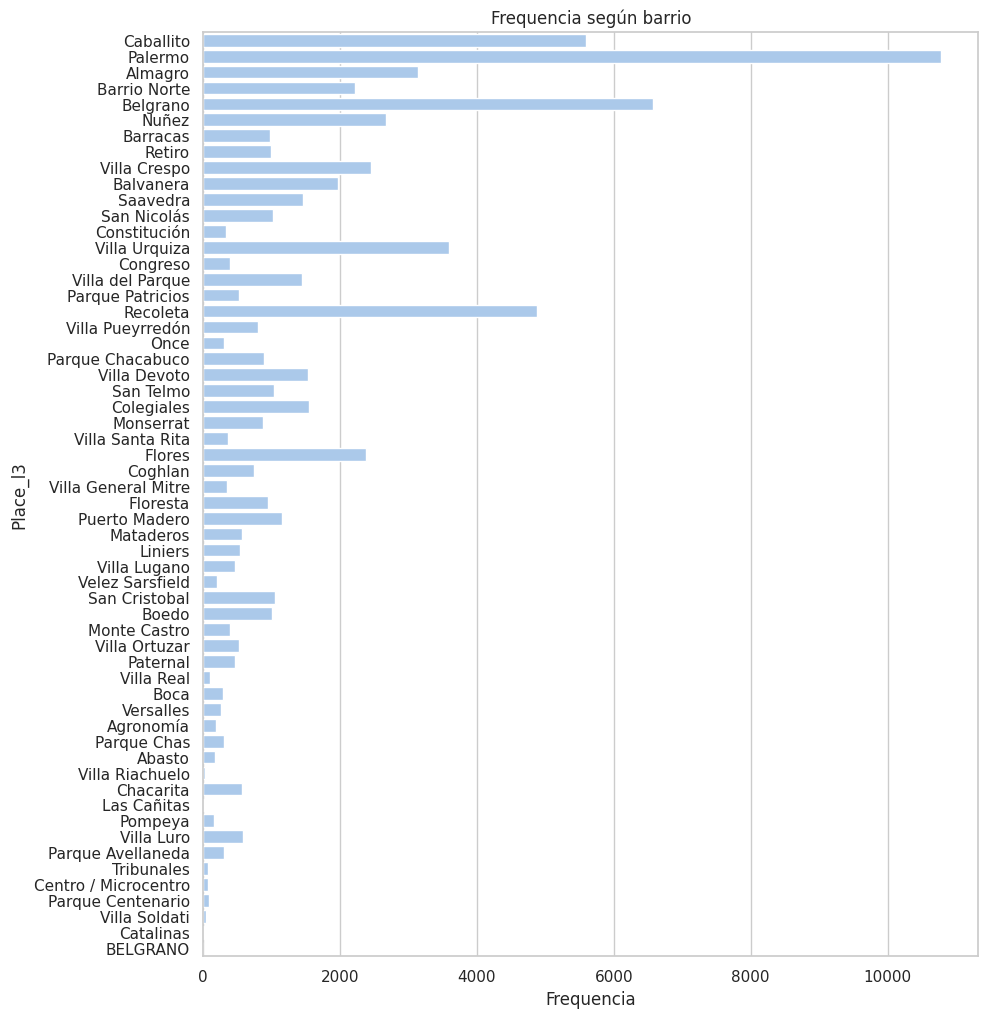

In [136]:
# Hacemos un gráfico de frecuencias de los barrios
plt.figure(figsize=(10, 12))
sns.countplot(y=ds_train.place_l3)
plt.xlabel('Frequencia')
plt.ylabel('Place_l3')
plt.title('Frequencia según barrio')
plt.show()

Las Cañitas, Catalinas, San Nicolas tienen una representación nula/casi nula.
Villa Soldati, Microcentro, Parque Centenario, Villa Riachuelo, Tribunales tienen una representación tan pequeña que tenemos que tener en cuenta que los registros pueden ser casos aislados/no representativos de la realidad de las ventas de inmuebles en el barrio.

In [137]:
# Hacemos una copia del dataset hasta el momento
ds_atipicos = ds_train.copy()

Funciones auxiliares para el análisis:



In [138]:
#Función para cálculo de limite superior e inferior de outliers según cuartiles
def limite_rango_iq(df, variable):
  # Cuartiles
  Q1 = np.quantile(df[variable], 0.25)
  Q3 = np.quantile(df[variable], 0.75)

  # Rango intercuartil
  IQR = Q3 - Q1

  # Limite inferior Outliers
  out_inf = Q1 - 1.5 * IQR

  # Limite superior Outliers
  out_sup = Q1 + 1.5 * IQR

  return out_inf, out_sup

# Funcion para cálculo de Z Score normal
def calculo_z_score(serie):
  media = np.mean(serie)
  std = np.std(serie)
  return (serie - media) / std

#Función para calculo de Z Score modificado
def calculo_z_mod(serie):
  median = np.median(serie)
  MAD = np.median(np.absolute(serie - median))
  return (serie - median) * 0.6745 / MAD

# Grafico comparativo
def plot_comparativo(df_antes, df_despues, var):

  # Create subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  # Plot for df_antes
  sns.boxplot(y=df_antes[var], ax=axs[0])
  axs[0].set_title('Antes')

  # Plot for df_despues
  sns.boxplot(y=df_despues[var], ax=axs[1])
  axs[1].set_title('Después')

  # Show plots
  plt.tight_layout()
  plt.show()
  return

# Boxplot por barrio de la variable a evaluar
def plot_por_barrio(df, var):
  # Lista de barrios
  barrios = ['Coghlan','Colegiales','Abasto','Nuñez','Constitución',
             'Boedo', 'San Nicolás', 'Retiro', 'Liniers', 'Almagro',
             'Boca', 'Palermo', 'Balvanera','Barracas', 'Caballito',
             'Villa Ortuzar', 'Villa Luro', 'Puerto Madero', 'Pompeya', 'Saavedra',
             'Parque Chacabuco', 'Belgrano', 'Recoleta', 'Floresta', 'Monserrat',
             'Villa del Parque', 'San Telmo', 'Villa Crespo', 'Tribunales', 'Once',
             'Barrio Norte', 'Villa Lugano', 'Congreso', 'Villa Urquiza', 'Mataderos',
             'Villa Devoto', 'Recoleta', 'San Cristobal', 'Villa Pueyrredon', 'Congreso']

  # Subplots
  fig, axs = plt.subplots(8, 5, figsize=(16, 24))
  axs = axs.flatten()

  for i, barrio in enumerate(barrios):
      filtered_data = df[df['place_l3'] == barrio]

      sns.boxplot(y=filtered_data[var], ax=axs[i])

      axs[i].set_title(f'{var} en {barrio}')

  # Adjust layout
  plt.tight_layout()
  # Show the plot
  plt.show()
  return



### Análisis univariado

Vamos a intentar identificar los outliers univariados utilizando los IQR y el Z Score.

*Análisis según cantidad de habitaciones(property_bedrooms)*

<Axes: ylabel='property_bedrooms'>

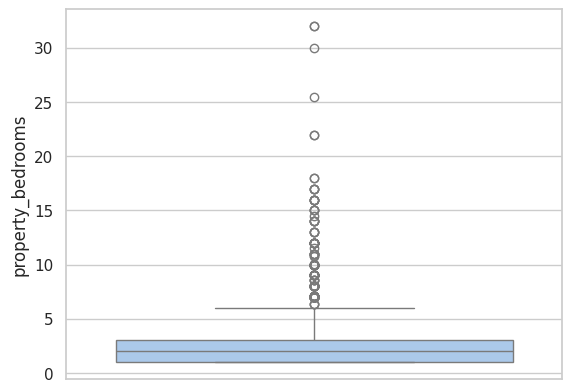

In [139]:
sns.boxplot(y=ds_train.property_bedrooms)

In [140]:
limite_rango_iq(ds_train, 'property_bedrooms')

(-2.0, 4.0)

Primero analizamos el outlier más notorio y verificamos si es un valor posible.

In [141]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 40]
outlier

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

Es un departamento de 3 ambientes con 70 habitaciones, lo cual no es posible. Tampoco podemos asumir que es un error de tipeo. A su vez, la superficie total es exagerada en comparación de la superficie cubierta y el precio de la propiedad.  Vamos a eliminar el outlier y visualizar nuevamente el código.  

<ipython-input-142-a0f165733f40>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: ylabel='property_bedrooms'>

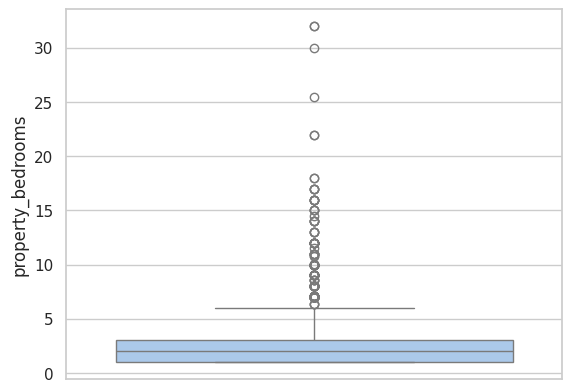

In [142]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_bedrooms'] > 40].index
ds_train.drop(id_outlier,inplace=True)

# Visualizamos
sns.boxplot(y=ds_train.property_bedrooms)

Existen muchos valores atípicos por sobre el umbral marcado por los cuartiles, pero teniendo en cuenta que estamos trabajando con casas, PH y departamentos unicamente, revisaremos las anomalías mayores a 15, a partir de donde no hay muchas ocurrencias.



In [143]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 15]
outlier

id  start_date    end_date created_on  \
366101  8o3ZwoXgOddHoex/irib7g==  2021-04-10  2021-06-05 2021-04-10   
402448  9OrT+9jZlW4rMGyZYsmNPA==  2021-09-07  2022-02-09 2021-09-07   
292167  CxZv3EmTnK+m6EJD2uQ5fw==  2021-02-23  2021-03-03 2021-02-23   
140832  2aHER3AXQs3zb3EegLhmgg==  2021-12-08  2022-01-27 2021-12-08   
90004   TEs1aRnhJPwR0jRMq/Vzdg==  2021-08-03  9999-12-31 2021-08-03   
362676  Gj3g5KCtRbYcwZIuh/wJGg==  2021-01-16  2021-08-06 2021-01-16   
48279   r3sXlEIiCgBG5TtUkN93mw==  2021-03-14  2021-06-05 2021-03-14   
150885  X3WGOe/PrGS1u+xozM5elA==  2021-03-24  2021-06-05 2021-03-24   
354668  +SPkA/Y4DHEHf+HIppYFKg==  2021-03-31  2021-04-16 2021-03-31   
307211  uqM9/WXFJkEJnXEQefcpRQ==  2021-09-19  2021-09-19 2021-09-19   
332857  760pAR/aW7whZAZRLML/ZA==  2021-09-17  2022-02-25 2021-09-17   
346602  yzI9zylc11wllHX16av6jA==  2021-09-30  2021-11-02 2021-09-30   
86014   pVG9sES9De/1eQ+tB90NjQ==  2021-03-26  2021-06-05 2021-03-26   
115403  VuF9cBcZ03aoEcEWAsWGjA==  2021-12-07  2022-01-27 2021-12-07   
362696  KuzGWi8jCNPL9nvKAUqLKw==  2021-01-16  2021-08-06 2021-01-16   
389282  +xTrflFUv4fEGjwpwhP68w==  2021-05-05  2021-06-05 2021-05-05   
32758   KA441xdi8PtuWBvjcAbGOQ==  2021-02-08  2021-03-01 2021-02-08   
285222  WHu8kgA8Vu692UM8Dz3gnA==  2021-02-24  2022-02-09 2021-02-24   

          latitud   longitud          place_l3 property_type  property_rooms  \
366101 -34.648922 -58.380522          Barracas          Casa            18.0   
402448 -34.611413 -58.389221         Monserrat          Casa            17.0   
292167 -34.616487 -58.371596         San Telmo            PH            24.0   
140832 -34.588454 -58.385257          Recoleta  Departamento             5.0   
90004  -34.633236 -58.480313          Floresta            PH            32.0   
362676 -34.618485 -58.377993         San Telmo          Casa            16.0   
48279  -34.608645 -58.485619  Villa del Parque  Departamento             4.0   
150885 -34.642037 -58.438995  Parque Chacabuco  Departamento            35.0   
354668 -34.611905 -58.382384         Monserrat            PH            15.0   
307211 -34.611905 -58.382384         Monserrat            PH            15.0   
332857 -34.611905 -58.382384         Monserrat  Departamento            18.0   
346602 -34.632537 -58.360577              Boca  Departamento            19.0   
86014  -34.591110 -58.400685          Recoleta  Departamento             4.0   
115403 -34.598070 -58.444686      Villa Crespo            PH            17.0   
362696 -34.618485 -58.377993         San Telmo  Departamento            16.0   
389282 -34.570959 -58.458106          Belgrano          Casa            28.0   
32758  -34.632698 -58.360514              Boca            PH            19.0   
285222 -34.638432 -58.369712          Barracas            PH            20.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
366101          17.000000              515.000000                     515.0   
402448          16.000000              585.000000                     458.0   
292167          22.000000              800.000000                     650.0   
140832          22.000000              472.904306                     144.0   
90004           32.000000              535.000000                     435.0   
362676          16.000000             1163.246354                     943.0   
48279           32.000000               83.000000                      75.0   
150885          25.432334               37.000000                      33.0   
354668          16.000000              587.000000                     276.0   
307211          16.000000              587.000000                     276.0   
332857          17.000000              554.000000                     334.0   
346602          18.000000              372.000000                     318.0   
86014           30.000000              148.000000                     138.0   
115403          17.000000              689.000000    

Tenemos 230 anomalías. Los casos donde el número de ambientes es razonable, parece error de tipeo. Lo corregimos

In [144]:
condition = (ds_train['property_bedrooms'] > 15) & (ds_train['property_rooms'] < 10)
ds_train.loc[condition, 'property_surface_covered'] /= 10

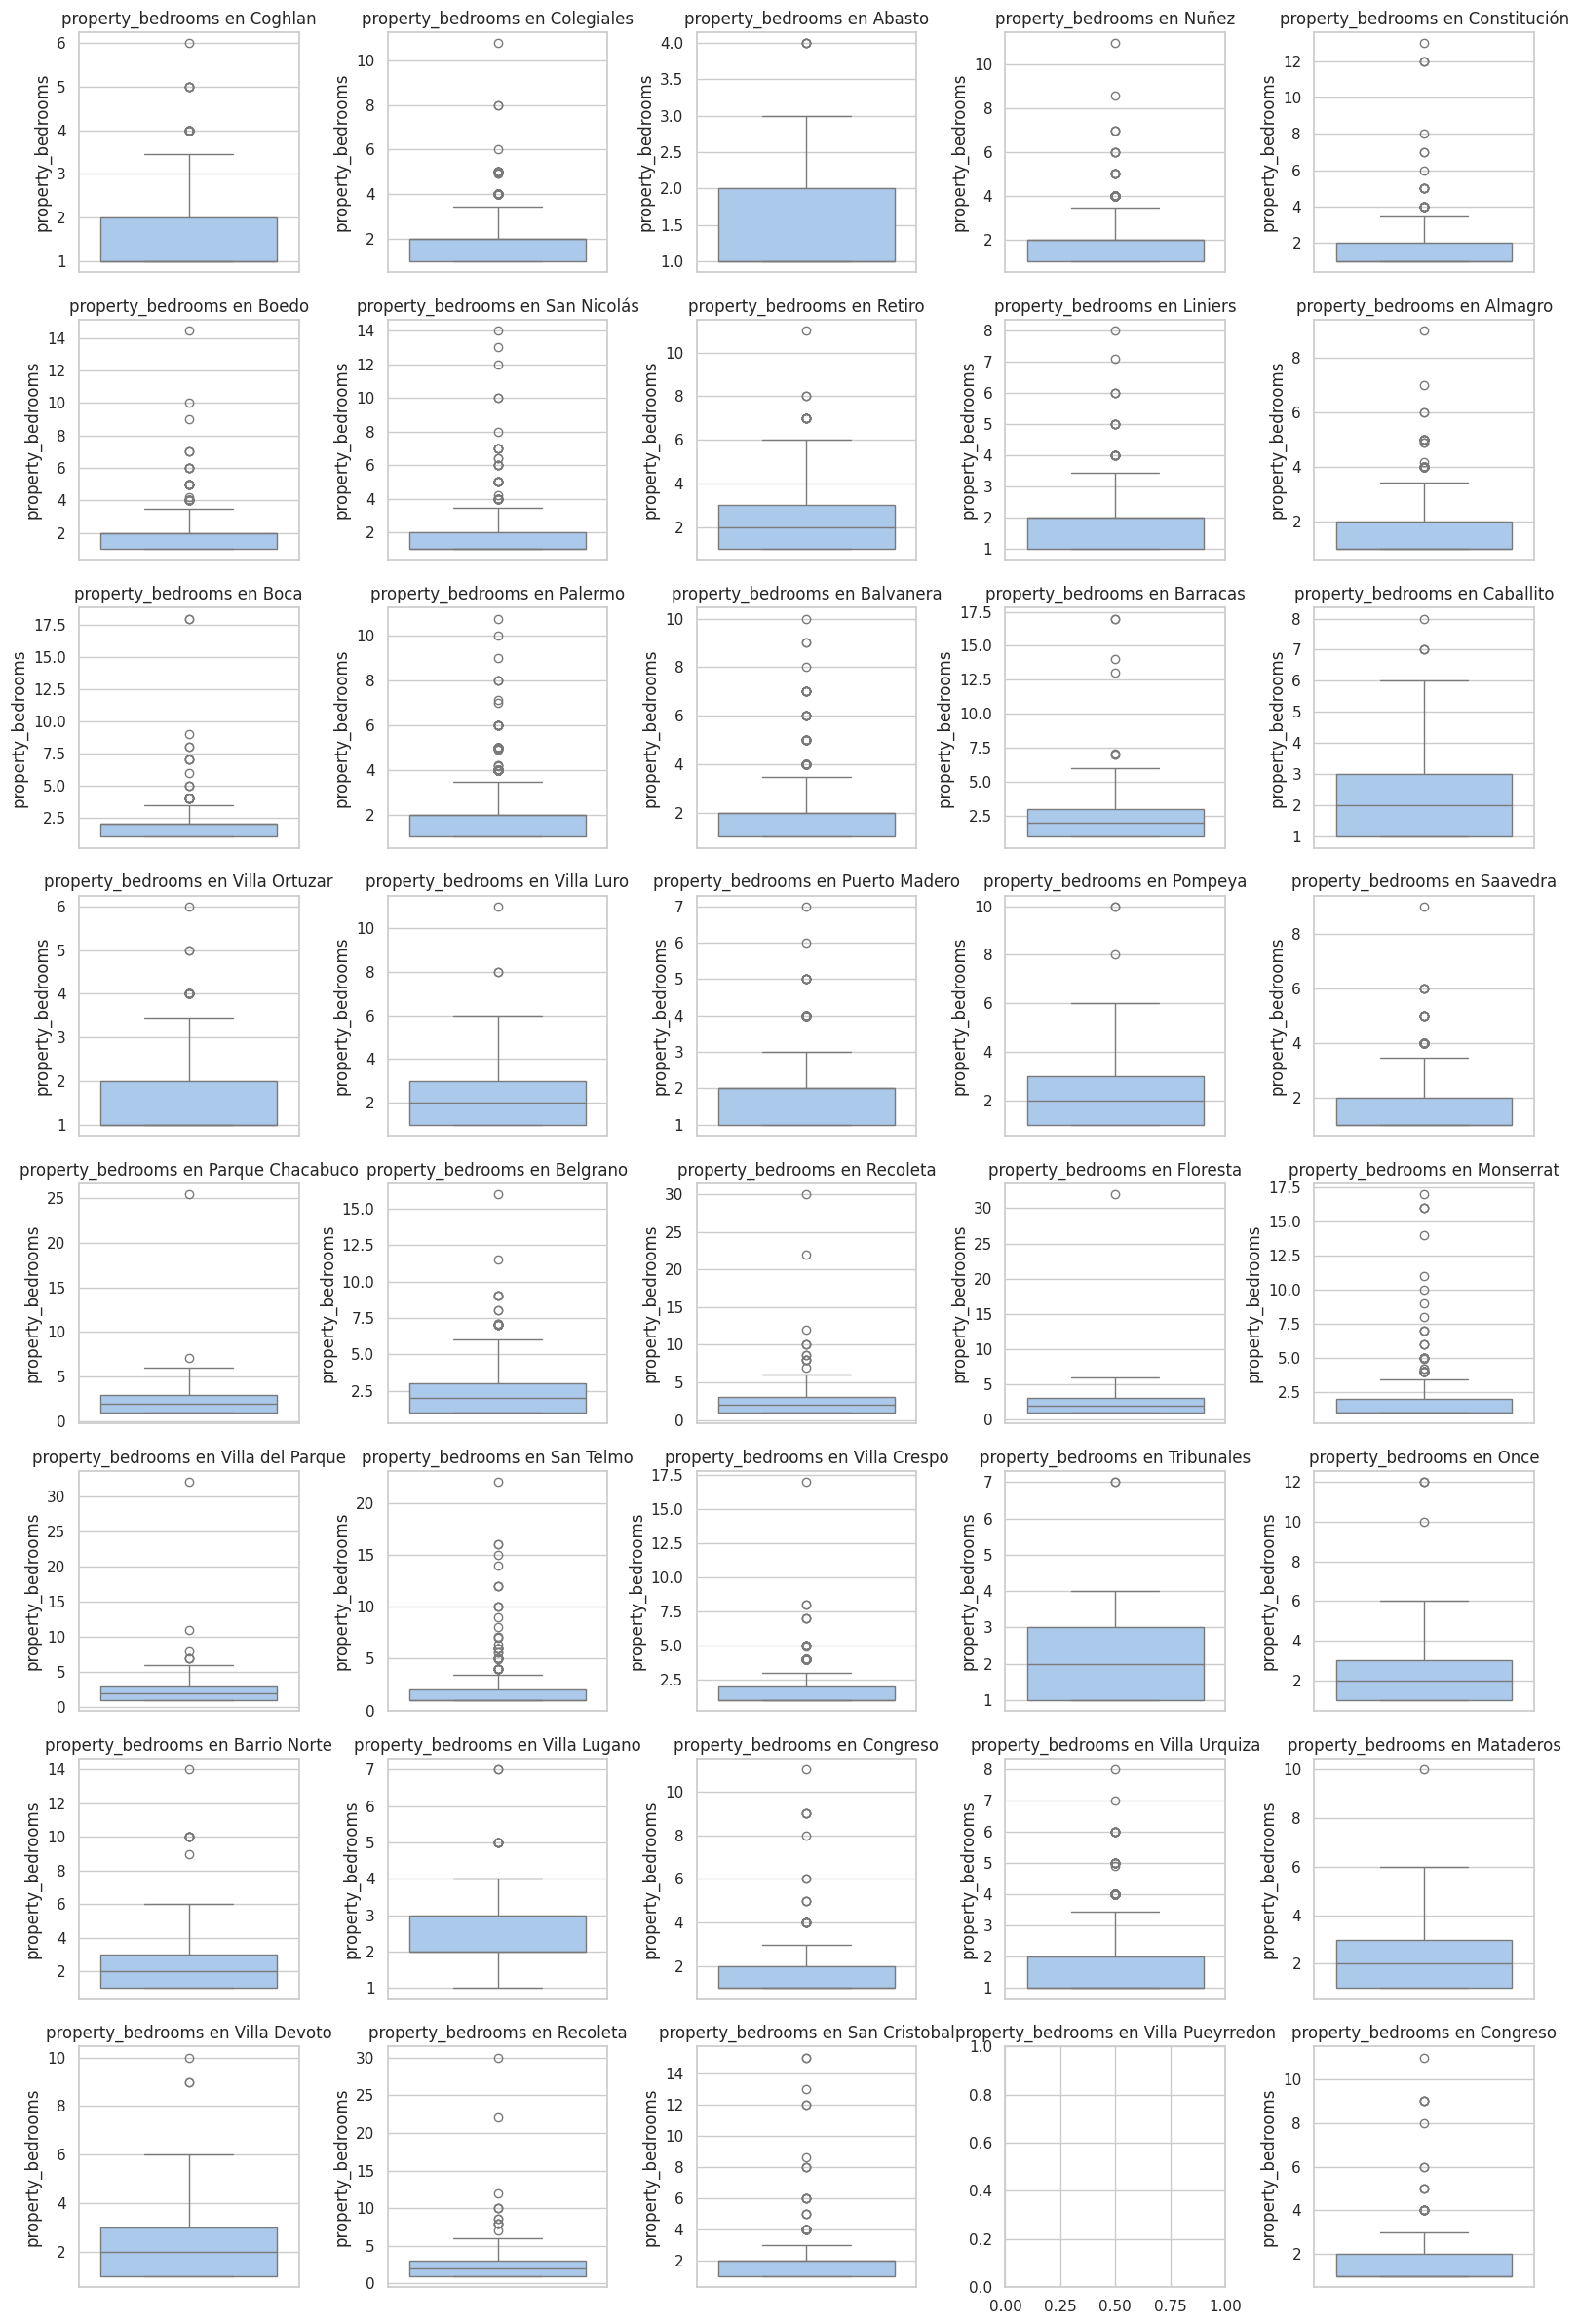

In [145]:
plot_por_barrio(ds_train, 'property_bedrooms')

Analizando los boxplot de la cantidad de habitaciones pero dividido según el barrio en el que se encuentra la propiedad, podemos ver aún teniendo en cuenta las variaciones, que aquellos casos de casas con más de 8 habitaciones son outliers extremos y decidimos normalizarlas utilizando una transformación logaritmica.

Nota: el limite intercuartil en general para la zona de CABA era 4, pero como vemos en barrios como Caballito esto se encuentra totalmente dentro de la norma.

In [146]:
ds_train.loc[ds_train['property_bedrooms'] > 7.0, 'property_bedrooms'] = np.log(ds_train['property_bedrooms'])

In [147]:
ds_train[ds_train['property_bedrooms'] > 6]

id  start_date    end_date created_on  \
75701   4Cax7nQ+g6aCneYMhuFJKQ==  2021-04-08  2021-04-09 2021-04-08   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
274397  buoXoZjmTPkeXpf7Pn6syw==  2021-09-15  2021-10-07 2021-09-15   
352428  Yk5CRCwqLTNCzIiyKwuSyA==  2021-06-25  2021-08-10 2021-06-25   
351371  +1PYEdKr4JtxeylQ6qCwtw==  2021-06-25  2021-06-30 2021-06-25   
...                          ...         ...         ...        ...   
420396  O8oyYGBUdY3jPaEa1NK6Xg==  2021-12-01  2021-12-30 2021-12-01   
421589  S9r34tSB8+FE5vkjVO4w+Q==  2021-07-07  2021-08-03 2021-07-07   
457064  rWpwKlxzNHvQYcrs+sBijQ==  2021-05-08  2021-05-20 2021-05-08   
6871    FQeAbzRt++H2i0sij+/h7g==  2021-02-09  2021-02-11 2021-02-09   
342818  mqoxNDn8Gn/UkxbHPo7iOA==  2021-08-11  2021-09-01 2021-08-11   

          latitud   longitud           place_l3 property_type  property_rooms  \
75701  -34.621988 -58.382205       Constitución          Casa       11.000000   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
274397 -34.593316 -58.377201             Retiro  Departamento        9.000000   
352428 -34.593316 -58.377201             Retiro  Departamento        9.000000   
351371 -34.625901 -58.465396             Flores            PH       10.000000   
...           ...        ...                ...           ...             ...   
420396 -34.593316 -58.377201             Retiro  Departamento        9.000000   
421589 -34.604969 -58.478785   Villa del Parque          Casa        8.892720   
457064 -34.572554 -58.469842           Belgrano          Casa        8.000000   
6871   -34.633226 -58.376409           Barracas          Casa        8.894634   
342818 -34.616128 -58.394715          Balvanera          Casa        8.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
75701                 7.0              280.166005                     212.0   
387679                7.0              250.000000                     250.0   
274397                7.0              380.000000                     350.0   
352428                7.0              380.000000                     350.0   
351371                7.0              385.000000                     231.0   
...                   ...                     ...                       ...   
420396                7.0              380.000000                     350.0   
421589                7.0              440.000000                     235.0   
457064                7.0              400.000000                     400.0   
6871                  7.0              346.288932                     265.0   
342818                7.0              164.000000                     143.0   

        property_price  
75701         240000.0  
387679        212000.0  
274397        650000.0  
352428        650000.0  
351371        245000.0  
...                ...  
420396        650000.0  
421589        260000.0  
457064        920000.0  
6871          350000.0  
342818        230000.0  

[82 rows x 13 columns]

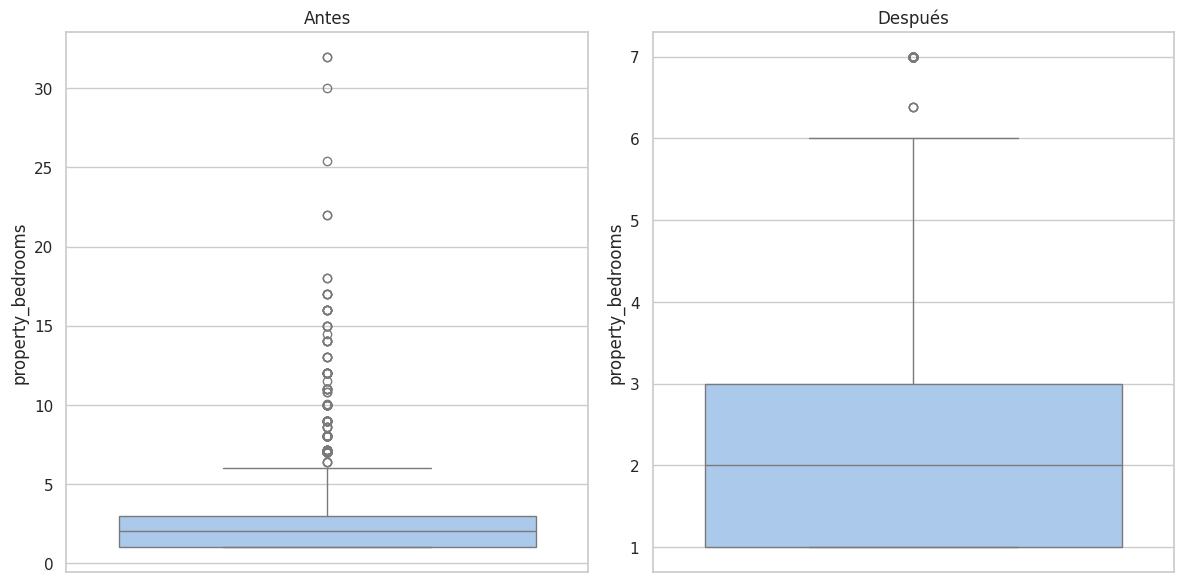

In [148]:
plot_comparativo(ds_atipicos, ds_train, 'property_bedrooms')

Podemos ver que se han solucionado la mayoría de las anomalías. Dejaremos las restantes (84 registros) para el análisis multivariado.

*Análisis según cantidad de ambientes (property_rooms)*

<Axes: ylabel='property_rooms'>

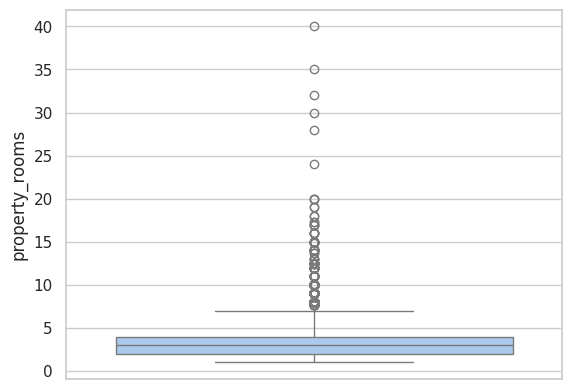

In [149]:
sns.boxplot(y=ds_train.property_rooms)

In [150]:
limite_rango_iq(ds_train, 'property_rooms')

(-1.0, 5.0)

El limite intercuartil superior es 5.0. Vemos que si bien hay muchos outliers por sobre el limite de 5 ambientes, esto se acentúa una vez que se superan los 20 ambientes.



In [151]:
# Observación anómala
outlier = ds_train[ds_train['property_rooms'] > 20]
outlier

id  start_date    end_date created_on  \
292167  CxZv3EmTnK+m6EJD2uQ5fw==  2021-02-23  2021-03-03 2021-02-23   
90004   TEs1aRnhJPwR0jRMq/Vzdg==  2021-08-03  9999-12-31 2021-08-03   
356618  +e6yeZZqYElYRYq4/cd9qg==  2021-11-18  2021-12-02 2021-11-18   
150885  X3WGOe/PrGS1u+xozM5elA==  2021-03-24  2021-06-05 2021-03-24   
52157   HwHiC1DJIxRAjUAOmujXsg==  2021-02-07  2021-06-15 2021-02-07   
389282  +xTrflFUv4fEGjwpwhP68w==  2021-05-05  2021-06-05 2021-05-05   

          latitud   longitud           place_l3 property_type  property_rooms  \
292167 -34.616487 -58.371596          San Telmo            PH            24.0   
90004  -34.633236 -58.480313           Floresta            PH            32.0   
356618 -34.588742 -58.422459            Palermo  Departamento            40.0   
150885 -34.642037 -58.438995   Parque Chacabuco  Departamento            35.0   
52157  -34.649872 -58.483012  Parque Avellaneda            PH            30.0   
389282 -34.570959 -58.458106           Belgrano          Casa            28.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
292167           3.091042                   800.0                     650.0   
90004            3.465736                   535.0                     435.0   
356618           3.000000                    75.0                      68.0   
150885           3.236021                    37.0                      33.0   
52157            2.000000                    72.0                      60.0   
389282           2.772589                   845.0                     845.0   

        property_price  
292167        350000.0  
90004         300000.0  
356618        145000.0  
150885         67000.0  
52157         123500.0  
389282        950000.0

Si bien los datos de habitaciones y ambientes no son posibles, por ahora no serán borrados ya que el resto (superficie cubierta, precio) parecen coherentes con el resto del dataset y pueden ser útiles.

Controlaremos según barrio.

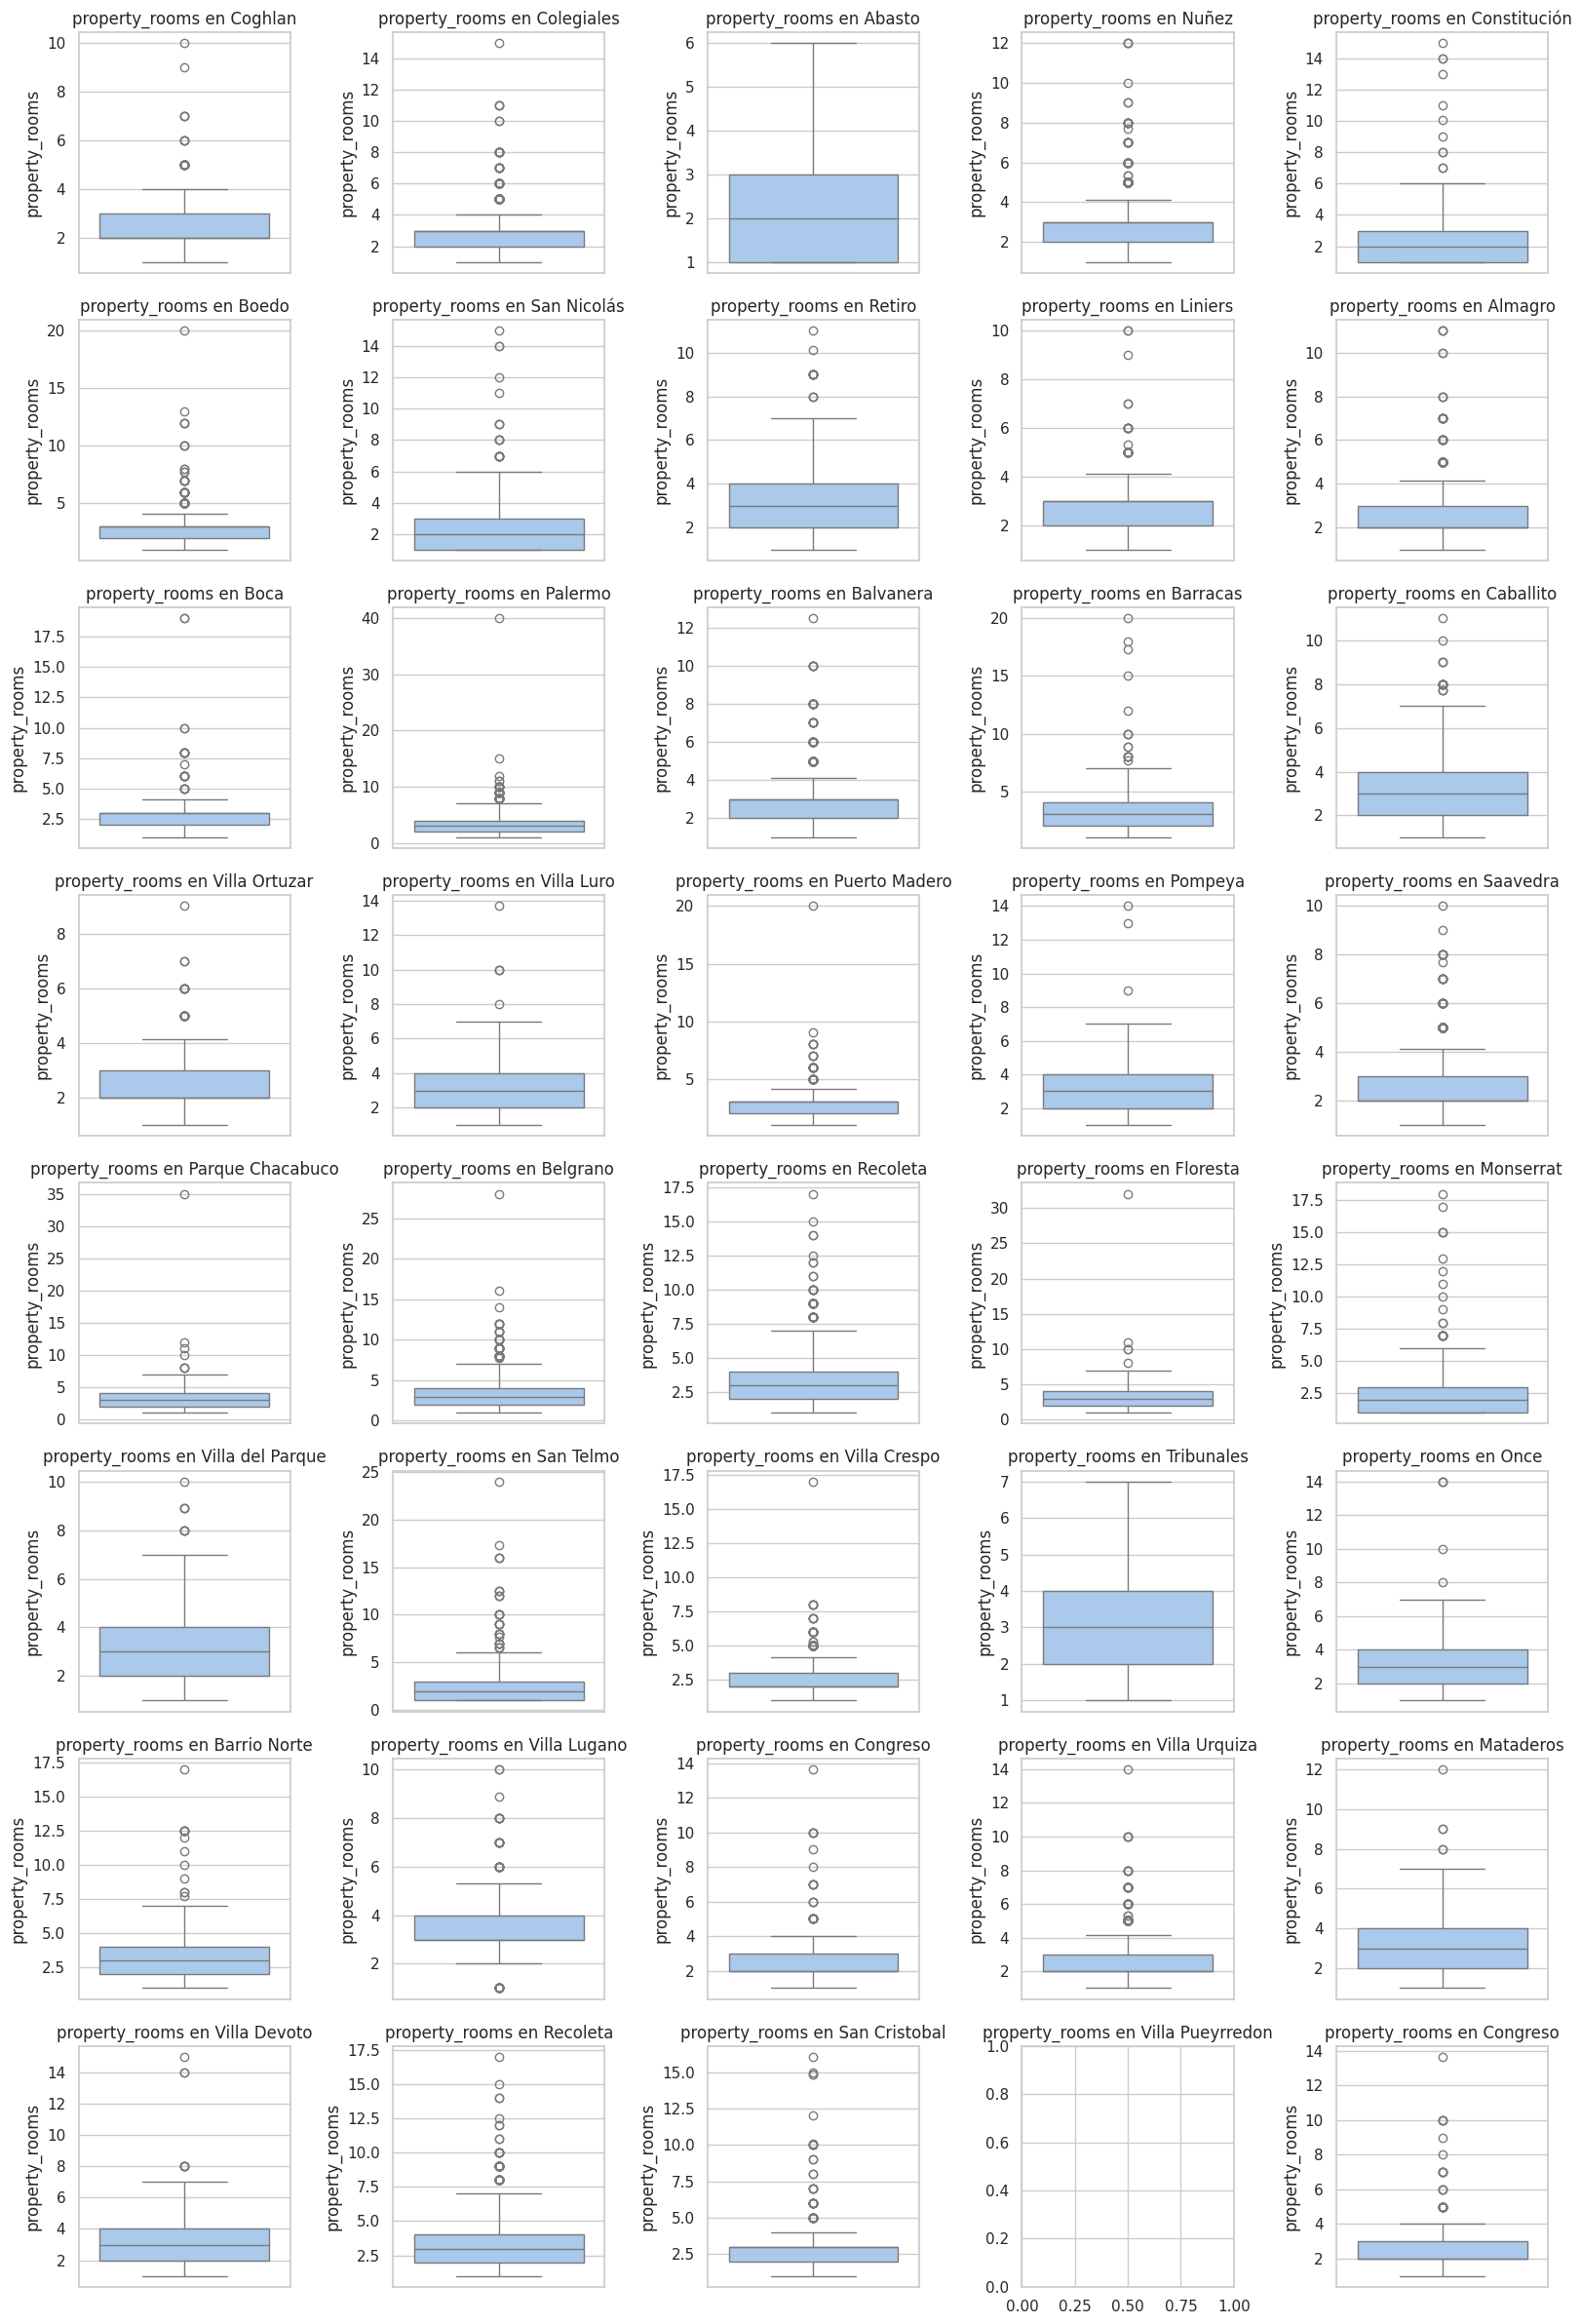

In [152]:
plot_por_barrio(ds_train, 'property_rooms')

Si bien nuestro límite intercuartil era de 5.0 vemos una tendencia un poco superior al ver los boxplot por barrio, así que realizaremos una corrección en aquellos registros atípicos que superen los 10 ambientes.

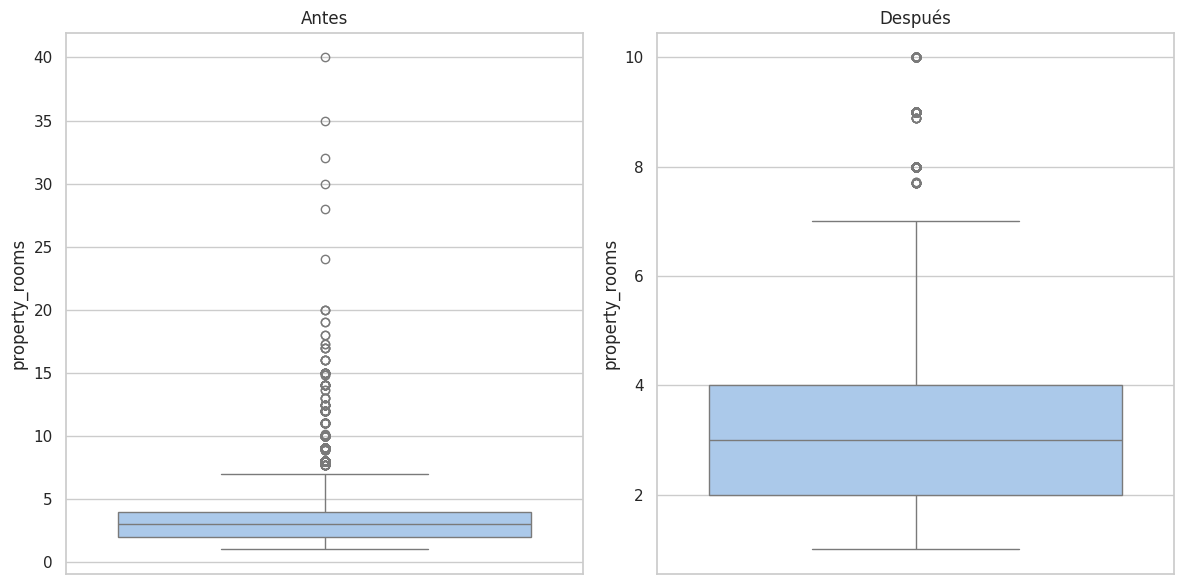

In [153]:
#Normalizacion logaritmica
ds_train.loc[ds_train['property_rooms'] > 10.0, 'property_rooms'] = np.log(ds_train['property_rooms'])

#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_rooms')

In [154]:
ds_train[(ds_train['property_rooms'] > 7.0)]

id  start_date    end_date created_on  \
215294  /q8BBh/r6rsYx5WuX0FP5g==  2021-11-17  2022-01-27 2021-11-17   
390975  +rifJtH3C1Cbcwuh3/U27w==  2021-04-12  2021-05-10 2021-04-12   
152082  rhbkRDEMdZnJUTydBoaCSQ==  2021-08-05  2021-08-19 2021-08-05   
181090  S0nA/yoLs7ZfZmNr7gRu+Q==  2021-08-06  2021-08-08 2021-08-06   
152199  TkWdzzR3QhCAqTyC15DI+A==  2021-08-05  9999-12-31 2021-08-05   
...                          ...         ...         ...        ...   
167682  wLqFfJ8FYgm5InBdqC5Lqg==  2021-04-30  2021-05-31 2021-04-30   
243027  rQANeOTbddLy79TSXTMWOw==  2021-02-11  2021-03-18 2021-02-11   
342818  mqoxNDn8Gn/UkxbHPo7iOA==  2021-08-11  2021-09-01 2021-08-11   
27014   YqBHm2FAS4C/5XDH94VDzg==  2021-12-03  2022-01-27 2021-12-03   
210907  4Kbv5JI0+3c2uK3KYObpQw==  2021-11-16  2022-01-27 2021-11-16   

          latitud   longitud   place_l3 property_type  property_rooms  \
215294 -34.572411 -58.420593    Palermo  Departamento             8.0   
390975 -34.584499 -58.439725    Palermo          Casa            10.0   
152082 -34.559613 -58.450134   Belgrano  Departamento             8.0   
181090 -34.567667 -58.470657   Belgrano          Casa             8.0   
152199 -34.590641 -58.389321   Recoleta  Departamento             8.0   
...           ...        ...        ...           ...             ...   
167682 -34.567858 -58.446164   Belgrano  Departamento             9.0   
243027 -34.639428 -58.524960    Liniers  Departamento            10.0   
342818 -34.616128 -58.394715  Balvanera          Casa             8.0   
27014  -34.561056 -58.480742   Belgrano          Casa             9.0   
210907 -34.577966 -58.401880    Palermo          Casa            10.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
215294           4.000000              450.000000                     450.0   
390975           4.000000              603.633227                     560.0   
152082           4.000000              360.000000                     360.0   
181090           5.000000              970.000000                     680.0   
152199           4.000000              392.000000                     370.0   
...                   ...                     ...                       ...   
167682           3.000000              390.000000                     390.0   
243027           1.962219              286.000000                     250.0   
342818           7.000000              164.000000                     143.0   
27014            6.000000              509.667525                     436.0   
210907           5.000000              950.000000                     900.0   

        property_price  
215294       2600000.0  
390975       1500000.0  
152082       1600000.0  
181090       1450000.0  
152199       1500000.0  
...                ...  
167682       1250000.0  
243027        260000.0  
342818        230000.0  
27014         530000.0  
210907       5500000.0  

[493 rows x 13 columns]

Tenemos 502 valores por sobre el máximo marcado por el bigote en el boxplot actual y que pueden ser considerados outliers. Reveeremos estos valores en otros análisis.

*Análisis según precio de la propiedad (property_price)*

<Axes: ylabel='property_price'>

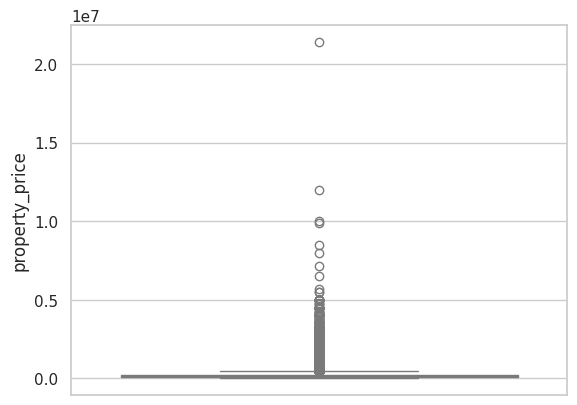

In [155]:
sns.boxplot(y=ds_train.property_price)

In [156]:
limite_rango_iq(ds_train, 'property_price')

(-115000.0, 305000.0)

Primero analizamos las anomalías más extremas, valores mayores o iguales a 8M.

In [157]:
# Observación anómala
outlier = ds_train[ds_train['property_price'] >= 8000000]
outlier

id  start_date    end_date created_on  \
332190  PkbD1ixa/IWHlTjwozccRQ==  2021-09-17  2022-03-09 2021-09-17   
60073   uoM9HDKq3jZKQKgHXTIGkg==  2021-01-25  2022-05-13 2021-01-25   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
85725   pKJUYwxjs9j+ub8gzLyc/g==  2021-03-26  2021-06-05 2021-03-26   
156777  8ChrVZoOYyEqAJMIP/pXoQ==  2021-02-17  2021-02-19 2021-02-17   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   

          latitud   longitud     place_l3 property_type  property_rooms  \
332190 -34.593634 -58.377164       Retiro          Casa        2.315929   
60073  -34.616044 -58.458621    Caballito  Departamento        3.000000   
1140   -34.605781 -58.376705  San Nicolás  Departamento        4.152868   
85725  -34.572494 -58.462433     Belgrano          Casa        5.000000   
156777 -34.608300 -58.371200    Monserrat          Casa        3.000000   
148534 -34.565947 -58.442326     Belgrano          Casa        9.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
332190           2.079442                  1166.0                    1485.0   
60073            1.984772                    68.0                      64.0   
1140             2.874909                 10500.0                   10500.0   
85725            4.000000                  3197.0                    3367.0   
156777           2.000000                   225.0                      93.0   
148534           5.000000                  1763.0                    1763.0   

        property_price  
332190      10000000.0  
60073       21400000.0  
1140         9900000.0  
85725       12000000.0  
156777       8500000.0  
148534       8000000.0

Buscando propiedades actualmente en venta en barrios y tamaños similares, parecería haber un error. Sin embargo, incluso haciendo un reducción de un decimo (valores más coherentes para esos varrios y tamaños de casas), estaríamos por sobre el límite intercuartil, asi que por ahora no haremos transformaciones.

Analicemos según barrio:

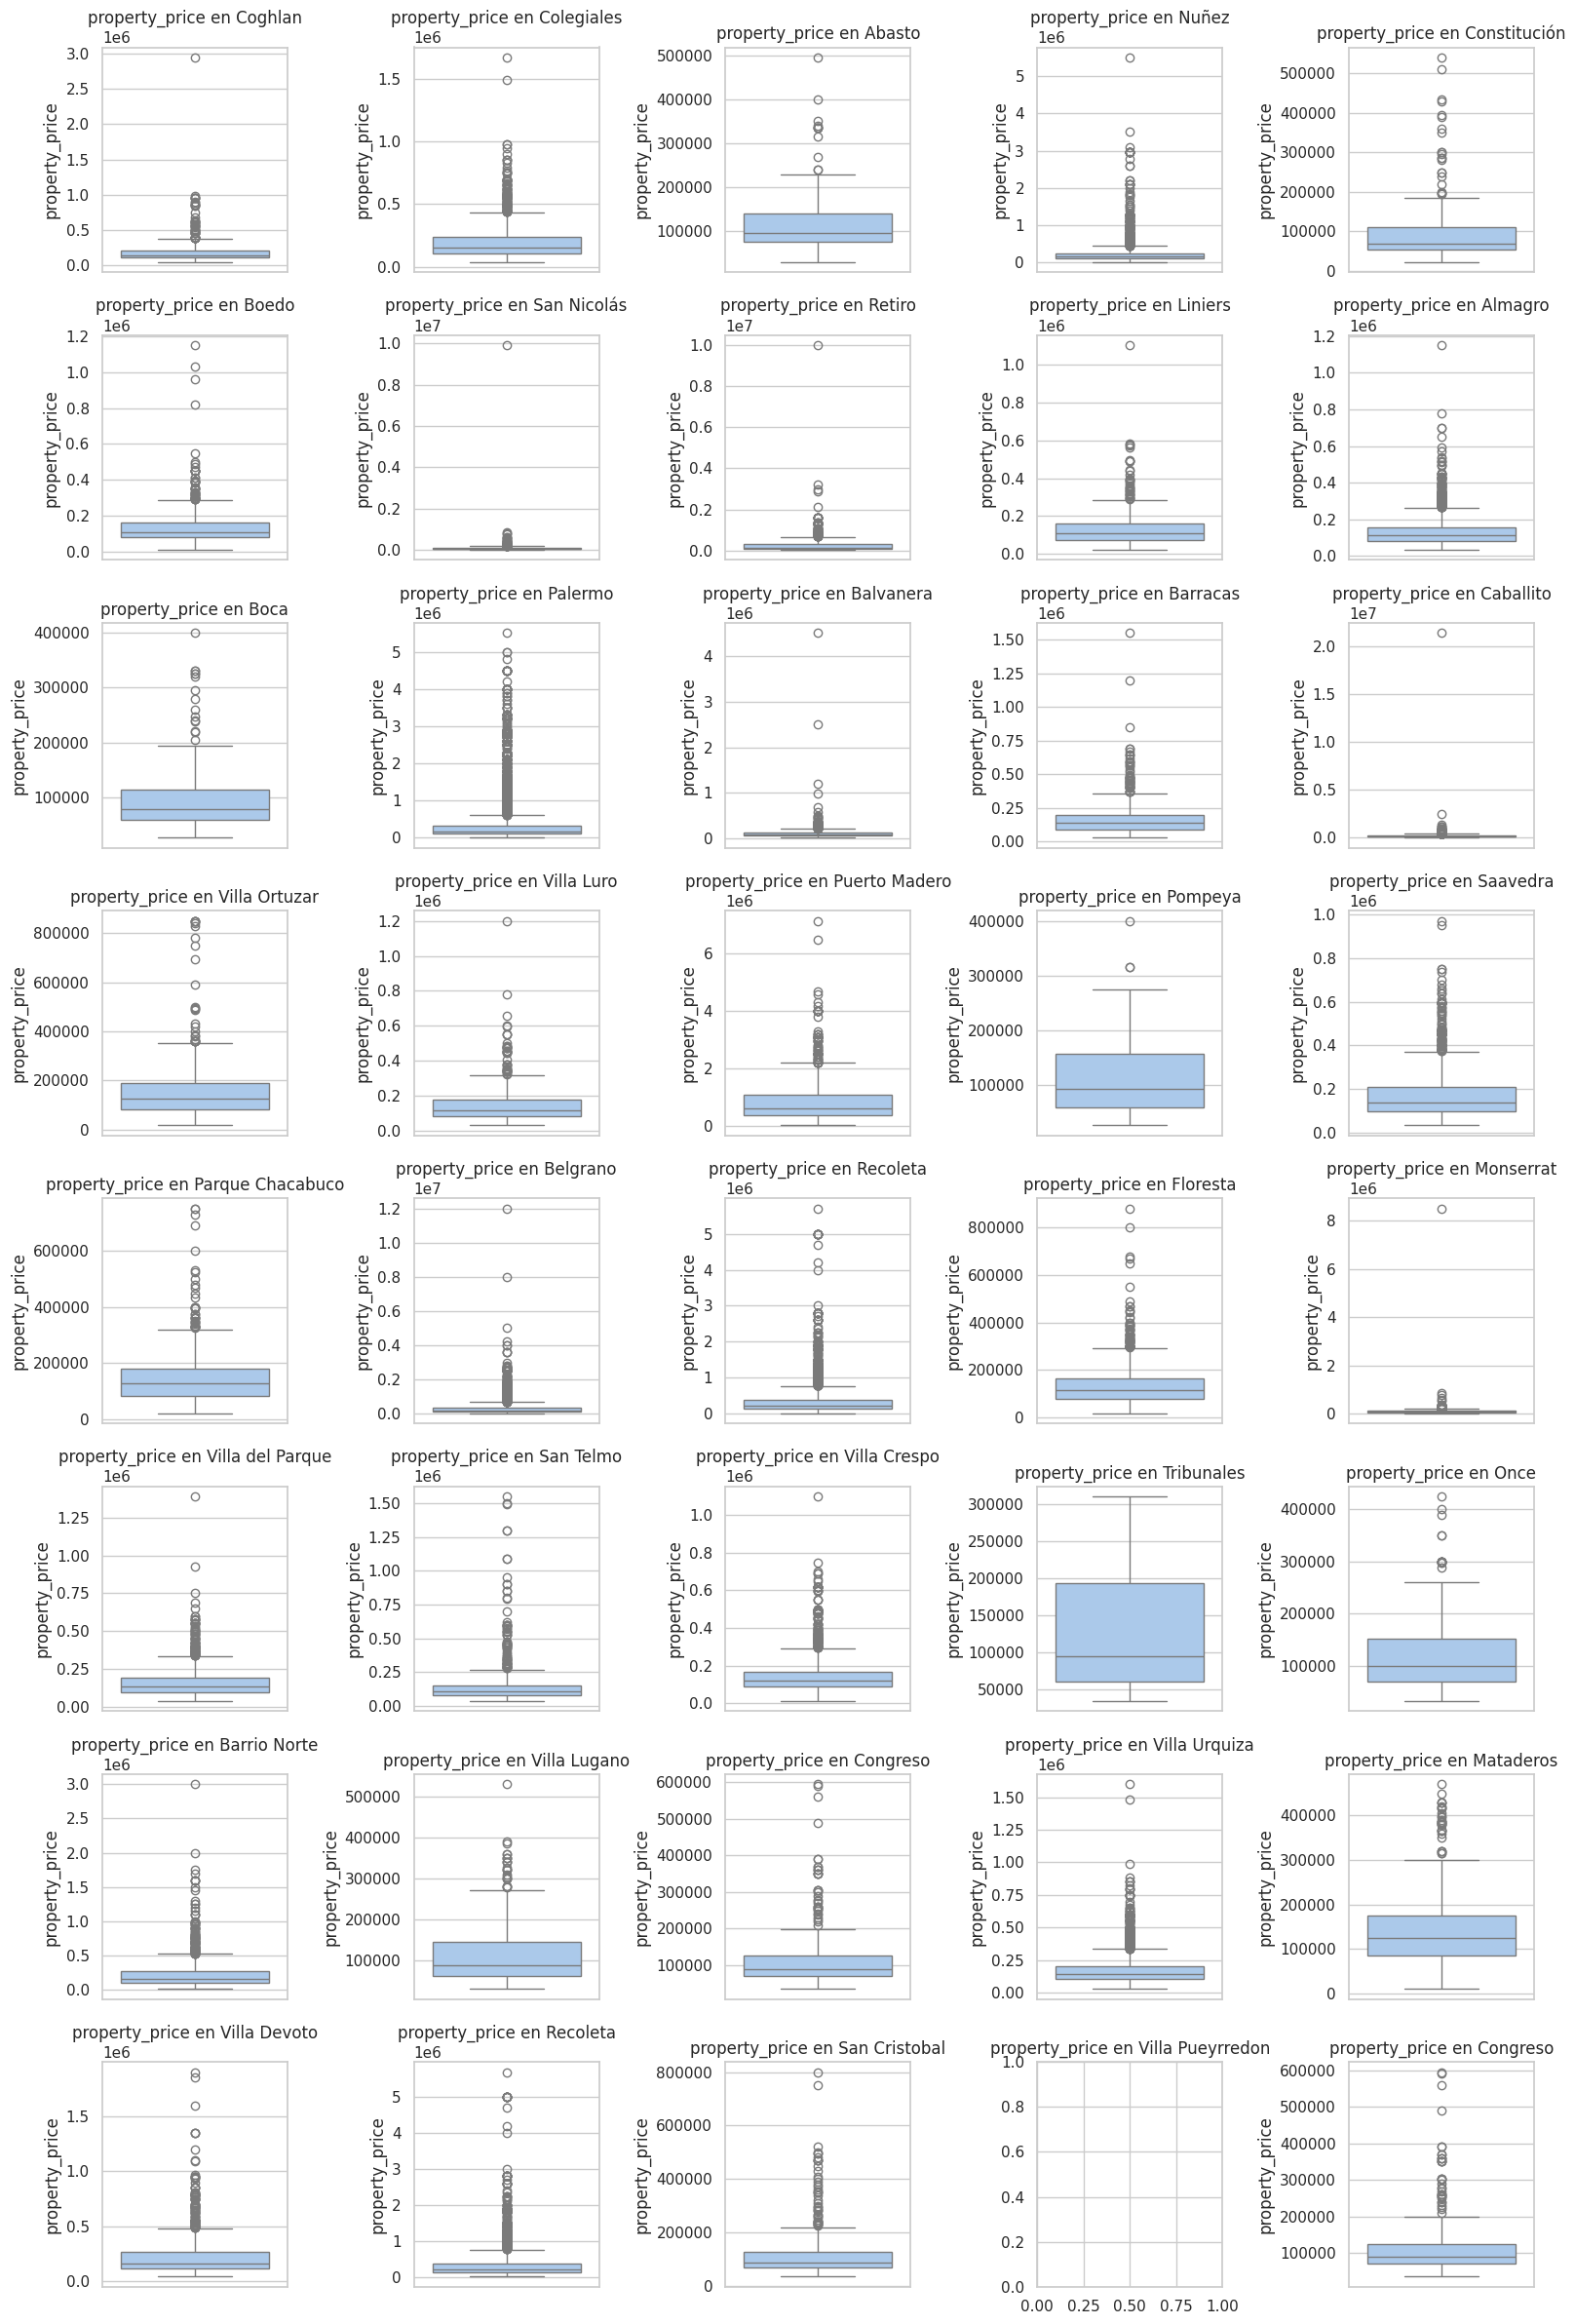

In [158]:
plot_por_barrio(ds_train, 'property_price')

Hasta el momento, este el analisis según barrio menos homogéneo. Si tomamos el limite superior intercuartil general (305m), se distorcionarían totalmente los datos de barrios como Palermo y Puerto Madero. Teniendo en cuenta lo relevante que es éste dato a la hora de que se establezca el precio de una propiedad, solo trabajaremos con los outliers que sean extremos en el contexto de cada barrio (analisis multivariado).

*Análisis según superficie cubierta (property_surface_covered)*

<Axes: ylabel='property_surface_covered'>

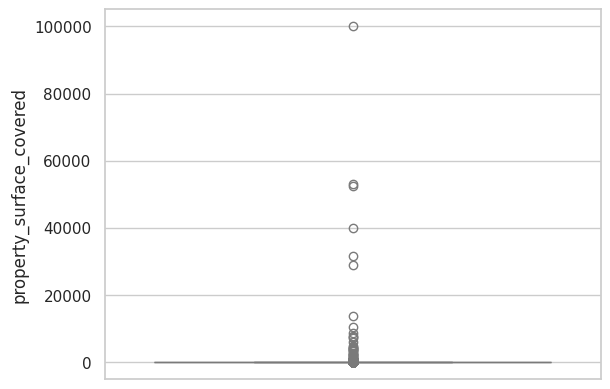

In [159]:
sns.boxplot(y=ds_train.property_surface_covered)

In [160]:
limite_rango_iq(ds_train, 'property_surface_covered')

(-32.0, 112.0)

In [161]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_covered'] <= 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [162]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_covered'].idxmin()
ds_train.loc[min_surface_index]

id                          kVQLnvyYCwLuuTjOV74ybQ==
start_date                                2021-01-07
end_date                                  2021-06-05
created_on                       2021-01-07 00:00:00
latitud                                   -34.585964
longitud                                  -58.515477
place_l3                            Villa Pueyrredón
property_type                                   Casa
property_rooms                                   4.0
property_bedrooms                                3.0
property_surface_total                         117.0
property_surface_covered                         1.0
property_price                              225000.0
Name: 405778, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [163]:
ds_train[ds_train['property_surface_covered'] < 15]

id  start_date    end_date created_on  \
215888  5W5QNZ2jHWu34VPPJY4+yg==  2021-12-22  2022-01-27 2021-12-22   
405778  kVQLnvyYCwLuuTjOV74ybQ==  2021-01-07  2021-06-05 2021-01-07   
72347   YWV5/PNA4mEXbVbiDFEBtg==  2021-05-29  2021-06-05 2021-05-29   
136438  QQz2nOhjScmU8bbeHpM/kw==  2021-10-06  2022-01-27 2021-10-06   
41540   Lf8BrIBw4gLrxysxz2D1oA==  2021-01-12  2021-06-05 2021-01-12   
...                          ...         ...         ...        ...   
339708  9f42yjtBKrMUjKp8yEwMFw==  2021-06-01  2021-09-30 2021-06-01   
6980    6GCrMbib36LOXLRmvDIf2g==  2021-02-09  9999-12-31 2021-02-09   
58327   7qWgu7xBtp5YLKA5WFfVGA==  2021-04-20  2021-07-14 2021-04-20   
406032  cusM4j1iFZAkseReK9FO+A==  2021-01-07  2022-08-03 2021-01-07   
41742   ASlJCUHRaJ5iiVANayu7CA==  2021-01-12  2021-01-28 2021-01-12   

          latitud   longitud          place_l3 property_type  property_rooms  \
215888 -34.586174 -58.508293  Villa Pueyrredón            PH        2.000000   
405778 -34.585964 -58.515477  Villa Pueyrredón          Casa        4.000000   
72347  -34.576209 -58.422647           Palermo  Departamento        1.000000   
136438 -34.627665 -58.382212      Constitución  Departamento        2.000000   
41540  -34.573360 -58.441008          Belgrano  Departamento        3.000000   
...           ...        ...               ...           ...             ...   
339708 -34.560470 -58.465124          Belgrano  Departamento        2.000000   
6980   -34.679962 -58.468550      Villa Lugano          Casa        4.123885   
58327  -34.602620 -58.452213      Villa Crespo            PH        3.000000   
406032 -34.626663 -58.423396             Boedo  Departamento        1.000000   
41742  -34.589957 -58.482162         Agronomía            PH        4.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
215888                1.0               50.000000                  8.000000   
405778                3.0              117.000000                  1.000000   
72347                 1.0               33.000000                  4.000000   
136438                1.0               36.000000                  4.000000   
41540                 2.0               20.398753                  1.000000   
...                   ...                     ...                       ...   
339708                1.0               48.000000                  3.000000   
6980                  3.0               30.420066                  1.000000   
58327                 2.0               61.000000                  4.000000   
406032                1.0               19.000000                 13.341978   
41742                 3.0               31.036862                  1.000000   

        property_price  
215888         85000.0  
405778        225000.0  
72347         112000.0  
136438         45000.0  
41540         229000.0  
...                ...  
339708        159900.0  
6980          225000.0  
58327         110000.0  
406032         38000.0  
41742         220000.0  

[82 rows x 13 columns]

Tenemos 147 registros de propiedades que tienen menos de 15m^2 cubiertos, y si bien según código urbanistico de la Ciudad de Buenos Aires no permite departamentos tan pequeños, sabemos que eso puede infringirse. Bajo estos supuestos, y viendo los registros que aparecen, vamos a reemplazar aquellos con superficies demasiado pequeñas (menores a 10m^2) por la superficie total.

In [164]:
# Reemplazamos el valor de superficie cubierta por el de superficie total cuando el valor sea menor a 10
ds_train.loc[ds_train['property_surface_covered'] < 10, 'property_surface_covered'] = ds_train.loc[ds_train['property_surface_covered'] < 10, 'property_surface_total']

In [165]:
ds_train[ds_train['property_surface_covered'] < 15]

id  start_date    end_date created_on  \
406033  fvJ3VqBQEBvvvISCVgeHTw==  2021-01-07  2022-08-03 2021-01-07   
306182  NdtyCs1ajFIL7LbDcgqTNA==  2021-03-04  2021-06-05 2021-03-04   
106084  Cei7lORKCWBifLYx3ZfqPw==  2021-03-11  2021-06-05 2021-03-11   
42084   F7uheixgxhdUgbKjRBtE4Q==  2021-01-12  2021-06-05 2021-01-12   
406030  fOFISuqKf+sBsKIyVstSiQ==  2021-01-07  9999-12-31 2021-01-07   
269002  ylVY/tIzzGtgErtaUNQ0xQ==  2021-01-19  2021-04-09 2021-01-19   
41866   766MJy1wZVXIvaCTKrsisA==  2021-01-12  2021-06-05 2021-01-12   
140832  2aHER3AXQs3zb3EegLhmgg==  2021-12-08  2022-01-27 2021-12-08   
295710  Qs1nZOkwJNnvL7CX+2qdmA==  2021-07-23  2021-09-02 2021-07-23   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
168064  au5LE/h6pCineDWdIhW/bA==  2021-04-30  2021-06-03 2021-04-30   
406502  1ZfAXtqVIM2Sona6Qe4rxw==  2021-01-07  9999-12-31 2021-01-07   
413890  RGbPOI8B5KC0XTTMtGQRbg==  2021-10-26  2022-01-27 2021-10-26   
176384  RjOps7eRF1K6c1oXlVf+NA==  2021-08-31  2022-03-21 2021-08-31   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
7869    WxvbiPA4bItk7Y2f7NSYJQ==  2021-02-09  9999-12-31 2021-02-09   
306760  BN/zbVuJN1C75QQzt6Urrw==  2021-03-04  2021-06-05 2021-03-04   
2773    3qmlbeo35YzYAWagk7lH/w==  2021-12-17  2022-01-27 2021-12-17   
370036  0cW9m4Hx06Krk13WdBuy7g==  2021-11-08  2022-01-27 2021-11-08   
50425   rBJcf/OUoNMDP0JylFF2Vg==  2021-06-23  2022-02-09 2021-06-23   
95129   PbmLqspc4lB1ngdoo8fgRw==  2021-09-24  2021-12-10 2021-09-24   
168108  aO8mzZYRhXeP+QU7ilBhLw==  2021-04-30  2021-06-03 2021-04-30   
415512  +G0XXvEI6U9g7Bx7n+orNg==  2021-09-08  2022-03-09 2021-09-08   
38433   aZRjphLdiNfPd74mAGbrSg==  2021-07-05  2021-08-09 2021-07-05   
10828   YKzg1u4r+ap3eQkx5Tk7pQ==  2021-01-13  2021-09-14 2021-01-13   
125097  PyLcCW4oNOzKqP2Tvz/8GA==  2021-11-26  2022-01-27 2021-11-26   
227332  em6zu1jxzH6eFzsNOQhHBQ==  2021-02-12  2021-03-05 2021-02-12   
370277  6pW42IdoB/53rxi8gWRjAg==  2021-11-08  2022-01-27 2021-11-08   
19478   J0/gRyRPvFY0WmEU0nY1Fw==  2021-01-27  2021-08-17 2021-01-27   
12678   /k6vQS3evPzOPNNCM3gpqg==  2021-07-06  2021-12-10 2021-07-06   
41903   AEb8UstVhCKA3+hCfJU86A==  2021-01-12  2021-06-05 2021-01-12   
307737  lPNyWzCo9bp7/IL3Jrf0lg==  2021-01-28  9999-12-31 2021-01-28   
441137  1OTcQOtXSIHcpww5/XnJ5Q==  2021-07-20  2021-09-24 2021-07-20   
268998  5GWt7TvAR8P5gOI8t1bVnw==  2021-01-19  2021-06-05 2021-01-19   
216786  YrQqgOmS9no9pw9tljj8Pw==  2021-12-22  2022-01-27 2021-12-22   
60741   /Ee8glCxReRIQ2P+XezcFA==  2021-07-18  2021-08-02 2021-07-18   
225485  LU1IAN2L0mz4+8+qGftckg==  2021-05-30  2021-06-18 2021-05-30   
378496  shrPM8aiVIBGCTQorgKH9w==  2021-05-19  2021-06-05 2021-05-19   
86014   pVG9sES9De/1eQ+tB90NjQ==  2021-03-26  2021-06-05 2021-03-26   
328146  VfW4BRWMa6Jhr1TTbuXrew==  2021-12-14  2022-01-19 2021-12-14   
289245  QfzGhaJB3szAQ93D+Hu7RQ==  2021-02-25  2021-06-05 2021-02-25   
153464  A8ZgE6+cCP6+mzZQ5Qb6Vg==  2021-12-09  2021-12-15 2021-12-09   
299     fWyBppiSbXhNSIjAmVDULg==  2021-09-09  2021-09-26 2021-09-09   
137881  PwWEOVOlQfocfeyV52WwMA==  2021-01-22  2021-06-05 2021-01-22   
406032  cusM4j1iFZAkseReK9FO+A==  2021-01-07  2022-08-03 2021-01-07   

          latitud   longitud          place_l3 property_type  property_rooms  \
406033 -34.626663 -58.423396             Boedo  Departamento        1.000000   
306182 -34.592939 -58.426085           Palermo  Departamento        1.000000   
106084 -34.617753 -58.379439         San Telmo  Departamento        1.000000   
42084  -34.583818 -58.495458  Villa Pueyrredón  Departamento        1.000000   
406030 -34.633577 -58.422942             Boedo  Departamento        1.000000   
269002 -34.612345 -58.404350         Balvanera  Departamento        1.000000   
41866  -34.611753 -58.516570      Villa Devoto  Departamento        1.000000   
140832 -34.588454 -58.385257          Recoleta  Departamento        5.000000   
295710 -34.598794 -58.386697          Recol

Ahora nos quedan 84 outliers.

In [166]:
ds_train[ds_train['property_surface_covered'] > 15000]

id  start_date    end_date created_on  \
372779  XzTb7kTEpmAKiyhEGSWz4A==  2021-08-24  2021-09-03 2021-08-24   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
106598  +YPtNPAzbhoDCLgqF26Q8A==  2021-03-11  2021-04-20 2021-03-11   
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
72521   csbBJk04jQXgGZLXTj5WAg==  2021-05-29  2021-06-13 2021-05-29   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   

          latitud   longitud      place_l3 property_type  property_rooms  \
372779 -34.555278 -58.459786      Belgrano  Departamento             4.0   
72316  -34.578917 -58.429373       Palermo  Departamento             2.0   
106598 -34.587320 -58.401556  Barrio Norte  Departamento             2.0   
117835 -34.550093 -58.483034      Saavedra  Departamento             2.0   
72521  -34.600113 -58.403649     Balvanera  Departamento             2.0   
352883 -34.550093 -58.483034      Saavedra  Departamento             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
372779                3.0                100068.0                  100051.0   
72316                 1.0                 61130.0                   53030.0   
106598                1.0                 56740.0                   52540.0   
117835                1.0                 43086.0                   40038.0   
72521                 1.0                 33800.0                   31670.0   
352883                1.0                 29064.0                   29064.0   

        property_price  
372779        420000.0  
72316         225000.0  
106598        175000.0  
117835        114000.0  
72521          66000.0  
352883         87400.0

Los casos de propiedades con superficie cubierta mayor a 15000, parecen ser errores de escala que pueden solucionarse facilmente.

In [167]:
condition = ds_train['property_surface_covered'] > 15000
ds_train.loc[condition, 'property_surface_covered'] /= 1000

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 15000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [168]:
ds_train[ds_train['property_surface_covered'] > 4000]

id  start_date    end_date created_on  \
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
94789   jXPtdq0ibrnXyePLhTi27g==  2021-09-24  2021-09-26 2021-09-24   
398069  Z41Yr6x3GUjyoxu+Afv4og==  2021-02-13  2021-03-18 2021-02-13   
314541  /lzClyxH96pdJl/JI2ofKg==  2021-01-06  2021-01-09 2021-01-06   
233699  McdySYNyXo2s4UZ2wypUig==  2021-03-20  2022-03-25 2021-03-20   
459841  9aQHQRqWMburSn+z+Qt5aQ==  2021-01-05  2021-01-09 2021-01-05   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   

          latitud   longitud       place_l3 property_type  property_rooms  \
459849 -34.628282 -58.437803      Caballito  Departamento        3.000000   
313745 -34.649174 -58.413106        Pompeya            PH        6.000000   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento        5.000000   
1140   -34.605781 -58.376705    San Nicolás  Departamento        4.152868   
94789  -34.614279 -58.361092      Caballito  Departamento        2.000000   
398069 -34.558309 -58.459923       Belgrano  Departamento        2.000000   
314541 -34.555086 -58.459669       Belgrano  Departamento        1.000000   
233699 -34.606260 -58.452737   Villa Crespo  Departamento        2.000000   
459841 -34.627876 -58.437996      Caballito  Departamento        3.000000   
459847 -34.628247 -58.437696      Caballito  Departamento        4.000000   
405272 -34.634638 -58.473519       Floresta            PH        4.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
459849           2.000000                  7720.0                    5970.0   
313745           2.000000                  8988.0                    7454.0   
264624           4.000000                 14744.0                   13717.0   
1140             2.874909                 10500.0                   10500.0   
94789            1.000000                  5312.0                    4809.0   
398069           1.000000                  6470.0                    4664.0   
314541           1.000000                  5741.0                    4276.0   
233699           1.000000                  4224.0                    4224.0   
459841           2.000000                  7153.0                    7153.0   
459847           3.000000                 18096.0                    8568.0   
405272           3.000000                  8306.0                    7755.0   

        property_price  
459849        167894.0  
313745        125000.0  
264624        330000.0  
1140         9900000.0  
94789         145000.0  
398069        149900.0  
314541         85144.0  
233699        100000.0  
459841        177807.0  
459847        324558.0  
405272        129000.0

Mismo que con las propiedades con superficie cubierta mayor a 5000, parece ser un problema de escala.

In [169]:
condition = ds_train['property_surface_covered'] > 4000
ds_train.loc[condition, 'property_surface_covered'] /= 100

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 4000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [170]:
ds_train[ds_train['property_surface_covered'] > 1100]

id  start_date    end_date created_on  \
438160  mzH1lMHi7l9z9MTU0eMRVg==  2021-10-27  2022-01-04 2021-10-27   
332190  PkbD1ixa/IWHlTjwozccRQ==  2021-09-17  2022-03-09 2021-09-17   
263173  YBglCjqyN6JqZ19HsNlLcQ==  2021-02-26  2021-03-27 2021-02-26   
354376  oSruKb4+uOYztGpv3h5FKA==  2021-11-04  2022-01-27 2021-11-04   
177140  KVFit7mVm+epRM497KAchw==  2021-03-23  2021-06-05 2021-03-23   
104177  rGOjA8tJXYsGapcTNwIKQA==  2021-05-28  2021-06-13 2021-05-28   
85725   pKJUYwxjs9j+ub8gzLyc/g==  2021-03-26  2021-06-05 2021-03-26   
187888  Fm8kbPskFOK8xGRsNuCvWQ==  2021-06-05  2021-06-13 2021-06-05   
177181  q6PytfvCIgQ9xOWk3o+m1A==  2021-03-23  2021-06-05 2021-03-23   
311702  BrohyhZSUQXAX3HqkGGT+w==  2021-01-03  2021-01-08 2021-01-03   
409283  mpNfyaVZmVoa5okuzXnf+w==  2021-03-19  2021-06-05 2021-03-19   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   
165965  NzYulXk9Ddrc+qQoqAAGRw==  2021-04-30  2021-06-05 2021-04-30   

          latitud   longitud          place_l3 property_type  property_rooms  \
438160 -34.630704 -58.400901  Parque Patricios  Departamento        1.000000   
332190 -34.593634 -58.377164            Retiro          Casa        2.315929   
263173 -34.557749 -58.471384          Belgrano          Casa        8.000000   
354376 -34.579394 -58.453519        Colegiales  Departamento        3.000000   
177140 -34.627279 -58.373637          Barracas          Casa        2.851449   
104177 -34.603992 -58.500042  Villa del Parque  Departamento        1.000000   
85725  -34.572494 -58.462433          Belgrano          Casa        5.000000   
187888 -34.606771 -58.502277  Villa del Parque  Departamento        2.000000   
177181 -34.626697 -58.373873         San Telmo          Casa        2.851449   
311702 -34.609829 -58.385083         Monserrat  Departamento        2.000000   
409283 -34.599678 -58.436474           Palermo  Departamento        2.917607   
148534 -34.565947 -58.442326          Belgrano          Casa        9.000000   
165965 -34.557754 -58.471497           Coghlan          Casa        3.015877   

        property_bedrooms  property_surface_total  property_surface_covered  \
438160           1.000000               31.000000                    2700.0   
332190           2.079442             1166.000000                    1485.0   
263173           2.079442             2204.000000                    2204.0   
354376           2.000000               41.000000                    3837.0   
177140           2.639057             2500.000000                    2500.0   
104177           1.000000             3623.000000                    3615.0   
85725            4.000000             3197.000000                    3367.0   
187888           1.000000             3425.000000                    3425.0   
177181           2.639057             2500.000000                    2500.0   
311702           1.000000             3939.000000                    3939.0   
409283           1.931484             1573.595999                    1481.0   
148534           5.000000             1763.000000                    1763.0   
165965           2.005949             2266.000000                    2266.0   

        property_price  
438160         71500.0  
332190      10000000.0  
263173       1400000.0  
354376         83000.0  
177140       1550000.0  
104177        110000.0  
85725       12000000.0  
187888         75000.0  
177181       1550000.0  
311702         64000.0  
409283       2800000.0  
148534       8000000.0  
165965       2950000.0

Entre las anomalías que persisten parecería haber un caso de error de escala. A su vez, en los casos donde las habitaciones son regulares (<=5.0) haremos una corrección logaritmica.

In [171]:
# Corección de error de tipeo/escala
ds_train.loc[ds_train['id'] == 'mzH1lMHi7l9z9MTU0eMRVg==', 'property_surface_covered'] /= 100
# Corrección logaritmica
ds_train.loc[(ds_train['property_bedrooms'] <= 5.0) & (ds_train['property_surface_covered'] > 1100), 'property_surface_covered'] = np.log(ds_train['property_surface_covered'])



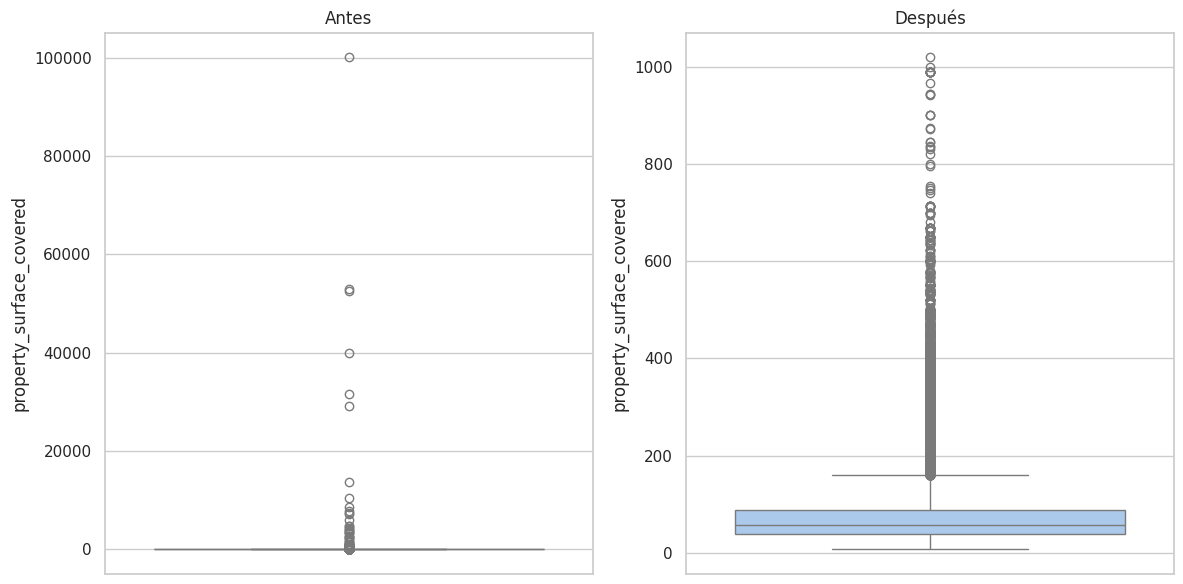

In [172]:
#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_surface_covered')

*Análisis según superficie total (property_surface_total)*



<Axes: ylabel='property_surface_total'>

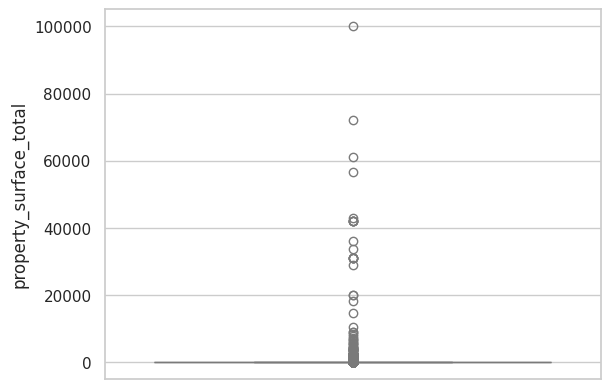

In [173]:
sns.boxplot(y=ds_train.property_surface_total)

In [174]:
limite_rango_iq(ds_train, 'property_surface_total')

(-45.0, 135.0)

In [175]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_total'] < 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [176]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_total'].idxmin()
ds_train.loc[min_surface_index]

id                          WxvbiPA4bItk7Y2f7NSYJQ==
start_date                                2021-02-09
end_date                                  9999-12-31
created_on                       2021-02-09 00:00:00
latitud                                   -34.680073
longitud                                  -58.451069
place_l3                                Villa Lugano
property_type                           Departamento
property_rooms                                   2.0
property_bedrooms                                1.0
property_surface_total                      9.760644
property_surface_covered                    9.760644
property_price                               35000.0
Name: 7869, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [177]:
ds_train[ds_train['property_surface_total'] < 15]

id  start_date    end_date created_on  \
180380  i16eZUm9vHNMrQMT82+9hQ==  2021-02-16  2021-12-09 2021-02-16   
334734  YHwlmP7ig5lyXrqU3Othlw==  2021-12-28  2022-01-27 2021-12-28   
42084   F7uheixgxhdUgbKjRBtE4Q==  2021-01-12  2021-06-05 2021-01-12   
41866   766MJy1wZVXIvaCTKrsisA==  2021-01-12  2021-06-05 2021-01-12   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
168064  au5LE/h6pCineDWdIhW/bA==  2021-04-30  2021-06-03 2021-04-30   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
7869    WxvbiPA4bItk7Y2f7NSYJQ==  2021-02-09  9999-12-31 2021-02-09   
32068   4jwFTdGy7N11fF14hLplcw==  2021-05-17  2021-06-05 2021-05-17   
41192   jLK6eCdVrULnEhLxS2kgUg==  2021-01-12  2021-02-05 2021-01-12   
50425   rBJcf/OUoNMDP0JylFF2Vg==  2021-06-23  2022-02-09 2021-06-23   
168108  aO8mzZYRhXeP+QU7ilBhLw==  2021-04-30  2021-06-03 2021-04-30   
21153   us/N38vEYZarzdFzep5a9A==  2021-03-15  2021-03-25 2021-03-15   
38433   aZRjphLdiNfPd74mAGbrSg==  2021-07-05  2021-08-09 2021-07-05   
227332  em6zu1jxzH6eFzsNOQhHBQ==  2021-02-12  2021-03-05 2021-02-12   
41903   AEb8UstVhCKA3+hCfJU86A==  2021-01-12  2021-06-05 2021-01-12   
268998  5GWt7TvAR8P5gOI8t1bVnw==  2021-01-19  2021-06-05 2021-01-19   
216786  YrQqgOmS9no9pw9tljj8Pw==  2021-12-22  2022-01-27 2021-12-22   
225485  LU1IAN2L0mz4+8+qGftckg==  2021-05-30  2021-06-18 2021-05-30   
190609  /MC0i98hQuKwdP9/I6NdRg==  2021-10-09  2022-01-27 2021-10-09   
41088   ngtAPqtsUhn8Y9+r/FgteA==  2021-07-19  9999-12-31 2021-07-19   
299     fWyBppiSbXhNSIjAmVDULg==  2021-09-09  2021-09-26 2021-09-09   
168118  gsbwHqWC2NW1ywgCJd0xaQ==  2021-04-30  2021-06-03 2021-04-30   

          latitud   longitud          place_l3 property_type  property_rooms  \
180380 -34.634265 -58.505317        Villa Luro  Departamento        3.000000   
334734 -34.563734 -58.483824     Villa Urquiza  Departamento        2.000000   
42084  -34.583818 -58.495458  Villa Pueyrredón  Departamento        1.000000   
41866  -34.611753 -58.516570      Villa Devoto  Departamento        1.000000   
72233  -34.597934 -58.376981            Retiro  Departamento        1.000000   
168064 -34.606525 -58.430740         Caballito  Departamento        2.704633   
76920  -34.625870 -58.384003      Constitución  Departamento        1.000000   
7869   -34.680073 -58.451069      Villa Lugano  Departamento        2.000000   
32068  -34.571979 -58.446945          Belgrano  Departamento        3.000000   
41192  -34.635506 -58.417926             Boedo            PH        4.000000   
50425  -34.644446 -58.418263           Pompeya  Departamento        1.000000   
168108 -34.606525 -58.430740         Caballito  Departamento        2.704633   
21153  -34.633819 -58.504568        Villa Luro  Departamento        3.000000   
38433  -34.600832 -58.390383        Tribunales  Departamento        1.000000   
227332 -34.633430 -58.480731          Floresta            PH        2.000000   
41903  -34.579301 -58.465854     Villa Ortuzar  Departamento        1.000000   
268998 -34.554519 -58.491599          Saavedra  Departamento        2.000000   
216786 -34.621967 -58.372598         San Telmo  Departamento        1.000000   
225485 -34.597825 -58.376983            Retiro  Departamento        1.000000   
190609 -34.568710 -58.473026          Saavedra  Departamento        1.000000   
41088  -34.614573 -58.480650  Villa del Parque  Departamento        2.000000   
299    -34.597934 -58.376981            Retiro  Departamento        1.000000   
168118 -34.606525 -58.430740         Caballito  Departamento        2.710934   

        property_bedrooms  property_surface_total  property_surface_covered  \
180380           1.984316               10.000000                 39.944749   
334734           1.000000               10.000000                 60.000000   
42084            1.000000               14.739443                 14.739443   
41866            1.000000               14.739443                 14.739443   
72233    

Por las razones ya expuestas y teniendo en cuenta que son todos departamentos, decidimos reemplazar los datos de superficie total por los de superficie cubierta.

In [178]:
# Reemplazamos el valor de superficie cubierta por el de superficie total cuando el valor sea menor a 10
ds_train.loc[ds_train['property_surface_total'] < 15, 'property_surface_total'] = ds_train.loc[ds_train['property_surface_total'] < 15, 'property_surface_covered']

In [179]:
# Revisamos y solo quedan aquellos casos donde la superficie cubierta también era menor a 15.
ds_train[ds_train['property_surface_total'] < 15]

id  start_date    end_date created_on  \
42084   F7uheixgxhdUgbKjRBtE4Q==  2021-01-12  2021-06-05 2021-01-12   
41866   766MJy1wZVXIvaCTKrsisA==  2021-01-12  2021-06-05 2021-01-12   
72233   txvsZ+X6aRbIQLPPQ3wZ3w==  2021-05-29  2021-06-18 2021-05-29   
168064  au5LE/h6pCineDWdIhW/bA==  2021-04-30  2021-06-03 2021-04-30   
76920   wNXQe4mGeSb2TxJgWd65PA==  2021-07-17  2021-07-20 2021-07-17   
7869    WxvbiPA4bItk7Y2f7NSYJQ==  2021-02-09  9999-12-31 2021-02-09   
50425   rBJcf/OUoNMDP0JylFF2Vg==  2021-06-23  2022-02-09 2021-06-23   
168108  aO8mzZYRhXeP+QU7ilBhLw==  2021-04-30  2021-06-03 2021-04-30   
38433   aZRjphLdiNfPd74mAGbrSg==  2021-07-05  2021-08-09 2021-07-05   
227332  em6zu1jxzH6eFzsNOQhHBQ==  2021-02-12  2021-03-05 2021-02-12   
41903   AEb8UstVhCKA3+hCfJU86A==  2021-01-12  2021-06-05 2021-01-12   
268998  5GWt7TvAR8P5gOI8t1bVnw==  2021-01-19  2021-06-05 2021-01-19   
216786  YrQqgOmS9no9pw9tljj8Pw==  2021-12-22  2022-01-27 2021-12-22   
225485  LU1IAN2L0mz4+8+qGftckg==  2021-05-30  2021-06-18 2021-05-30   
299     fWyBppiSbXhNSIjAmVDULg==  2021-09-09  2021-09-26 2021-09-09   

          latitud   longitud          place_l3 property_type  property_rooms  \
42084  -34.583818 -58.495458  Villa Pueyrredón  Departamento        1.000000   
41866  -34.611753 -58.516570      Villa Devoto  Departamento        1.000000   
72233  -34.597934 -58.376981            Retiro  Departamento        1.000000   
168064 -34.606525 -58.430740         Caballito  Departamento        2.704633   
76920  -34.625870 -58.384003      Constitución  Departamento        1.000000   
7869   -34.680073 -58.451069      Villa Lugano  Departamento        2.000000   
50425  -34.644446 -58.418263           Pompeya  Departamento        1.000000   
168108 -34.606525 -58.430740         Caballito  Departamento        2.704633   
38433  -34.600832 -58.390383        Tribunales  Departamento        1.000000   
227332 -34.633430 -58.480731          Floresta            PH        2.000000   
41903  -34.579301 -58.465854     Villa Ortuzar  Departamento        1.000000   
268998 -34.554519 -58.491599          Saavedra  Departamento        2.000000   
216786 -34.621967 -58.372598         San Telmo  Departamento        1.000000   
225485 -34.597825 -58.376983            Retiro  Departamento        1.000000   
299    -34.597934 -58.376981            Retiro  Departamento        1.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
42084            1.000000               14.739443                 14.739443   
41866            1.000000               14.739443                 14.739443   
72233            1.000000               14.000000                 14.000000   
168064           1.768077               12.000000                 12.000000   
76920            1.000000               14.000000                 14.000000   
7869             1.000000                9.760644                  9.760644   
50425            1.000000               14.000000                 14.000000   
168108           1.768077               12.000000                 12.000000   
38433            1.000000               10.000000                 10.000000   
227332           1.000000                9.760644                  9.760644   
41903            1.000000               14.739443                 14.739443   
268998           1.000000               10.810469                 10.810469   
216786           1.000000               14.000000                 14.000000   
225485           1.000000               13.000000                 13.000000   
299              1.000000               14.000000                 14.000000   

        property_price  
42084          92000.0  
41866         109900.0  
72233          45200.0  
168064         20000.0  
76920          24500.0  
7869           35000.0  
50425          26500.0  
168108         23000.0  
38433          35000.0  
227332         52000.0  
41903          98000.0  
268998         82000.0  
216786         38000.0

In [180]:
ds_train[ds_train['property_surface_total'] > 100000]

id  start_date    end_date created_on  \
372779  XzTb7kTEpmAKiyhEGSWz4A==  2021-08-24  2021-09-03 2021-08-24   

          latitud   longitud  place_l3 property_type  property_rooms  \
372779 -34.555278 -58.459786  Belgrano  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
372779                3.0                100068.0                   100.051   

        property_price  
372779        420000.0

En el caso de la propiedad de Parque Chacabuco, ninguno de los datos tiene coherencia al mirarlos en conjunto: una casa de 22.75 ambientes, y 17.23 habitaciones, con una superficie cubierta de 217.0 y total de 177198m^2. Tendriamos que imputar todos estos datos lo cual no tendría sentido, nos quedariamos con poco material real.

En los otros dos casos, parece ser más un error de escala asi que lo normalizamos.

In [181]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_surface_total'] > 170000].index
ds_train.drop(id_outlier,inplace=True)

<ipython-input-181-5a202d8d3887>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [182]:
# Modificamos los otros
condition = ds_train['property_surface_total'] > 100000
ds_train.loc[condition, 'property_surface_total'] /= 1000

ds_train[ds_train['property_surface_total'] > 100000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [183]:
ds_train[ds_train['property_surface_total'] > 7000]

id  start_date    end_date created_on  \
219021  WQU6YIN+y4z30xaPRG4LHQ==  2021-03-07  2022-02-09 2021-03-07   
370920  HVcSoFtn8OjGl2rbv0GsBw==  2021-04-24  2021-06-05 2021-04-24   
263945  xTMT4WGUrto9Ee8CBjxUxw==  2021-02-26  2021-02-28 2021-02-26   
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
362741  G7sKDYpvhrBrps0xzAQrmQ==  2021-01-16  2021-04-14 2021-01-16   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
324541  s0do8ciUehI3xXZNULgg+Q==  2021-03-03  2021-03-23 2021-03-03   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
126869  MYZD6oNPlLhMzVLoEbL9jw==  2021-10-05  2021-11-04 2021-10-05   
106598  +YPtNPAzbhoDCLgqF26Q8A==  2021-03-11  2021-04-20 2021-03-11   
1140    ddV7Ll5c1H+Rmqqovc+uFg==  2021-09-09  2022-01-27 2021-09-09   
370918  rnFgWleVdid1Czn05PkodA==  2021-04-24  2021-06-05 2021-04-24   
300394  E2FhGbtCzmdLHk9QEY47BA==  2021-08-10  2021-09-15 2021-08-10   
237392  wGXDCrWhpDX+JQBrC+7jpA==  2021-02-27  2021-03-03 2021-02-27   
370919  9p8XKpRRE9vzUT7Y/5FZ7Q==  2021-04-24  2021-06-05 2021-04-24   
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
353009  f7xAHgUi1ruXPA9JxKGK6g==  2021-06-25  2021-08-10 2021-06-25   
459841  9aQHQRqWMburSn+z+Qt5aQ==  2021-01-05  2021-01-09 2021-01-05   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
370917  OC6HYSBo/pqio5ZTLgoPvg==  2021-04-24  2021-06-05 2021-04-24   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
84073   vMD1fCSS0kedOs8Bk/PCjA==  2021-02-05  2021-05-16 2021-02-05   
72521   csbBJk04jQXgGZLXTj5WAg==  2021-05-29  2021-06-13 2021-05-29   
275253  5nXtCXuxHhkZ51syuRB7YQ==  2021-09-15  2021-10-07 2021-09-15   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
370921  DhCI1Vz1PAu5fOy930TFXw==  2021-04-24  2021-06-05 2021-04-24   

          latitud   longitud       place_l3 property_type  property_rooms  \
219021 -34.636532 -58.376406       Barracas  Departamento        4.000000   
370920 -34.571747 -58.422612        Palermo  Departamento        5.000000   
263945 -34.576096 -58.441278        Palermo  Departamento        3.000000   
459849 -34.628282 -58.437803      Caballito  Departamento        3.000000   
313745 -34.649174 -58.413106        Pompeya            PH        6.000000   
362741 -34.579163 -58.455725     Colegiales  Departamento        1.000000   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento        5.000000   
324541 -34.628721 -58.421383          Boedo            PH        4.000000   
72316  -34.578917 -58.429373        Palermo  Departamento        2.000000   
126869 -34.579163 -58.455725     Colegiales  Departamento        1.000000   
106598 -34.587320 -58.401556   Barrio Norte  Departamento        2.000000   
1140   -34.605781 -58.376705    San Nicolás  Departamento        4.152868   
370918 -34.571747 -58.422612        Palermo  Departamento        4.000000   
300394 -34.579163 -58.455725     Colegiales  Departamento        1.000000   
237392 -34.628721 -58.421383          Boedo            PH        4.000000   
370919 -34.571747 -58.422612        Palermo  Departamento        5.000000   
117835 -34.550093 -58.483034       Saavedra  Departamento        2.000000   
353009 -34.579163 -58.455725     Colegiales  Departamento        1.000000   
459841 -34.627876 -58.437996      Caballito  Departamento        3.000000   
459847 -34.628247 -58.437696      Caballito  Departamento        4.000000   
370917 -34.571747 -58.422612        Palermo  Departamento        4.000000   
405272 -34.634638 -58.473519       Floresta            PH        4.000000   
84073  -34.588175 -58.396261       Recoleta  Departamento        1.000000   
72521  -34.600113 -58.403649      Balvanera  Departamento        2.000000   
275253 -34.579163 -58.455725     Colegiales  Departamento        1.000000   
352883 -34.550093 -58.483034       Saav

Se ve una tendencia entre la superficie total y la superficie cubierta que indicaría un error de escala. Vamos a corregirlo.

In [184]:
# Buscamos las filas donde property_surface_total / 100 == property_surface_covered y hacemos una máscara.
mask = ds_train['property_surface_total'] / 100 == ds_train['property_surface_covered']

# Reemplazamos property_surface_total con property_surface_covered en esos casos
ds_train.loc[mask, 'property_surface_total'] = ds_train.loc[mask, 'property_surface_covered']

In [185]:
ds_train[ds_train['property_surface_total'] > 7000]

id  start_date    end_date created_on  \
219021  WQU6YIN+y4z30xaPRG4LHQ==  2021-03-07  2022-02-09 2021-03-07   
370920  HVcSoFtn8OjGl2rbv0GsBw==  2021-04-24  2021-06-05 2021-04-24   
263945  xTMT4WGUrto9Ee8CBjxUxw==  2021-02-26  2021-02-28 2021-02-26   
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
362741  G7sKDYpvhrBrps0xzAQrmQ==  2021-01-16  2021-04-14 2021-01-16   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
324541  s0do8ciUehI3xXZNULgg+Q==  2021-03-03  2021-03-23 2021-03-03   
72316   BPTyNzwU2D4btCduu8ls3A==  2021-05-29  2021-06-08 2021-05-29   
126869  MYZD6oNPlLhMzVLoEbL9jw==  2021-10-05  2021-11-04 2021-10-05   
106598  +YPtNPAzbhoDCLgqF26Q8A==  2021-03-11  2021-04-20 2021-03-11   
370918  rnFgWleVdid1Czn05PkodA==  2021-04-24  2021-06-05 2021-04-24   
300394  E2FhGbtCzmdLHk9QEY47BA==  2021-08-10  2021-09-15 2021-08-10   
237392  wGXDCrWhpDX+JQBrC+7jpA==  2021-02-27  2021-03-03 2021-02-27   
370919  9p8XKpRRE9vzUT7Y/5FZ7Q==  2021-04-24  2021-06-05 2021-04-24   
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
353009  f7xAHgUi1ruXPA9JxKGK6g==  2021-06-25  2021-08-10 2021-06-25   
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
370917  OC6HYSBo/pqio5ZTLgoPvg==  2021-04-24  2021-06-05 2021-04-24   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
84073   vMD1fCSS0kedOs8Bk/PCjA==  2021-02-05  2021-05-16 2021-02-05   
72521   csbBJk04jQXgGZLXTj5WAg==  2021-05-29  2021-06-13 2021-05-29   
275253  5nXtCXuxHhkZ51syuRB7YQ==  2021-09-15  2021-10-07 2021-09-15   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
370921  DhCI1Vz1PAu5fOy930TFXw==  2021-04-24  2021-06-05 2021-04-24   

          latitud   longitud       place_l3 property_type  property_rooms  \
219021 -34.636532 -58.376406       Barracas  Departamento             4.0   
370920 -34.571747 -58.422612        Palermo  Departamento             5.0   
263945 -34.576096 -58.441278        Palermo  Departamento             3.0   
459849 -34.628282 -58.437803      Caballito  Departamento             3.0   
313745 -34.649174 -58.413106        Pompeya            PH             6.0   
362741 -34.579163 -58.455725     Colegiales  Departamento             1.0   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento             5.0   
324541 -34.628721 -58.421383          Boedo            PH             4.0   
72316  -34.578917 -58.429373        Palermo  Departamento             2.0   
126869 -34.579163 -58.455725     Colegiales  Departamento             1.0   
106598 -34.587320 -58.401556   Barrio Norte  Departamento             2.0   
370918 -34.571747 -58.422612        Palermo  Departamento             4.0   
300394 -34.579163 -58.455725     Colegiales  Departamento             1.0   
237392 -34.628721 -58.421383          Boedo            PH             4.0   
370919 -34.571747 -58.422612        Palermo  Departamento             5.0   
117835 -34.550093 -58.483034       Saavedra  Departamento             2.0   
353009 -34.579163 -58.455725     Colegiales  Departamento             1.0   
459847 -34.628247 -58.437696      Caballito  Departamento             4.0   
370917 -34.571747 -58.422612        Palermo  Departamento             4.0   
405272 -34.634638 -58.473519       Floresta            PH             4.0   
84073  -34.588175 -58.396261       Recoleta  Departamento             1.0   
72521  -34.600113 -58.403649      Balvanera  Departamento             2.0   
275253 -34.579163 -58.455725     Colegiales  Departamento             1.0   
352883 -34.550093 -58.483034       Saavedra  Departamento             1.0   
370921 -34.571747 -58.422612        Palermo  Departamento             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
219021                3.0                 72060.0                    90.000   
370920                

Algunos registros específicos parecen ser errores de tipeo/escala. Los corregimos manualmente y el resto serán corregidos logaritmicamente.

In [186]:
# Corección de error de tipeo/escala
condition = (ds_train['property_surface_total'] == 31000) & (ds_train['property_surface_covered'] == 26)
condition2 = (ds_train['property_surface_total'] == 42110.0) & (ds_train['property_surface_covered'] == 307)
ds_train.loc[condition, 'property_surface_total'] /= 1000
ds_train.loc[condition2, 'property_surface_total'] /= 100


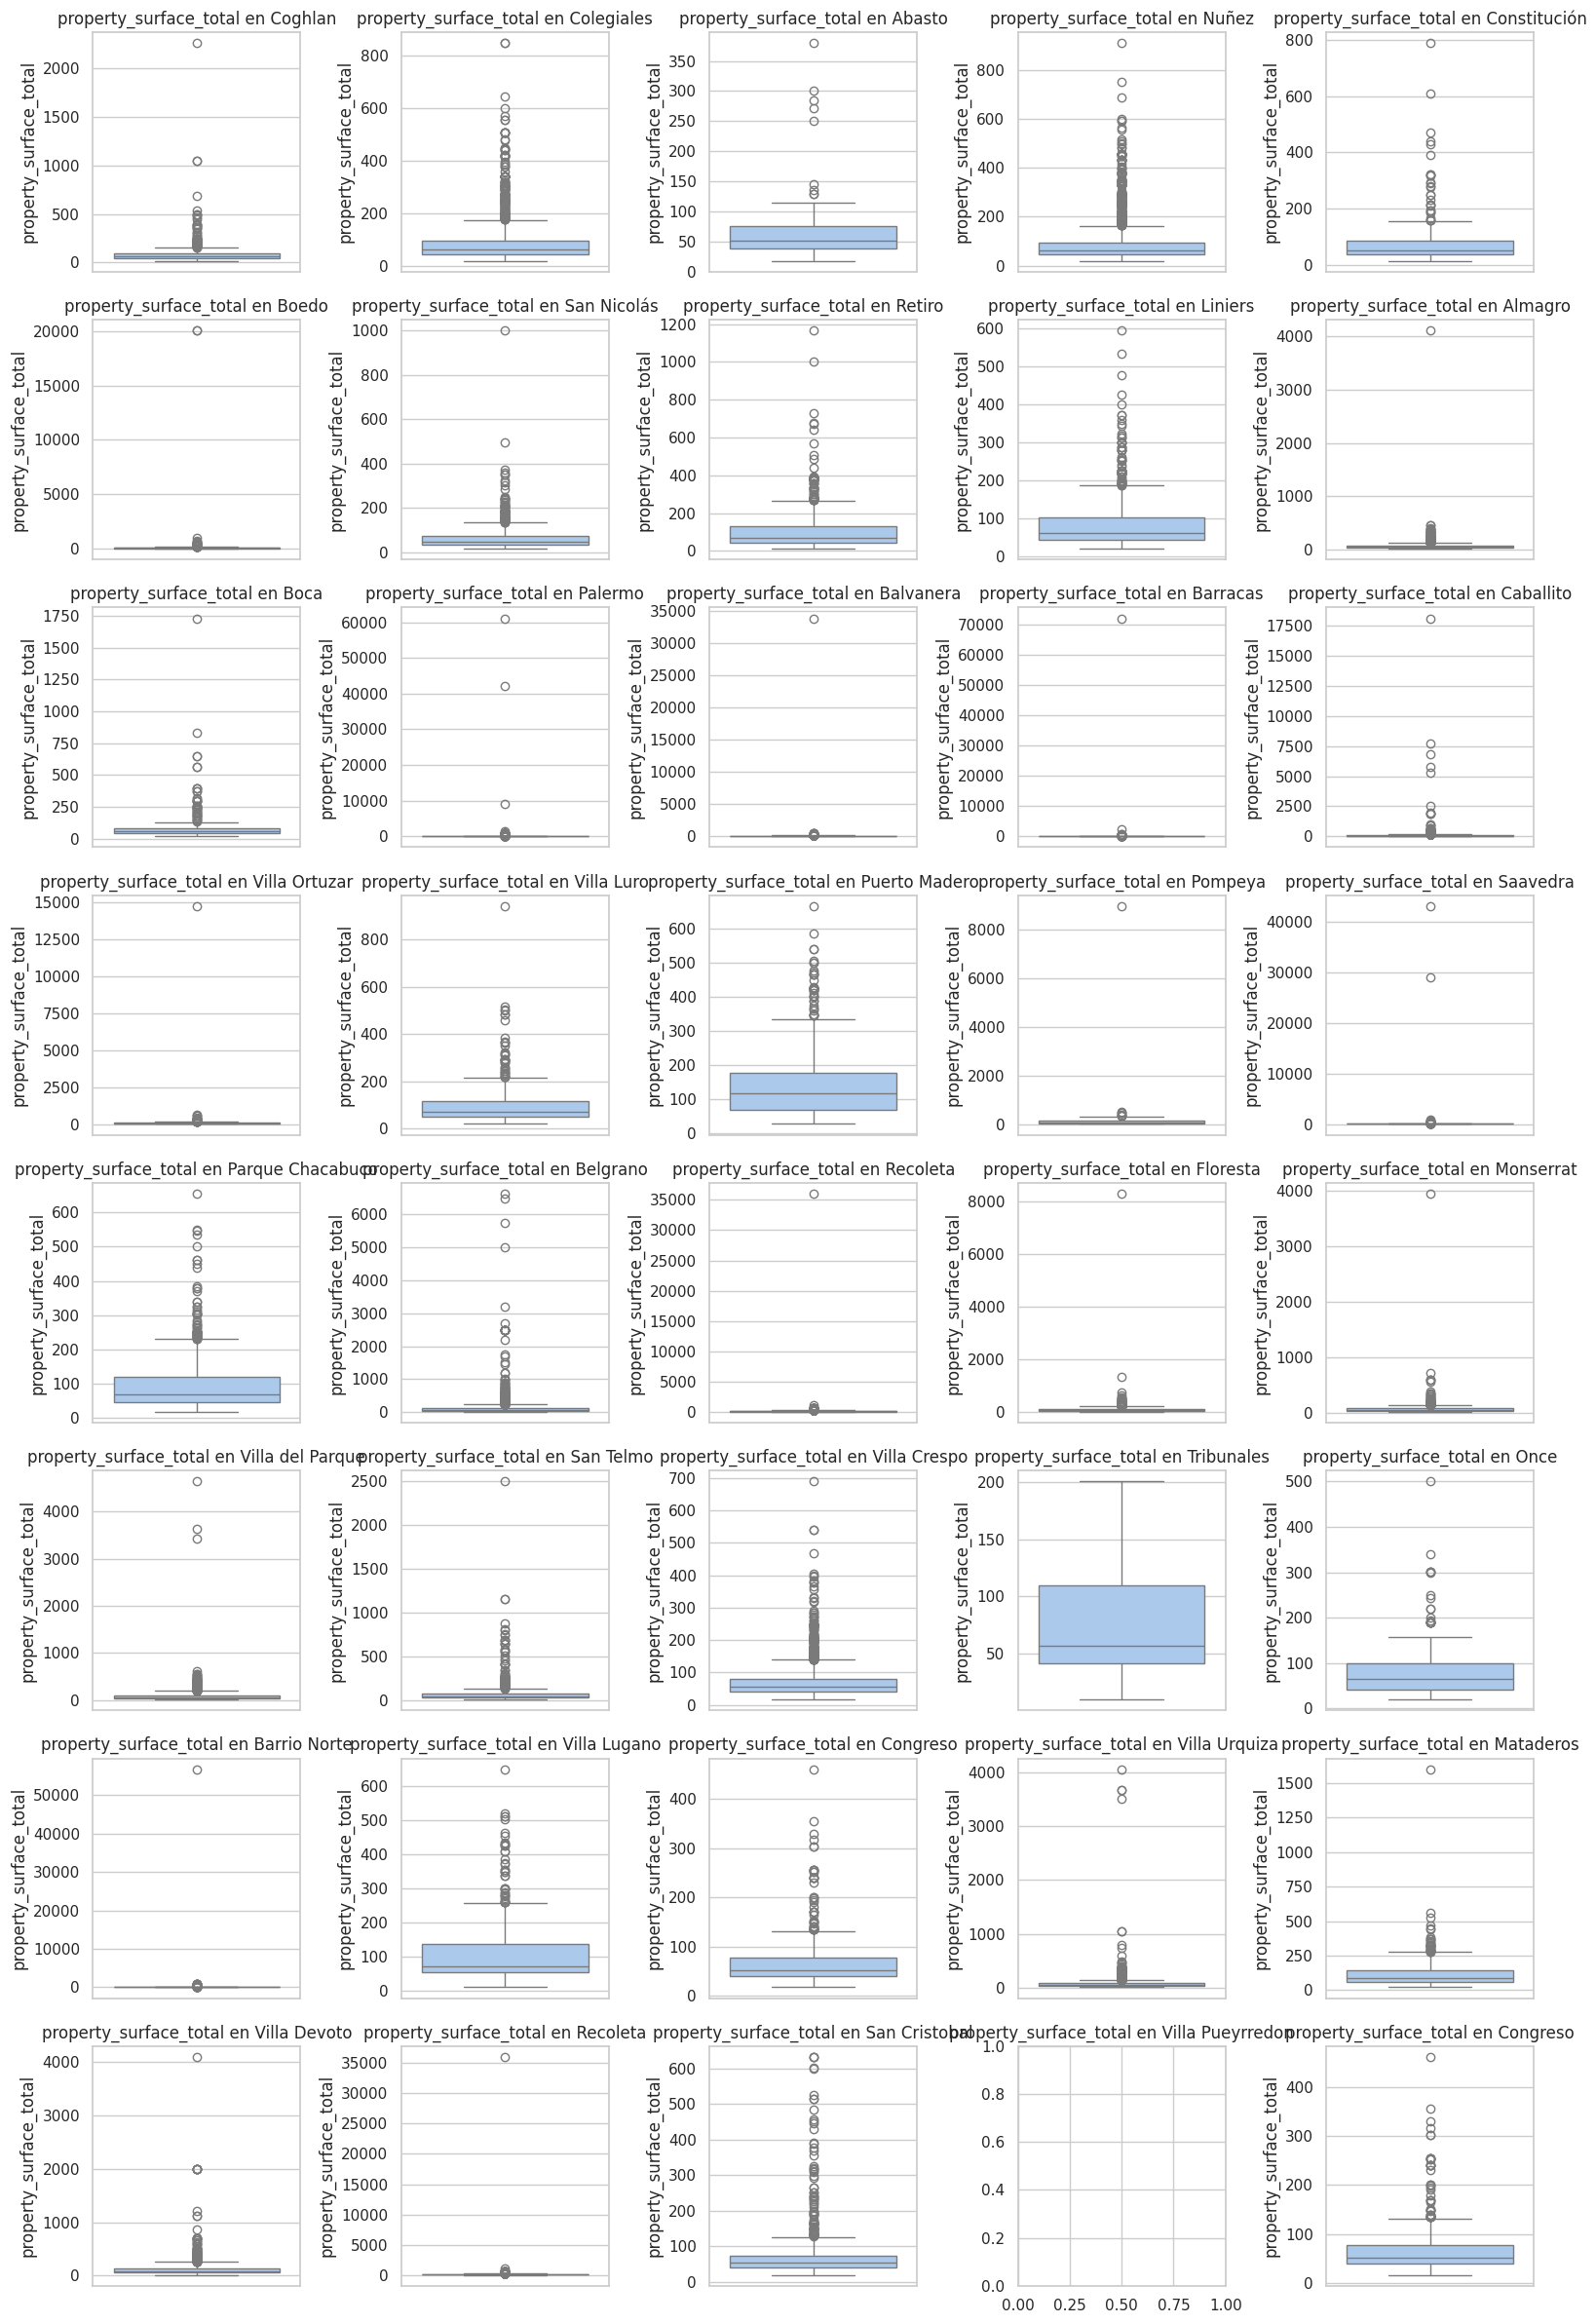

In [187]:
plot_por_barrio(ds_train, 'property_surface_total')

Podemos ver en las comparaciones de los barrios que incluso en aquellos que tienen más variaciones de tamaño de superficie total, los valores por encima de 3000 son outliers extremos, asi que normalizaremos esos valores.

In [188]:
# Corrección logaritmica
ds_train.loc[(ds_train['property_surface_total'] > 3000.0), 'property_surface_total'] = np.log(ds_train['property_surface_total'])

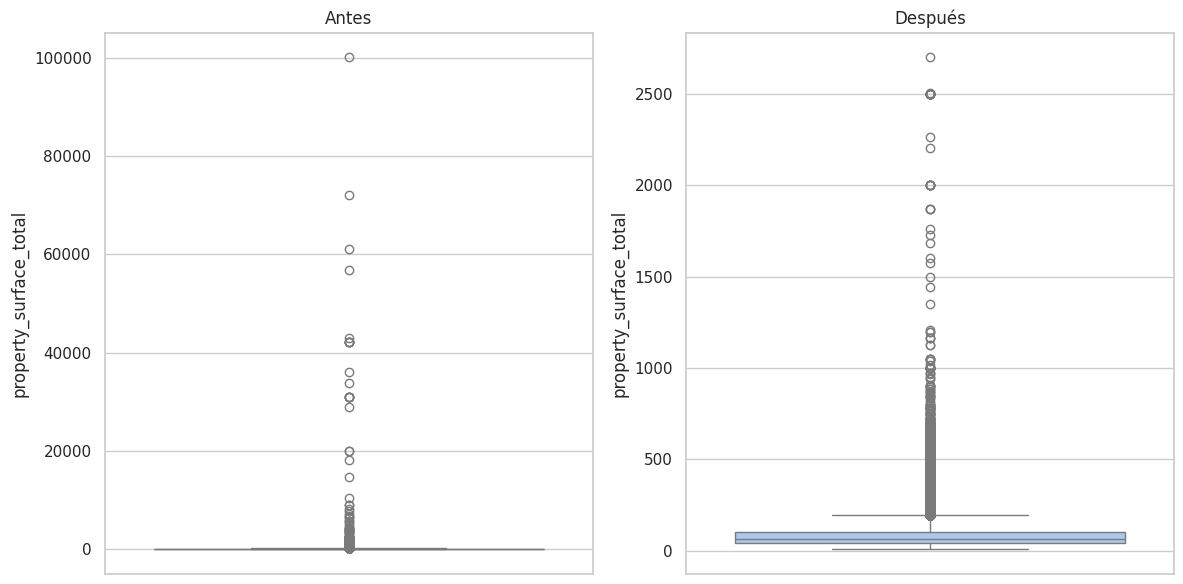

In [189]:
#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_surface_total')

**Z-Score, normal y modificado**

In [190]:
def plot_z(df, variable):
  plt.hist(df[variable])
  plt.title("Histograma Z-Score "+ variable)
  plt.xlabel("Z-Score "+variable)
  plt.tight_layout()
  plt.show()
  return

<ipython-input-191-1ce1084e760a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-191-1ce1084e760a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



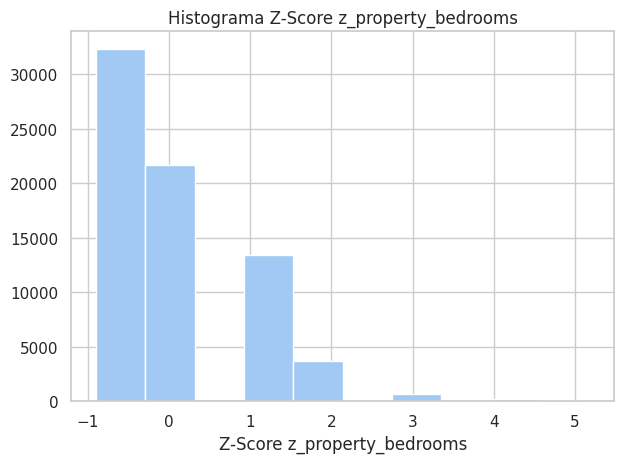

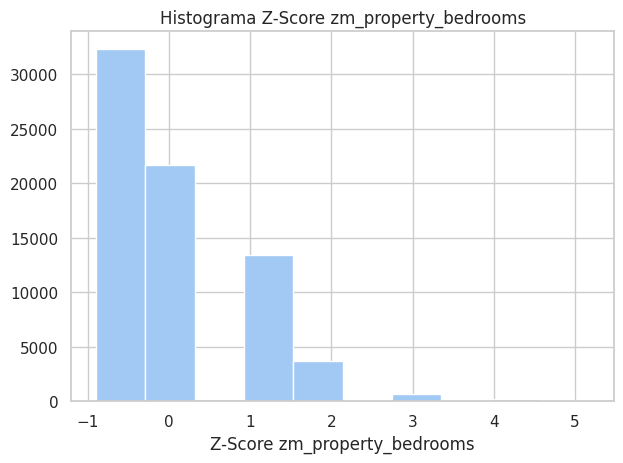

In [191]:
# Z Score property_bedrooms
ds_train['z_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)
ds_train['zm_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)

plot_z(ds_train, 'z_property_bedrooms')
plot_z(ds_train, 'zm_property_bedrooms')


In [192]:
ds_train[(ds_train['z_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
75701   4Cax7nQ+g6aCneYMhuFJKQ==  2021-04-08  2021-04-09 2021-04-08   
8807    S6CVXlEwTDGtHFSLeGFJuQ==  2021-05-18  2021-05-18 2021-05-18   
452859  wcGGECvHPt3lzy8pXAMcAw==  2021-12-16  2022-03-25 2021-12-16   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
274397  buoXoZjmTPkeXpf7Pn6syw==  2021-09-15  2021-10-07 2021-09-15   
...                          ...         ...         ...        ...   
6871    FQeAbzRt++H2i0sij+/h7g==  2021-02-09  2021-02-11 2021-02-09   
457782  zThHFYUg/ZODnN9ekjwgFg==  2021-05-08  2021-06-05 2021-05-08   
342818  mqoxNDn8Gn/UkxbHPo7iOA==  2021-08-11  2021-09-01 2021-08-11   
8210    yVZNFVsEOZNjwLjka6me8Q==  2021-05-18  2021-06-05 2021-05-18   
27014   YqBHm2FAS4C/5XDH94VDzg==  2021-12-03  2022-01-27 2021-12-03   

          latitud   longitud           place_l3 property_type  property_rooms  \
75701  -34.621988 -58.382205       Constitución          Casa        2.397895   
8807   -34.632276 -58.433577   Parque Chacabuco          Casa        2.397895   
452859 -34.613363 -58.445880          Caballito            PH        7.000000   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
274397 -34.593316 -58.377201             Retiro  Departamento        9.000000   
...           ...        ...                ...           ...             ...   
6871   -34.633226 -58.376409           Barracas          Casa        8.894634   
457782 -34.581524 -58.403588            Palermo  Departamento       10.000000   
342818 -34.616128 -58.394715          Balvanera          Casa        8.000000   
8210   -34.620755 -58.436932          Caballito            PH        7.000000   
27014  -34.561056 -58.480742           Belgrano          Casa        9.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
75701                 7.0              280.166005                     212.0   
8807                  6.0              380.000000                     350.0   
452859                6.0              199.000000                     180.0   
387679                7.0              250.000000                     250.0   
274397                7.0              380.000000                     350.0   
...                   ...                     ...                       ...   
6871                  7.0              346.288932                     265.0   
457782                6.0              520.000000                     500.0   
342818                7.0              164.000000                     143.0   
8210                  6.0              159.000000                     154.0   
27014                 6.0              509.667525                     436.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
75701         240000.0             5.174978              5.174978  
8807          330000.0             4.162945              4.162945  
452859        225000.0             4.162945              4.162945  
387679        212000.0             5.174978              5.174978  
274397        650000.0             5.174978              5.174978  
...                ...                  ...                   ...  
6871          350000.0             5.174978              5.174978  
457782       3300000.0             4.162945              4.162945  
342818        230000.0             5.174978              5.174978  
8210          325000.0             4.162945              4.162945  
27014         530000.0             4.162945              4.162945  

[264 rows x 15 columns]

In [193]:
ds_train[(ds_train['zm_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
75701   4Cax7nQ+g6aCneYMhuFJKQ==  2021-04-08  2021-04-09 2021-04-08   
8807    S6CVXlEwTDGtHFSLeGFJuQ==  2021-05-18  2021-05-18 2021-05-18   
452859  wcGGECvHPt3lzy8pXAMcAw==  2021-12-16  2022-03-25 2021-12-16   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
274397  buoXoZjmTPkeXpf7Pn6syw==  2021-09-15  2021-10-07 2021-09-15   
...                          ...         ...         ...        ...   
6871    FQeAbzRt++H2i0sij+/h7g==  2021-02-09  2021-02-11 2021-02-09   
457782  zThHFYUg/ZODnN9ekjwgFg==  2021-05-08  2021-06-05 2021-05-08   
342818  mqoxNDn8Gn/UkxbHPo7iOA==  2021-08-11  2021-09-01 2021-08-11   
8210    yVZNFVsEOZNjwLjka6me8Q==  2021-05-18  2021-06-05 2021-05-18   
27014   YqBHm2FAS4C/5XDH94VDzg==  2021-12-03  2022-01-27 2021-12-03   

          latitud   longitud           place_l3 property_type  property_rooms  \
75701  -34.621988 -58.382205       Constitución          Casa        2.397895   
8807   -34.632276 -58.433577   Parque Chacabuco          Casa        2.397895   
452859 -34.613363 -58.445880          Caballito            PH        7.000000   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
274397 -34.593316 -58.377201             Retiro  Departamento        9.000000   
...           ...        ...                ...           ...             ...   
6871   -34.633226 -58.376409           Barracas          Casa        8.894634   
457782 -34.581524 -58.403588            Palermo  Departamento       10.000000   
342818 -34.616128 -58.394715          Balvanera          Casa        8.000000   
8210   -34.620755 -58.436932          Caballito            PH        7.000000   
27014  -34.561056 -58.480742           Belgrano          Casa        9.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
75701                 7.0              280.166005                     212.0   
8807                  6.0              380.000000                     350.0   
452859                6.0              199.000000                     180.0   
387679                7.0              250.000000                     250.0   
274397                7.0              380.000000                     350.0   
...                   ...                     ...                       ...   
6871                  7.0              346.288932                     265.0   
457782                6.0              520.000000                     500.0   
342818                7.0              164.000000                     143.0   
8210                  6.0              159.000000                     154.0   
27014                 6.0              509.667525                     436.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
75701         240000.0             5.174978              5.174978  
8807          330000.0             4.162945              4.162945  
452859        225000.0             4.162945              4.162945  
387679        212000.0             5.174978              5.174978  
274397        650000.0             5.174978              5.174978  
...                ...                  ...                   ...  
6871          350000.0             5.174978              5.174978  
457782       3300000.0             4.162945              4.162945  
342818        230000.0             5.174978              5.174978  
8210          325000.0             4.162945              4.162945  
27014         530000.0             4.162945              4.162945  

[264 rows x 15 columns]

In [194]:
ds_train[(ds_train['z_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

In [195]:
ds_train[(ds_train['zm_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

Siguiendo el Z score, podemos ver que no existen outliers negativos, incluso usando un valor mínimo de -1. Usando la regla de oro de 3.5, podemos ver que si lo existen positivos y en una cantidad bastante significativa (275 registros). Vamos a ampliar ligeramente este factor.

In [196]:
ds_train[(ds_train['z_property_bedrooms'] > 5)]

id  start_date    end_date created_on  \
75701   4Cax7nQ+g6aCneYMhuFJKQ==  2021-04-08  2021-04-09 2021-04-08   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
274397  buoXoZjmTPkeXpf7Pn6syw==  2021-09-15  2021-10-07 2021-09-15   
352428  Yk5CRCwqLTNCzIiyKwuSyA==  2021-06-25  2021-08-10 2021-06-25   
351371  +1PYEdKr4JtxeylQ6qCwtw==  2021-06-25  2021-06-30 2021-06-25   
...                          ...         ...         ...        ...   
420396  O8oyYGBUdY3jPaEa1NK6Xg==  2021-12-01  2021-12-30 2021-12-01   
421589  S9r34tSB8+FE5vkjVO4w+Q==  2021-07-07  2021-08-03 2021-07-07   
457064  rWpwKlxzNHvQYcrs+sBijQ==  2021-05-08  2021-05-20 2021-05-08   
6871    FQeAbzRt++H2i0sij+/h7g==  2021-02-09  2021-02-11 2021-02-09   
342818  mqoxNDn8Gn/UkxbHPo7iOA==  2021-08-11  2021-09-01 2021-08-11   

          latitud   longitud           place_l3 property_type  property_rooms  \
75701  -34.621988 -58.382205       Constitución          Casa        2.397895   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
274397 -34.593316 -58.377201             Retiro  Departamento        9.000000   
352428 -34.593316 -58.377201             Retiro  Departamento        9.000000   
351371 -34.625901 -58.465396             Flores            PH       10.000000   
...           ...        ...                ...           ...             ...   
420396 -34.593316 -58.377201             Retiro  Departamento        9.000000   
421589 -34.604969 -58.478785   Villa del Parque          Casa        8.892720   
457064 -34.572554 -58.469842           Belgrano          Casa        8.000000   
6871   -34.633226 -58.376409           Barracas          Casa        8.894634   
342818 -34.616128 -58.394715          Balvanera          Casa        8.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
75701                 7.0              280.166005                     212.0   
387679                7.0              250.000000                     250.0   
274397                7.0              380.000000                     350.0   
352428                7.0              380.000000                     350.0   
351371                7.0              385.000000                     231.0   
...                   ...                     ...                       ...   
420396                7.0              380.000000                     350.0   
421589                7.0              440.000000                     235.0   
457064                7.0              400.000000                     400.0   
6871                  7.0              346.288932                     265.0   
342818                7.0              164.000000                     143.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
75701         240000.0             5.174978              5.174978  
387679        212000.0             5.174978              5.174978  
274397        650000.0             5.174978              5.174978  
352428        650000.0             5.174978              5.174978  
351371        245000.0             5.174978              5.174978  
...                ...                  ...                   ...  
420396        650000.0             5.174978              5.174978  
421589        260000.0             5.174978              5.174978  
457064        920000.0             5.174978              5.174978  
6871          350000.0             5.174978              5.174978  
342818        230000.0             5.174978              5.174978  

[79 rows x 15 columns]

No podemos sacar ninguna conclusión de los registros, así que esperaremos al análisis multivariado para tomar decisiones al respecto de estos outliers.

### Análisis multivariado

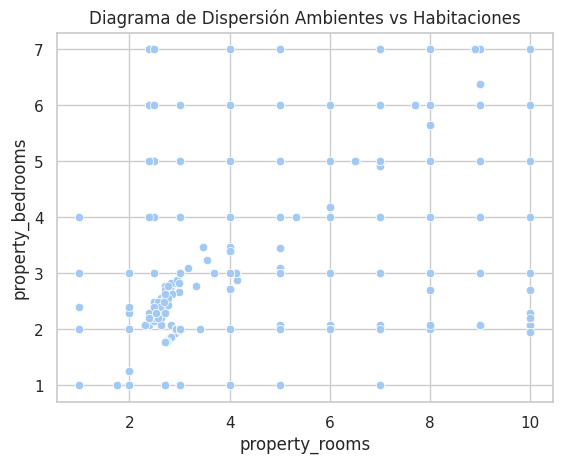

In [197]:
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones")
plt.show()

En el analisis univariado solucionamos los outliers imposibles.  

In [198]:
ds_train[(ds_train['property_rooms'] < ds_train['property_bedrooms'])]

id  start_date    end_date created_on  \
75701   4Cax7nQ+g6aCneYMhuFJKQ==  2021-04-08  2021-04-09 2021-04-08   
137659  mAzAqXdmAZYrERB6k3F51w==  2021-01-22  2021-08-31 2021-01-22   
158419  MhpIRj/S1WElERJxfCx6Lg==  2021-05-26  2021-06-05 2021-05-26   
8807    S6CVXlEwTDGtHFSLeGFJuQ==  2021-05-18  2021-05-18 2021-05-18   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
...                          ...         ...         ...        ...   
256054  p9fZU+NpJf8X7OeTQU4qSg==  2021-11-03  2022-09-17 2021-11-03   
422322  +vPPcdUiRAfJw/r3pJhEDQ==  2021-07-07  9999-12-31 2021-07-07   
84147   fMWvtL8AM9C46nTizyJ0SQ==  2021-02-05  2021-03-25 2021-02-05   
115485  hrKv65SUn9Qf8dlGuPYhHw==  2021-12-07  2022-01-27 2021-12-07   
351393  s8NLQW2usptaxGZ6sDRJEw==  2021-06-25  9999-12-31 2021-06-25   

          latitud   longitud           place_l3 property_type  property_rooms  \
75701  -34.621988 -58.382205       Constitución          Casa        2.397895   
137659 -34.585134 -58.394394           Recoleta  Departamento        3.000000   
158419 -34.639591 -58.442952   Parque Chacabuco            PH        3.000000   
8807   -34.632276 -58.433577   Parque Chacabuco          Casa        2.397895   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
...           ...        ...                ...           ...             ...   
256054 -34.609558 -58.419209            Almagro  Departamento        2.397895   
422322 -34.629807 -58.484938           Floresta  Departamento        3.000000   
84147  -34.614128 -58.437675          Caballito  Departamento        4.000000   
115485 -34.613261 -58.361513      Puerto Madero  Departamento        3.000000   
351393 -34.587317 -58.417180            Palermo            PH        2.397895   

        property_bedrooms  property_surface_total  property_surface_covered  \
75701                 7.0              280.166005                212.000000   
137659                4.0               79.000000                 69.000000   
158419                5.0              117.000000                 98.000000   
8807                  6.0              380.000000                350.000000   
387679                7.0              250.000000                250.000000   
...                   ...                     ...                       ...   
256054                5.0              239.000000                239.000000   
422322                4.0              147.166656                 92.000000   
84147                 5.0               82.000000                 75.000000   
115485                4.0              170.000000                166.000000   
351393                5.0              525.000000                413.387465   

        property_price  z_property_bedrooms  zm_property_bedrooms  
75701         240000.0             5.174978              5.174978  
137659        300000.0             2.138879              2.138879  
158419        127000.0             3.150912              3.150912  
8807          330000.0             4.162945              4.162945  
387679        212000.0             5.174978              5.174978  
...                ...                  ...                   ...  
256054        425000.0             3.150912              3.150912  
422322        185000.0             2.138879              2.138879  
84147         179000.0             3.150912              3.150912  
115485       1250000.0             2.138879              2.138879  
351393        980000.0             3.150912              3.150912  

[123 rows x 15 columns]

Tenemos 130 registros en los que el número de habitaciones es mayor que el de ambientes.

In [199]:
# Caso: más habitaciones que ambientes
condition= (ds_train['property_rooms'] < ds_train['property_bedrooms'])
ds_train[condition]

id  start_date    end_date created_on  \
75701   4Cax7nQ+g6aCneYMhuFJKQ==  2021-04-08  2021-04-09 2021-04-08   
137659  mAzAqXdmAZYrERB6k3F51w==  2021-01-22  2021-08-31 2021-01-22   
158419  MhpIRj/S1WElERJxfCx6Lg==  2021-05-26  2021-06-05 2021-05-26   
8807    S6CVXlEwTDGtHFSLeGFJuQ==  2021-05-18  2021-05-18 2021-05-18   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
...                          ...         ...         ...        ...   
256054  p9fZU+NpJf8X7OeTQU4qSg==  2021-11-03  2022-09-17 2021-11-03   
422322  +vPPcdUiRAfJw/r3pJhEDQ==  2021-07-07  9999-12-31 2021-07-07   
84147   fMWvtL8AM9C46nTizyJ0SQ==  2021-02-05  2021-03-25 2021-02-05   
115485  hrKv65SUn9Qf8dlGuPYhHw==  2021-12-07  2022-01-27 2021-12-07   
351393  s8NLQW2usptaxGZ6sDRJEw==  2021-06-25  9999-12-31 2021-06-25   

          latitud   longitud           place_l3 property_type  property_rooms  \
75701  -34.621988 -58.382205       Constitución          Casa        2.397895   
137659 -34.585134 -58.394394           Recoleta  Departamento        3.000000   
158419 -34.639591 -58.442952   Parque Chacabuco            PH        3.000000   
8807   -34.632276 -58.433577   Parque Chacabuco          Casa        2.397895   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        5.000000   
...           ...        ...                ...           ...             ...   
256054 -34.609558 -58.419209            Almagro  Departamento        2.397895   
422322 -34.629807 -58.484938           Floresta  Departamento        3.000000   
84147  -34.614128 -58.437675          Caballito  Departamento        4.000000   
115485 -34.613261 -58.361513      Puerto Madero  Departamento        3.000000   
351393 -34.587317 -58.417180            Palermo            PH        2.397895   

        property_bedrooms  property_surface_total  property_surface_covered  \
75701                 7.0              280.166005                212.000000   
137659                4.0               79.000000                 69.000000   
158419                5.0              117.000000                 98.000000   
8807                  6.0              380.000000                350.000000   
387679                7.0              250.000000                250.000000   
...                   ...                     ...                       ...   
256054                5.0              239.000000                239.000000   
422322                4.0              147.166656                 92.000000   
84147                 5.0               82.000000                 75.000000   
115485                4.0              170.000000                166.000000   
351393                5.0              525.000000                413.387465   

        property_price  z_property_bedrooms  zm_property_bedrooms  
75701         240000.0             5.174978              5.174978  
137659        300000.0             2.138879              2.138879  
158419        127000.0             3.150912              3.150912  
8807          330000.0             4.162945              4.162945  
387679        212000.0             5.174978              5.174978  
...                ...                  ...                   ...  
256054        425000.0             3.150912              3.150912  
422322        185000.0             2.138879              2.138879  
84147         179000.0             3.150912              3.150912  
115485       1250000.0             2.138879              2.138879  
351393        980000.0             3.150912              3.150912  

[123 rows x 15 columns]

Varios de estos registros tienen valores irracionales para una habitación (2.397... en vez de números enteros) y podrían haber sido resultados de imputaciones y transformaciones anteriores.
Una solución podría ser copiar los valores de habitaciones a ambientes, pero previniendo que algunos puedan ser valores verdaderos y para que no se pierdan, probaremos invirtiendo las columnas de estos casos en específico ya que muchos tienen sentido de esa manera (casas con 6 ambientes y 4 habitaciones, departamentos de 2 ambientes y una habitación, por dar unos ejemplos). Es un cambio riesgoso pero se tendrá en cuenta por si llegara a haber discrepancias en resultados futuros.

In [200]:
# Creamos una máscara booleana para nuestra condición
mask = ds_train['property_rooms'] < ds_train['property_bedrooms']

# Invertimos los valores usando la máscara
ds_train.loc[mask, ['property_rooms', 'property_bedrooms']] = ds_train.loc[mask, ['property_bedrooms', 'property_rooms']].values


In [201]:
ds_train[(ds_train['z_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
75701   4Cax7nQ+g6aCneYMhuFJKQ==  2021-04-08  2021-04-09 2021-04-08   
8807    S6CVXlEwTDGtHFSLeGFJuQ==  2021-05-18  2021-05-18 2021-05-18   
452859  wcGGECvHPt3lzy8pXAMcAw==  2021-12-16  2022-03-25 2021-12-16   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 2021-03-30   
274397  buoXoZjmTPkeXpf7Pn6syw==  2021-09-15  2021-10-07 2021-09-15   
...                          ...         ...         ...        ...   
6871    FQeAbzRt++H2i0sij+/h7g==  2021-02-09  2021-02-11 2021-02-09   
457782  zThHFYUg/ZODnN9ekjwgFg==  2021-05-08  2021-06-05 2021-05-08   
342818  mqoxNDn8Gn/UkxbHPo7iOA==  2021-08-11  2021-09-01 2021-08-11   
8210    yVZNFVsEOZNjwLjka6me8Q==  2021-05-18  2021-06-05 2021-05-18   
27014   YqBHm2FAS4C/5XDH94VDzg==  2021-12-03  2022-01-27 2021-12-03   

          latitud   longitud           place_l3 property_type  property_rooms  \
75701  -34.621988 -58.382205       Constitución          Casa        7.000000   
8807   -34.632276 -58.433577   Parque Chacabuco          Casa        6.000000   
452859 -34.613363 -58.445880          Caballito            PH        7.000000   
387679 -34.650156 -58.473353  Parque Avellaneda          Casa        7.000000   
274397 -34.593316 -58.377201             Retiro  Departamento        9.000000   
...           ...        ...                ...           ...             ...   
6871   -34.633226 -58.376409           Barracas          Casa        8.894634   
457782 -34.581524 -58.403588            Palermo  Departamento       10.000000   
342818 -34.616128 -58.394715          Balvanera          Casa        8.000000   
8210   -34.620755 -58.436932          Caballito            PH        7.000000   
27014  -34.561056 -58.480742           Belgrano          Casa        9.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
75701            2.397895              280.166005                     212.0   
8807             2.397895              380.000000                     350.0   
452859           6.000000              199.000000                     180.0   
387679           5.000000              250.000000                     250.0   
274397           7.000000              380.000000                     350.0   
...                   ...                     ...                       ...   
6871             7.000000              346.288932                     265.0   
457782           6.000000              520.000000                     500.0   
342818           7.000000              164.000000                     143.0   
8210             6.000000              159.000000                     154.0   
27014            6.000000              509.667525                     436.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
75701         240000.0             5.174978              5.174978  
8807          330000.0             4.162945              4.162945  
452859        225000.0             4.162945              4.162945  
387679        212000.0             5.174978              5.174978  
274397        650000.0             5.174978              5.174978  
...                ...                  ...                   ...  
6871          350000.0             5.174978              5.174978  
457782       3300000.0             4.162945              4.162945  
342818        230000.0             5.174978              5.174978  
8210          325000.0             4.162945              4.162945  
27014         530000.0             4.162945              4.162945  

[264 rows x 15 columns]

267 registros permanecen como outliers.

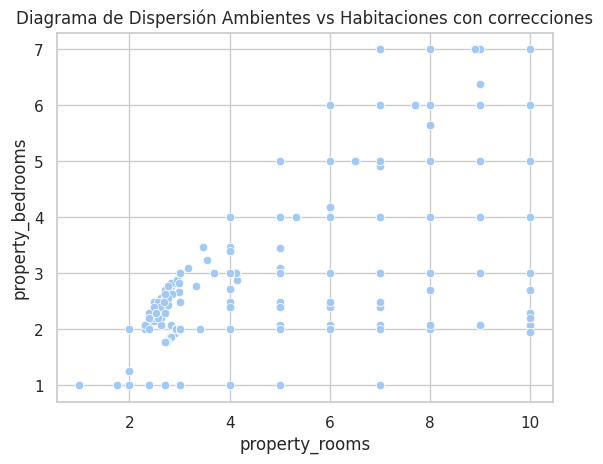

In [202]:
# Visualización después de correcciones
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones con correcciones")
plt.show()


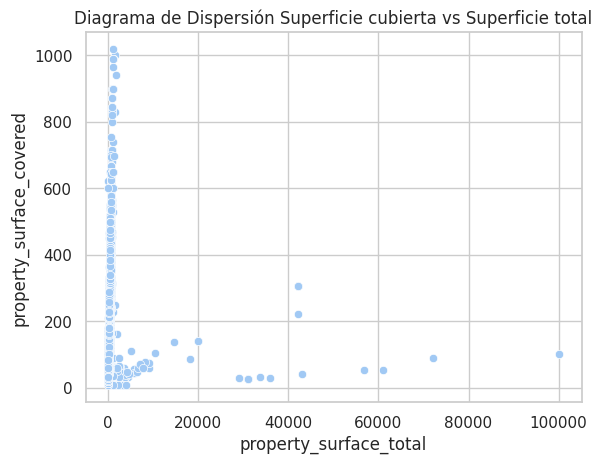

In [203]:
sns.scatterplot(y=ds_train["property_surface_covered"], x=df["property_surface_total"])
plt.title("Diagrama de Dispersión Superficie cubierta vs Superficie total")
plt.show()

En primer lugar, vamos a distinguir los casos triviales donde la superficie cubierta es mayor a la superficie total.

In [204]:
# Casos donde la superficie cubierta es mayor a la total
ds_train[(ds_train['property_surface_total'] < ds_train['property_surface_covered'])]

id  start_date    end_date created_on  \
443053  Rjf3zBOyGiu0UTFFScRopQ==  2021-05-07  2021-06-05 2021-05-07   
268068  HcuOl/mEtXm1eP5OLamI5g==  2021-07-09  2021-11-13 2021-07-09   
78899   ypM54y4O2sb5zpUTv6ud+Q==  2021-11-10  2022-01-27 2021-11-10   
436642  bIjhlpJyvWmE3s9uX45SJg==  2021-08-25  2022-01-27 2021-08-25   
31952   Nfd7Gjbn0ebwGLxA8b3G6Q==  2021-05-17  2021-06-05 2021-05-17   
...                          ...         ...         ...        ...   
439412  RgOiiMdoD/02MF3OpydV0g==  2021-04-23  2021-06-05 2021-04-23   
377495  ZZ+hmbX5nep4TgDOUKoTDw==  2021-03-16  2021-06-05 2021-03-16   
313224  oRsrKyj/oSR6oQNFyEb54g==  2021-06-14  9999-12-31 2021-06-14   
188525  xcaRQVvNpokQT+YjCUbGfQ==  2021-03-21  2021-06-05 2021-03-21   
76758   JEax5wkwpBL2EVcub77PrA==  2021-07-17  2022-04-15 2021-07-17   

          latitud   longitud      place_l3 property_type  property_rooms  \
443053 -34.602359 -58.436489  Villa Crespo  Departamento        2.711791   
268068 -34.636829 -58.376528      Barracas  Departamento        3.000000   
78899  -34.605503 -58.407089          Once  Departamento        3.000000   
436642 -34.602009 -58.391545   San Nicolás  Departamento        2.000000   
31952  -34.608354 -58.419615       Almagro  Departamento        3.000000   
...           ...        ...           ...           ...             ...   
439412 -34.602632 -58.428399  Villa Crespo  Departamento        3.000000   
377495 -34.581103 -58.432997       Palermo  Departamento        2.712181   
313224 -34.590242 -58.423995       Palermo  Departamento        3.000000   
188525 -34.605451 -58.388597      Congreso  Departamento        5.000000   
76758  -34.583652 -58.402859      Recoleta  Departamento        3.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
443053           1.773339                    34.0                 47.096255   
268068           2.000000                    55.0                 61.536268   
78899            2.000000                    65.0                 66.342694   
436642           1.000000                    31.0                 35.747542   
31952            2.000000                    62.0                 64.900766   
...                   ...                     ...                       ...   
439412           2.000000                    54.0                 61.055625   
377495           1.773699                    44.0                 51.908691   
313224           2.000000                    61.0                 64.420123   
188525           4.000000                    87.0                105.423438   
76758            2.000000                    75.0                 88.000000   

        property_price  z_property_bedrooms  zm_property_bedrooms  
443053         75000.0            -0.114575             -0.114575  
268068         90000.0             0.114813              0.114813  
78899         105000.0             0.114813              0.114813  
436642         60000.0            -0.897220             -0.897220  
31952         179000.0             0.114813              0.114813  
...                ...                  ...                   ...  
439412        125000.0             0.114813              0.114813  
377495        132000.0            -0.114211             -0.114211  
313224        198900.0             0.114813              0.114813  
188525         75000.0             2.138879              2.138879  
76758         170000.0             0.114813              0.114813  

[725 rows x 15 columns]

**Isolation forest**

In [205]:
# Cargo los datos
X =ds_train.copy()
X.head()

id  start_date    end_date created_on  \
452830  AUtJifYEQ/s3dG0NpXBbIQ==  2021-12-16  2022-02-09 2021-12-16   
444054  NfZ/vOwlYFo4UeI89bzZGA==  2021-11-09  2022-01-27 2021-11-09   
116180  +EArPaiD7rrNoBtoaMpzVA==  2021-11-12  2022-01-27 2021-11-12   
129763  +XDrDNeV38RPqAhEPCYJMw==  2021-09-11  2021-09-14 2021-09-11   
169860  1Ua0cL5f8tXkQrkeyxxfsw==  2021-07-28  2021-12-15 2021-07-28   

          latitud   longitud   place_l3 property_type  property_rooms  \
452830 -34.608810 -58.431124  Caballito            PH             4.0   
444054 -34.617845 -58.435811  Caballito  Departamento             3.0   
116180 -34.585271 -58.412706    Palermo  Departamento             2.0   
129763 -34.571179 -58.431863    Palermo  Departamento             7.0   
169860 -34.603915 -58.416817    Almagro  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
452830                4.0                    96.0                 84.000000   
444054                2.0                   109.0                 87.490968   
116180                1.0                    31.0                 30.000000   
129763                4.0                   425.0                400.000000   
169860                3.0                    86.0                 72.000000   

        property_price  z_property_bedrooms  zm_property_bedrooms  
452830        169900.0             2.138879              2.138879  
444054        229000.0             0.114813              0.114813  
116180         77000.0            -0.897220             -0.897220  
129763       2100000.0             2.138879              2.138879  
169860        140000.0             1.126846              1.126846

In [206]:
# Limpio el dataset
X.drop(columns=['latitud', 'longitud', 'created_on', 'end_date', 'start_date', 'z_property_bedrooms', 'zm_property_bedrooms'], inplace=True)
X.head()

id   place_l3 property_type  property_rooms  \
452830  AUtJifYEQ/s3dG0NpXBbIQ==  Caballito            PH             4.0   
444054  NfZ/vOwlYFo4UeI89bzZGA==  Caballito  Departamento             3.0   
116180  +EArPaiD7rrNoBtoaMpzVA==    Palermo  Departamento             2.0   
129763  +XDrDNeV38RPqAhEPCYJMw==    Palermo  Departamento             7.0   
169860  1Ua0cL5f8tXkQrkeyxxfsw==    Almagro  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
452830                4.0                    96.0                 84.000000   
444054                2.0                   109.0                 87.490968   
116180                1.0                    31.0                 30.000000   
129763                4.0                   425.0                400.000000   
169860                3.0                    86.0                 72.000000   

        property_price  
452830        169900.0  
444054        229000.0  
116180         77000.0  
129763       2100000.0  
169860        140000.0

In [207]:
# Label encoding de los nombres de las ciudades y el tipo de propiedad

label_encoder = LabelEncoder()
X['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
ds_train['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
X['type_encoded'] = label_encoder.fit_transform(X['property_type'])
ds_train['type_encoded'] = label_encoder.fit_transform(X['place_l3'])

X

<ipython-input-207-64ff5b082a66>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-207-64ff5b082a66>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id       place_l3 property_type  property_rooms  \
452830  AUtJifYEQ/s3dG0NpXBbIQ==      Caballito            PH             4.0   
444054  NfZ/vOwlYFo4UeI89bzZGA==      Caballito  Departamento             3.0   
116180  +EArPaiD7rrNoBtoaMpzVA==        Palermo  Departamento             2.0   
129763  +XDrDNeV38RPqAhEPCYJMw==        Palermo  Departamento             7.0   
169860  1Ua0cL5f8tXkQrkeyxxfsw==        Almagro  Departamento             4.0   
...                          ...            ...           ...             ...   
154998  bqZ5s9i77rNkyaHHRFinBw==    San Nicolás  Departamento             2.0   
271306  p92KjXK/brqwngogIjoZcA==   Villa Devoto            PH             4.0   
43892   /cFsfpIxo7JTMWIcev5ILQ==        Palermo  Departamento             3.0   
227893  VJhTYFSLpZ6E4WOBgfGhSQ==        Palermo  Departamento             3.0   
164419  CEdxceR3TzBuO2l+ghvf4w==  San Cristobal  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
452830                4.0               96.000000                 84.000000   
444054                2.0              109.000000                 87.490968   
116180                1.0               31.000000                 30.000000   
129763                4.0              425.000000                400.000000   
169860                3.0               86.000000                 72.000000   
...                   ...                     ...                       ...   
154998                1.0               50.703824                 40.000000   
271306                3.0              135.000000                108.000000   
43892                 2.0               60.000000                 55.000000   
227893                2.0              109.000000                 74.000000   
164419                1.0               37.000000                 37.000000   

        property_price  place_encoded  type_encoded  
452830        169900.0             10             2  
444054        229000.0             10             1  
116180         77000.0             27             1  
129763       2100000.0             27             1  
169860        140000.0              2             1  
...                ...            ...           ...  
154998        110000.0             40             1  
271306        280000.0             46             2  
43892         143000.0             27             1  
227893        298000.0             27             1  
164419         79000.0             39             1  

[72235 rows x 10 columns]

In [208]:
X.drop(columns=['place_l3', 'property_type', 'id'], inplace=True)

In [209]:
# Creo el modelo
iforest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=5,
    bootstrap=False,
    n_jobs=-1,
    random_state=1,
)

# Entreno y genero la predicción
pred = iforest.fit_predict(X)

# Almaceno scores y etiquetas
X["scores"] = iforest.decision_function(X)
X["outlier_label"] = pred

# Observaciones anómalas
X[X.outlier_label == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



property_rooms  property_bedrooms  property_surface_total  \
129763             7.0           4.000000              425.000000   
368609             5.0           4.000000              400.000000   
75701              7.0           2.397895              280.166005   
88544              5.0           4.000000              312.000000   
372210             4.0           4.000000              167.000000   
...                ...                ...                     ...   
260404             5.0           3.000000              535.000000   
210381             6.0           5.000000              500.000000   
267010             6.0           5.000000              102.000000   
20798              5.0           4.000000              363.000000   
315069             5.0           4.000000              211.000000   

        property_surface_covered  property_price  place_encoded  type_encoded  \
129763                     400.0       2100000.0             27             1   
368609                     400.0       4000000.0             27             1   
75701                      212.0        240000.0             17             0   
88544                      255.0        460000.0              7             0   
372210                     167.0        170000.0             56             0   
...                          ...             ...            ...           ...   
260404                     220.0       2800000.0             27             1   
210381                     470.0       2950000.0             35             1   
267010                      87.0        200000.0             45             2   
20798                      295.0       1400000.0              7             1   
315069                     211.0        100000.0             52             0   

          scores  outlier_label  
129763 -0.098056             -1  
368609 -0.113435             -1  
75701  -0.032773             -1  
88544  -0.038048             -1  
372210 -0.008379             -1  
...          ...            ...  
260404 -0.082446             -1  
210381 -0.157704             -1  
267010 -0.000268             -1  
20798  -0.066924             -1  
315069 -0.016447             -1  

[3612 rows x 9 columns]

In [210]:
# Cantidad de obs. anómalas
X.outlier_label.value_counts()

outlier_label
 1    68623
-1     3612
Name: count, dtype: int64

Obtuvimos 3611 anomalías. Visualizamos.

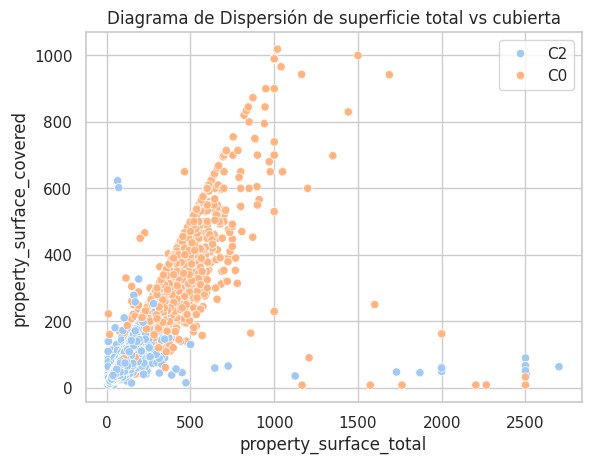

In [211]:
# Grafico dispersograma
color = [f"C{n+1}" for n in (X["outlier_label"].values)]

sns.scatterplot(x=X["property_surface_total"], y=X["property_surface_covered"], hue=color)
plt.title("Diagrama de Dispersión de superficie total vs cubierta")
plt.show()

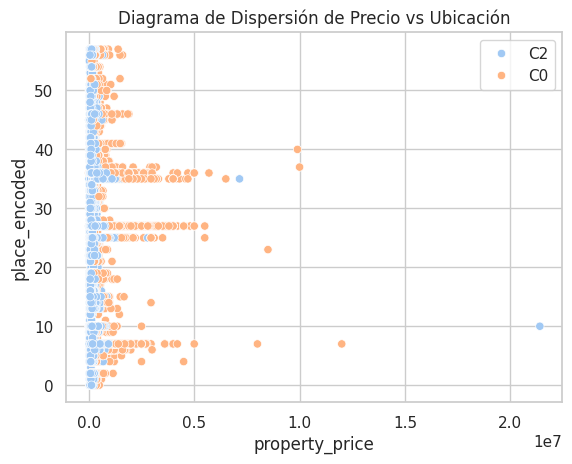

In [212]:
sns.scatterplot(x=X["property_price"], y=X["place_encoded"], hue=color)
plt.title("Diagrama de Dispersión de Precio vs Ubicación")
plt.show()

In [213]:
# # Selecciono el árbol
# estimator = iforest.estimators_[5]

# # Grafico
# plt.figure(figsize=(25, 25))
# sk.tree.plot_tree(estimator, feature_names=X.columns, filled=True, max_depth=3)
# plt.show()

PENDIENTE no se que hacer con estos resultados :))))

**LOF**

Vamos a intentar detectar outliers multivariados usando LOF.

In [214]:
def lof(df, var1, var2, name):
  radius = calculo_lof(df, var1, var2, name)
  grafico_lof(df, var1, var2, name, radius)
  return


def calculo_lof(df, var1, var2, name):
  # CÁLCULO
  # Conjunto de entrenamiento
  X = df[[var1, var2]].values

  # Creo el clasificador
  clf = LocalOutlierFactor(n_neighbors=20)

  # Genero prediccion
  y_pred = clf.fit_predict(X)

  # Guardo los scores
  df[name] = clf.negative_outlier_factor_

  #VISUALIZACION
  # Calculo radio para plotear score
  radius = (df[name].max() - df[name]) / (df[name].max() - df[name].min())
  return radius


def grafico_lof(df, var1, var2, name, radius):
  # Grafico LOF
  plt.figure(figsize=(10, 10))
  plt.title("Local Outlier Factor (LOF)" + name)
  plt.scatter(
      df[var1].values,
      df[var2].values,
      edgecolor="grey",
      s=30,
      label="datos",
      facecolors="none",
  )
  plt.scatter(
      df[var1].values,
      df[var2].values,
      s=1300 * radius,
      edgecolors="red",
      facecolors="none",
      label="Outlier scores",
  )
  legend = plt.legend(loc="upper left")
  legend.legendHandles[0]._sizes = [10]
  legend.legendHandles[1]._sizes = [20]
  plt.show()
  return

In [215]:
def lof_per_barrio(df, var1, var2, name):
  # Lista de barrios
  barrios = ['Coghlan','Colegiales','Abasto','Nuñez','Constitución',
              'Boedo', 'San Nicolás', 'Retiro', 'Liniers', 'Almagro',
              'Boca', 'Palermo', 'Balvanera','Barracas', 'Caballito',
              'Villa Ortuzar', 'Villa Luro', 'Puerto Madero', 'Pompeya', 'Saavedra',
              'Parque Chacabuco', 'Belgrano', 'Recoleta', 'Floresta', 'Monserrat',
              'Villa del Parque', 'San Telmo', 'Villa Crespo', 'Tribunales', 'Once',
              'Barrio Norte', 'Villa Lugano', 'Congreso', 'Villa Urquiza', 'Mataderos',
              'Villa Devoto', 'Recoleta', 'San Cristobal', 'Villa Pueyrredon', 'Congreso']

  # Subplots
  fig, axs = plt.subplots(8, 5, figsize=(16, 24))
  axs = axs.flatten()

  for i, barrio in enumerate(barrios):
      filtered_data = ds_train[ds_train['place_l3'] == barrio]

      # CÁLCULO
      # Conjunto de entrenamiento
      X = filtered_data[var1,var2].values
      # Creo el clasificador
      clf = LocalOutlierFactor(n_neighbors=20)
      # Genero prediccion
      y_pred = clf.fit_predict(X)
      # Guardo los scores
      filtered_data[name] = clf.negative_outlier_factor_

      #VISUALIZACION
      # Calculo radio para plotear score
      radius = (filtered_data[name].max() - filtered_data[name]) / (filtered_data[name].max() - filtered_data[name].min())

      # Grafico LOF
      plt.figure(figsize=(10, 10))
      plt.scatter(
          filtered_data[var1].values,
          filtered_data[var2].values,
          edgecolor="grey",
          s=30,
          label="datos",
          facecolors="none",
      )
      plt.scatter(
          filtered_data[var1].values,
          filtered_data[var2].values,
          s=1300 * radius,
          edgecolors="red",
          facecolors="none",
          label="Outlier scores",
      )
      legend = plt.legend(loc="upper left")
      legend.legendHandles[0]._sizes = [10]
      legend.legendHandles[1]._sizes = [20]


      axs[i].set_title(f'{var1}, {var2} en {barrio}')

  # Adjust layout
  plt.tight_layout()
  # Show the plot
  plt.show()
  return

#### Superficie cubierta vs superficie total

<ipython-input-214-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-214-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-214-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



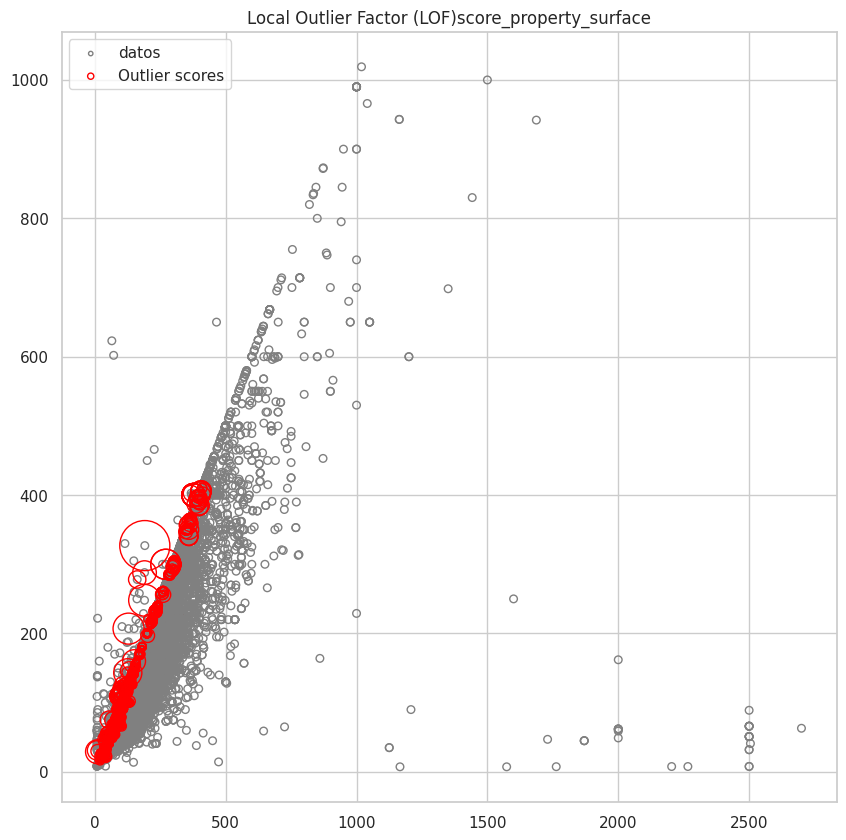

In [216]:
lof(ds_train, 'property_surface_total', 'property_surface_covered', 'score_property_surface')

Precio vs Superficie total

<ipython-input-214-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-214-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-214-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



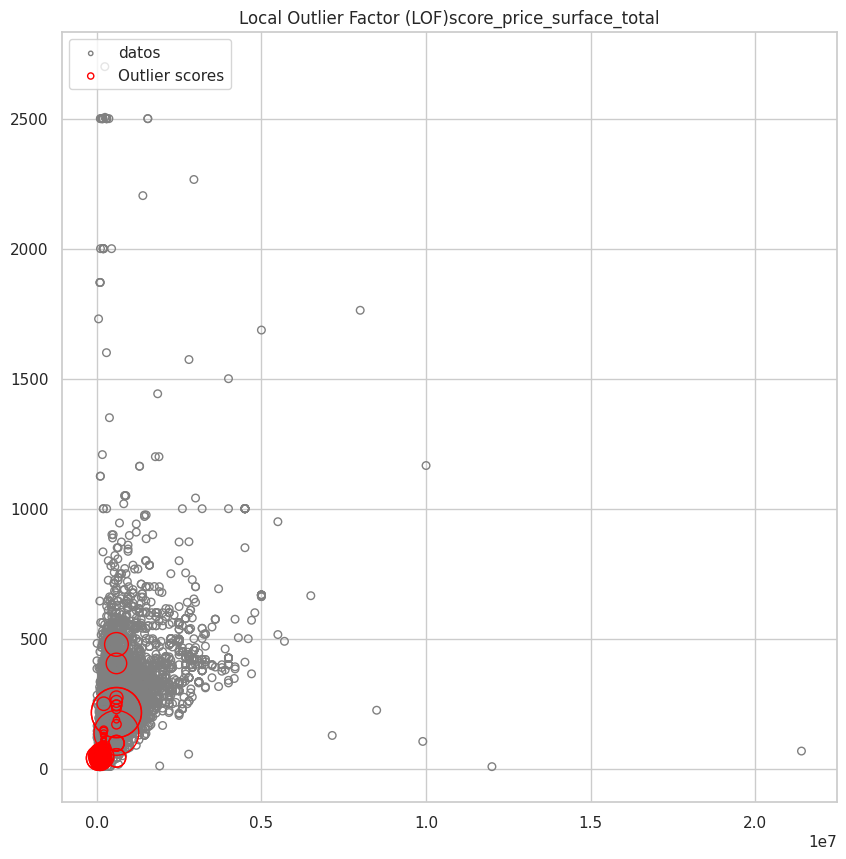

In [217]:
lof(ds_train, 'property_price', 'property_surface_total', 'score_price_surface_total')

<ipython-input-214-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-214-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-214-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



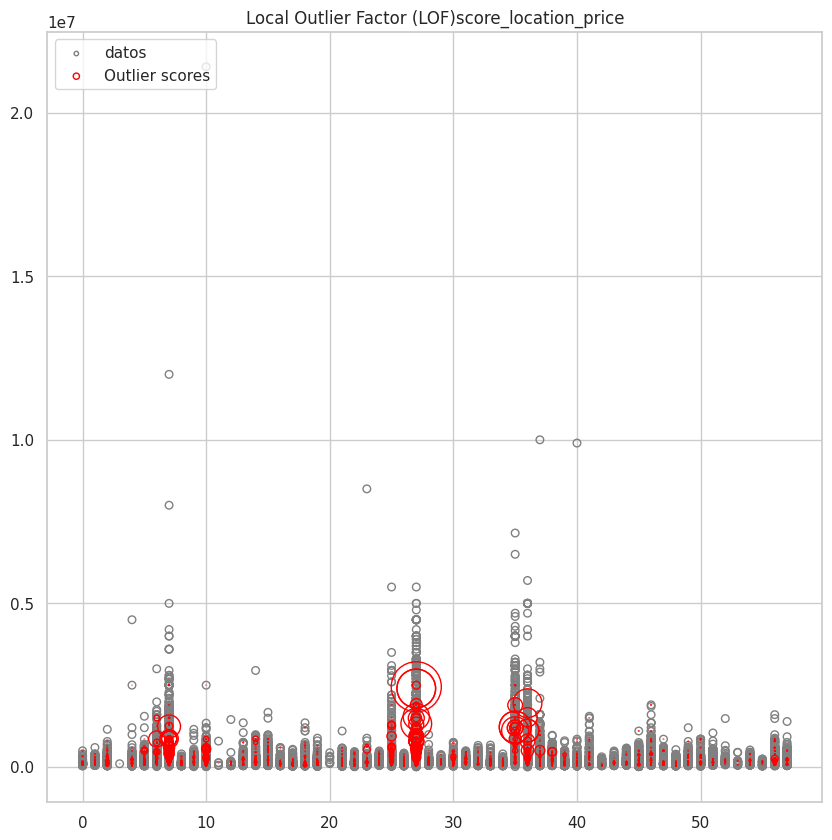

In [218]:
lof(ds_train, 'place_encoded', 'property_price', 'score_location_price')

<ipython-input-214-f3f243b19d6b>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-214-f3f243b19d6b>:48: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-214-f3f243b19d6b>:49: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



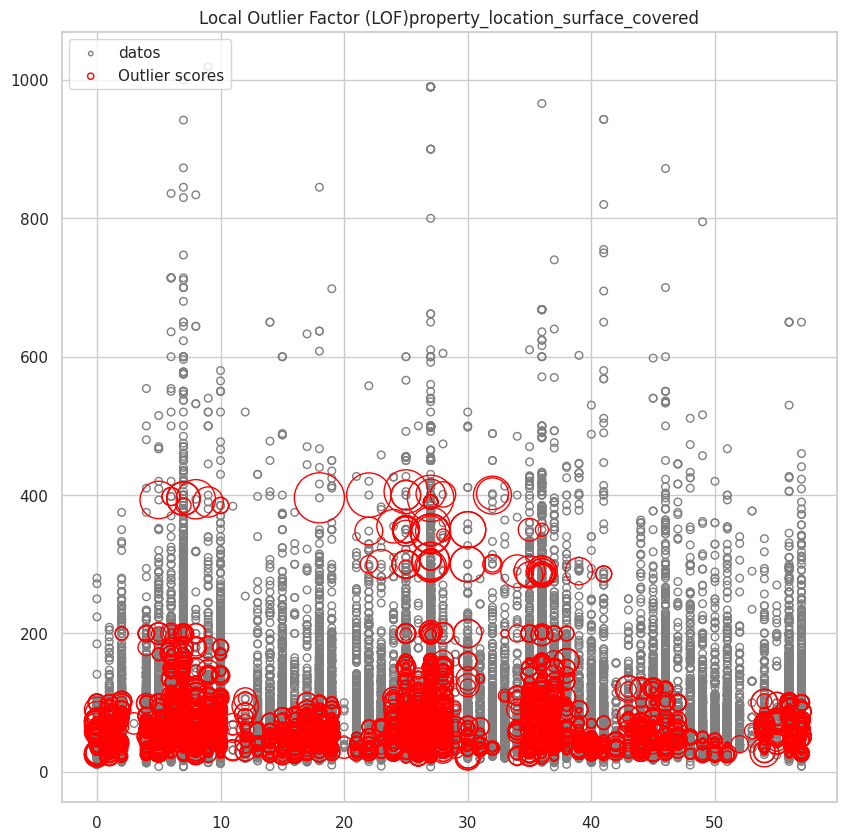

In [219]:
lof(ds_train, 'place_encoded', 'property_surface_covered', 'property_location_surface_covered')

### Relación precio de venta-metros de superficie



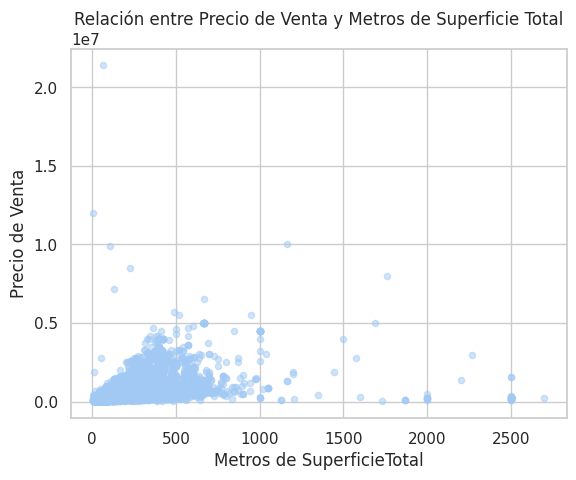

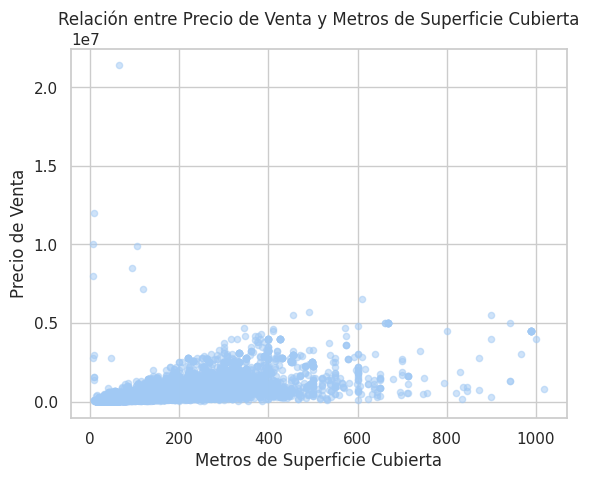

In [220]:
ds_train.plot.scatter(x='property_surface_total', y='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Total')
plt.xlabel('Metros de SuperficieTotal')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()


ds_train.plot.scatter(x='property_surface_covered', y='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Cubierta')
plt.xlabel('Metros de Superficie Cubierta')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

Podemos ver algunos datos atípicos donde a pesar de muchos precios de superficie, el precio es demasiado bajo, y su opuesto, precio muy alto para supercie muy limitada.

PENDIENTE